# - The project :: Car-Price-Prediction-Project
*****************************************************************
<img src="images/project.jpg" />


* Table of Contetnt ::
************************************************
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Exploratory Data Analysis (EDA)</a></li>
<li><a href="#visualize">Data_Visualization_Process</a></li>
<li><a href="#ETl">ETl_Process</a></li>
<li><a href="#Prepration">Data_Prepration</a></li>
<li><a href="#Model">Bulid_ML_Model</a></li>
<li><a href="#Evaluation">Evaluate_Model</a></li>
<li><a href="#Save">Save_Model</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<img src="images/car.jpg" />


* Domain-Knowledge ::
    * IToday we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors: diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis. In any case, I wish you to be healthy! Let's look at our data.

        
<img src="images/giphy.gif" />

    




* Importing requried liberaries and Frameworks  ::

In [1]:
# Importing Liberaries and Framworks ::
import numpy     as np      # Apply Linear_Algebra operations and deal with arrays.
import pandas    as pd      # For Loading diff formats of data and Apply Wrangling and Mainpulating on data
import seaborn   as sns     # For Visualizing data
import warnings  as w       # For Ignoring any Warning
import missingno as mno     # Presnt Precentage of Nan Values
import datasist  as ds      # For Apply EDA and Visualization Using Simple Implementation
import matplotlib.pyplot as plt # For Set Plots , Charts and Maps Labels and Title  
import pandas_profiling  as pp  # To get describtion file of data


* Set some instructions

In [2]:
# To Make Matplotlib apply on any Version
%matplotlib inline      
# To ignore any Warning notification.
w.filterwarnings("ignore") 
# To Set Figsize of Plots , Charts and Maps
sns.set( rc = {"figure.figsize" : [50 , 35]} , font_scale=3.5)

In [3]:
# Loading dataset ::
df = pd.read_csv("car_price.csv")
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

* from thae result above we can see that ::
*********************************************************
* We have 1338 record of data.
* we have 7 features related Income.
* Our-Target income that we will rename that columns into charges.

*******************************************************
# Features of Income data :
*******************************************************

* age      : Age of primary beneficiary.
    
* sex      : Insurance contractor gender, female, male
* bmi      : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9  

* children : Number of children covered by health insurance / Number of dependents.

* smoker   :  Refer the smoker case of the person smoke or not smoke.

* region   : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest..

* charges  : Individual medical costs billed by health insurance knowledgethat is our target which we need to predict it using ML Models.

*******************************
 


<p id="Wrangling">Exploratory data analysis</p>

* *EDA Task* ::
*******************************
 *  It one of the most important phase of data scientist life cycle which we apply some statistical oprations toidentify the Behaviour of data  to extract meaningful knowledge , insights and vesion from that data to help steckholders to make more efficient decision which improve and enhance our Buesines.

* Statistical analysis Process ::

In [4]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

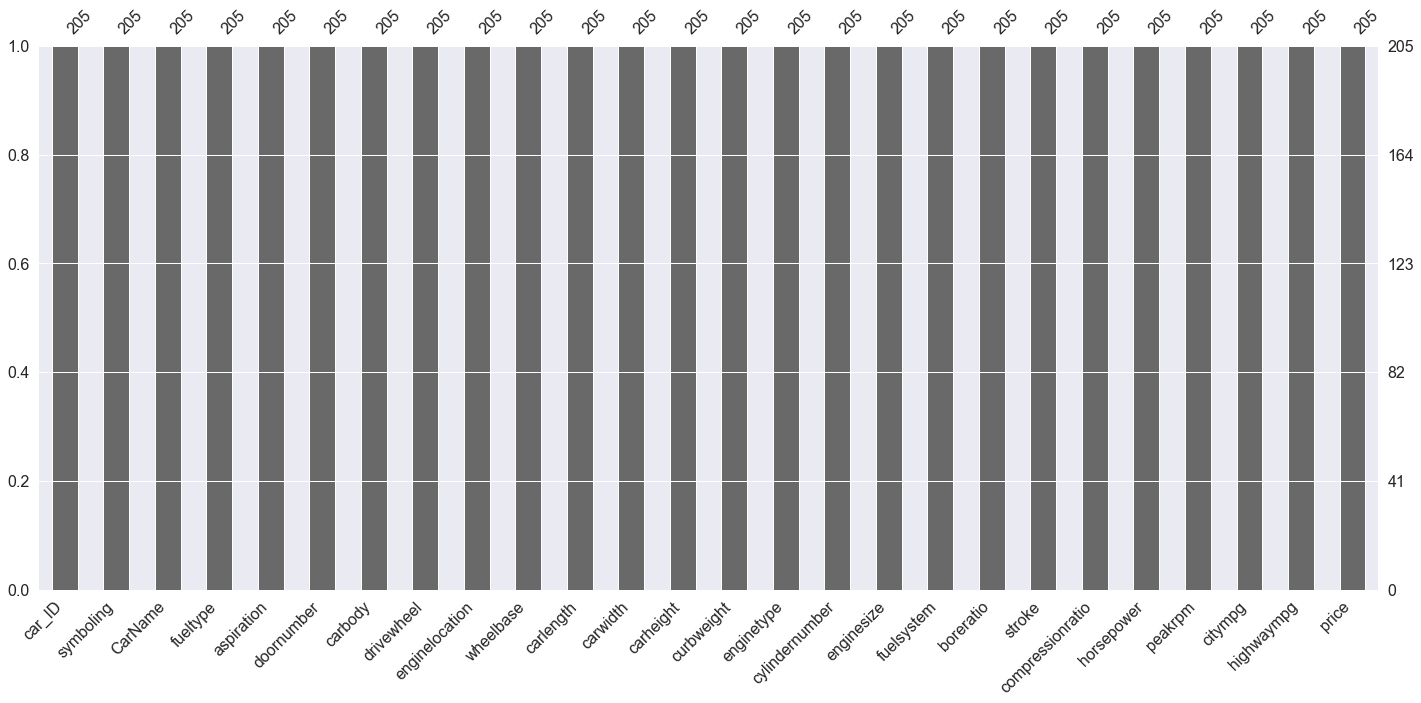

In [7]:
# Investigate Data not include null values ::
# Let's take a look at the presence of missing values, so as not to face unpleasant surprises in the future.


mno.bar(df)
df.isna().sum()

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# identify the unique data values and its values count ::
for col in df.columns :
    print(f"The Col :: ({col})\n\nThe Col _ ({col}) _Unique_values :: {df[col].unique()}\n\n\
The Col _ ({col})_Value_counts :: \n\n{df[col].value_counts()}\n\n-----------\n-----------\n")

The Col :: (car_ID)

The Col _ (car_ID) _Unique_values :: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]

The Col _ (car_ID)_Value_counts :: 

1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1

In [10]:
# Present the Statistical Analysis describtion of Numerical_data ::
df.describe(include=["number"])

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [11]:
# present the Statistical Analysis description of Categorical_data ::
df.describe(include="object")

CarName fueltype aspiration doornumber carbody drivewheel  \
count              205      205        205        205     205        205   
unique             147        2          2          2       5          3   
top     toyota corolla      gas        std       four   sedan        fwd   
freq                 6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

In [12]:
# Present nuniques :: To identifing the duplicaties data
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [13]:
# check data include duplicates record or not
df.duplicated().sum()


0

* From the result above we can see that data include repeat data record we Must remove all redendunt data.

In [14]:
# Droping All repeat or Redendant data.
df.drop_duplicates(inplace=True)

In [15]:
# check data include duplicates record or not
df.duplicated().sum()


0

In [16]:
# Checking dtypes of dataset.
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

* Wrangling and Mainplluting data.

In [17]:
# Get The Record Of the Person who max symboling ::
df[df["symboling"] == df["symboling"].max()]

car_ID  symboling                    CarName fueltype aspiration  \
0         1          3         alfa-romero giulia      gas        std   
1         2          3        alfa-romero stelvio      gas        std   
29       30          3  dodge coronet custom (sw)      gas      turbo   
55       56          3                  mazda 626      gas        std   
56       57          3                  mazda glc      gas        std   
57       58          3              mazda rx-7 gs      gas        std   
58       59          3                mazda glc 4      gas        std   
72       73          3              buick skylark      gas        std   
80       81          3       mitsubishi mirage g4      gas      turbo   
81       82          3              mitsubishi g4      gas        std   
82       83          3       mitsubishi outlander      gas      turbo   
83       84          3              mitsubishi g4      gas      turbo   
84       85          3       mitsubishi mirage g4      gas      turbo   
104     105          3               nissan teana      gas        std   
105     106          3               nissan kicks      gas      turbo   
124     125          3            plymouth duster      gas      turbo   
125     126          3              porsche macan      gas        std   
126     127          3          porcshce panamera      gas        std   
127     128          3            porsche cayenne      gas        std   
128     129          3             porsche boxter      gas        std   
132     133          3                   saab 99e      gas        std   
134     135          3                  saab 99le      gas        std   
136     137          3                 saab 99gle      gas      turbo   
178     179          3    toyota corolla liftback      gas        std   
179     180          3              toyota corona      gas        std   
189     190          3                  vw dasher      gas        std   
190     191          3                  vw rabbit      gas        std   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
29         two    hatchback        fwd          front       95.9  ...   
55         two    hatchback        rwd          front       95.3  ...   
56         two    hatchback        rwd          front       95.3  ...   
57         two    hatchback        rwd          front       95.3  ...   
58         two    hatchback        rwd          front       95.3  ...   
72         two  convertible        rwd          front       96.6  ...   
80         two    hatchback        fwd          front       96.3  ...   
81         two    hatchback        fwd          front       96.3  ...   
82         two    hatchback        fwd          front       95.9  ...   
83         two    hatchback        fwd          front       95.9  ...   
84         two    hatchback        fwd          front       95.9  ...   
104        two    hatchback        rwd          front       91.3  ...   
105        two    hatchback        rwd          front       91.3  ...   
124        two    hatchback        rwd          front       95.9  ...   
125        two    hatchback        rwd          front       94.5  ...   
126        two      hardtop        rwd           rear       89.5  ...   
127        two      hardtop        rwd           rear       89.5  ...   
128        two  convertible        rwd           rear       89.5  ...   
132        two    hatchback        fwd          front       99.1  ...   
134        two    hatchback        fwd          front       99.1  ...   
136        two    hatchback        fwd          front       99.1  ...   
178        two    hatchback        rwd          front      102.9  ...   
179        two    hatchback        rwd          front      102.9  ...   
189        two  convertible        fwd          front       94

In [18]:
# Get The Record of the Min symboling ::
df[df["symboling"] == df["symboling"].min()]

car_ID  symboling          CarName fueltype aspiration doornumber  \
194     195         -2  volvo 145e (sw)      gas        std       four   
196     197         -2      volvo 244dl      gas        std       four   
198     199         -2      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
194   sedan        rwd          front      104.3  ...         141        mpfi   
196   sedan        rwd          front      104.3  ...         141        mpfi   
198   sedan        rwd          front      104.3  ...         130        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
194       3.78    3.15              9.5        114     5400      23   
196       3.78    3.15              9.5        114     5400      24   
198       3.62    3.15              7.5        162     5100      17   

     highwaympg    price  
194          28  12940.0  
196          28  15985.0  
198          22  18420.0  

[3 rows x 26 columns]

In [19]:
# Get The Record Of the Person who max wheelbase ::
df[df["wheelbase"] == df["wheelbase"].max()]

car_ID  symboling                CarName fueltype aspiration doornumber  \
73      74          0  buick century special      gas        std       four   

   carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
73   sedan        rwd          front      120.9  ...         308        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
73        3.8    3.35              8.0        184     4500      14   

    highwaympg    price  
73          16  40960.0  

[1 rows x 26 columns]

In [20]:
# Get The Record of the Min wheelbase ::
df[df["wheelbase"] == df["wheelbase"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
30      31          2       honda civic      gas        std        two   
31      32          2  honda civic cvcc      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
30  hatchback        fwd          front       86.6  ...          92   
31  hatchback        fwd          front       86.6  ...          92   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
30        1bbl       2.91    3.41              9.6         58     4800   
31        1bbl       2.91    3.41              9.2         76     6000   

   citympg  highwaympg   price  
30      49          54  6479.0  
31      31          38  6855.0  

[2 rows x 26 columns]

In [21]:
# Get The Record Of the Clients who max carlength ::
df[df["carlength"] == df["carlength"].max()]

car_ID  symboling                CarName fueltype aspiration doornumber  \
73      74          0  buick century special      gas        std       four   

   carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
73   sedan        rwd          front      120.9  ...         308        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
73        3.8    3.35              8.0        184     4500      14   

    highwaympg    price  
73          16  40960.0  

[1 rows x 26 columns]

In [22]:
# Get The Record of the Min carlength ::
df[df["carlength"] == df["carlength"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
18      19          2  chevrolet impala      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
18  hatchback        fwd          front       88.4  ...          61   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
18        2bbl       2.91    3.03              9.5         48     5100   

   citympg  highwaympg   price  
18      47          53  5151.0  

[1 rows x 26 columns]

In [23]:
# Get The Record Of the Clients who max carwidth ::
df[df["carwidth"] == df["carwidth"].max()]

car_ID  symboling          CarName fueltype aspiration doornumber  \
129     130          1  porsche cayenne      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
129  hatchback        rwd          front       98.4  ...         203   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
129        mpfi       3.94    3.11             10.0        288     5750   

    citympg  highwaympg    price  
129      17          28  31400.5  

[1 rows x 26 columns]

In [24]:
# Get The Record of the Min carwidth ::
df[df["carwidth"] == df["carwidth"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
18      19          2  chevrolet impala      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
18  hatchback        fwd          front       88.4  ...          61   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
18        2bbl       2.91    3.03              9.5         48     5100   

   citympg  highwaympg   price  
18      47          53  5151.0  

[1 rows x 26 columns]

In [25]:
# Get The Record Of the Clients who max carheight ::
df[df["carheight"] == df["carheight"].max()]

car_ID  symboling            CarName fueltype aspiration doornumber  \
28       29         -1  dodge dart custom      gas        std       four   
123     124         -1   plymouth valiant      gas        std       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
28    wagon        fwd          front      103.3  ...         122        2bbl   
123   wagon        fwd          front      103.3  ...         122        2bbl   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
28        3.34    3.46              8.5         88     5000      24   
123       3.35    3.46              8.5         88     5000      24   

     highwaympg   price  
28           30  8921.0  
123          30  8921.0  

[2 rows x 26 columns]

In [26]:
# Get The Record of the Min carheight ::
df[df["carheight"] == df["carheight"].min()]

car_ID  symboling    CarName fueltype aspiration doornumber carbody  \
49      50          0  jaguar xk      gas        std        two   sedan   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
49        rwd          front      102.0  ...         326        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
49       3.54    2.76             11.5        262     5000      13   

    highwaympg    price  
49          17  36000.0  

[1 rows x 26 columns]

In [27]:
# Get The Record Of the Clients who max curbweight ::
df[df["curbweight"] == df["curbweight"].max()]

car_ID  symboling    CarName fueltype aspiration doornumber carbody  \
47      48          0  jaguar xj      gas        std       four   sedan   
48      49          0  jaguar xf      gas        std       four   sedan   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
47        rwd          front      113.0  ...         258        mpfi   
48        rwd          front      113.0  ...         258        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
47       3.63    4.17              8.1        176     4750      15   
48       3.63    4.17              8.1        176     4750      15   

    highwaympg    price  
47          19  32250.0  
48          19  35550.0  

[2 rows x 26 columns]

In [28]:
# Get The Record of the Min curbweight ::
df[df["curbweight"] == df["curbweight"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
18      19          2  chevrolet impala      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
18  hatchback        fwd          front       88.4  ...          61   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
18        2bbl       2.91    3.03              9.5         48     5100   

   citympg  highwaympg   price  
18      47          53  5151.0  

[1 rows x 26 columns]

In [29]:
# Get The Record Of the Clients who max enginesize ::
df[df["enginesize"] == df["enginesize"].max()]

car_ID  symboling    CarName fueltype aspiration doornumber carbody  \
49      50          0  jaguar xk      gas        std        two   sedan   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
49        rwd          front      102.0  ...         326        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
49       3.54    2.76             11.5        262     5000      13   

    highwaympg    price  
49          17  36000.0  

[1 rows x 26 columns]

In [30]:
# Get The Record of the Min enginesize ::
df[df["enginesize"] == df["enginesize"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
18      19          2  chevrolet impala      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
18  hatchback        fwd          front       88.4  ...          61   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
18        2bbl       2.91    3.03              9.5         48     5100   

   citympg  highwaympg   price  
18      47          53  5151.0  

[1 rows x 26 columns]

In [31]:
# Get The Record Of the Clients who max boreratio ::
df[df["boreratio"] == df["boreratio"].max()]

car_ID  symboling          CarName fueltype aspiration doornumber  \
125     126          3    porsche macan      gas        std        two   
129     130          1  porsche cayenne      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
125  hatchback        rwd          front       94.5  ...         151   
129  hatchback        rwd          front       98.4  ...         203   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
125        mpfi       3.94    3.11              9.5        143     5500   
129        mpfi       3.94    3.11             10.0        288     5750   

    citympg  highwaympg    price  
125      19          27  22018.0  
129      17          28  31400.5  

[2 rows x 26 columns]

In [32]:
# Get The Record of the Min boreratio ::
df[df["boreratio"] == df["boreratio"].min()]

car_ID  symboling    CarName fueltype aspiration doornumber    carbody  \
134     135          3  saab 99le      gas        std        two  hatchback   

    drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
134        fwd          front       99.1  ...         121        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
134       2.54    2.07              9.3        110     5250      21   

     highwaympg    price  
134          28  15040.0  

[1 rows x 26 columns]

In [33]:
# Get The Record Of the Clients who max stroke ::
df[df["stroke"] == df["stroke"].max()]

car_ID  symboling    CarName fueltype aspiration doornumber carbody  \
47      48          0  jaguar xj      gas        std       four   sedan   
48      49          0  jaguar xf      gas        std       four   sedan   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
47        rwd          front      113.0  ...         258        mpfi   
48        rwd          front      113.0  ...         258        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
47       3.63    4.17              8.1        176     4750      15   
48       3.63    4.17              8.1        176     4750      15   

    highwaympg    price  
47          19  32250.0  
48          19  35550.0  

[2 rows x 26 columns]

In [34]:
# Get The Record of the Min stroke ::
df[df["stroke"] == df["stroke"].min()]

car_ID  symboling    CarName fueltype aspiration doornumber    carbody  \
134     135          3  saab 99le      gas        std        two  hatchback   

    drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
134        fwd          front       99.1  ...         121        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
134       2.54    2.07              9.3        110     5250      21   

     highwaympg    price  
134          28  15040.0  

[1 rows x 26 columns]

In [35]:
# Get The Record Of the Clients who max compressionratio ::
df[df["compressionratio"] == df["compressionratio"].max()]

car_ID  symboling                   CarName fueltype aspiration  \
182     183          2          vokswagen rabbit   diesel        std   
184     185          2      volkswagen model 111   diesel        std   
187     188          2   volkswagen super beetle   diesel      turbo   
192     193          0  volkswagen rabbit custom   diesel      turbo   
203     204         -1                 volvo 246   diesel      turbo   

    doornumber carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
182        two   sedan        fwd          front       97.3  ...          97   
184       four   sedan        fwd          front       97.3  ...          97   
187       four   sedan        fwd          front       97.3  ...          97   
192       four   sedan        fwd          front      100.4  ...          97   
203       four   sedan        rwd          front      109.1  ...         145   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
182         idi       3.01     3.4             23.0         52     4800   
184         idi       3.01     3.4             23.0         52     4800   
187         idi       3.01     3.4             23.0         68     4500   
192         idi       3.01     3.4             23.0         68     4500   
203         idi       3.01     3.4             23.0        106     4800   

    citympg  highwaympg    price  
182      37          46   7775.0  
184      37          46   7995.0  
187      37          42   9495.0  
192      33          38  13845.0  
203      26          27  22470.0  

[5 rows x 26 columns]

In [36]:
# Get The Record of the Min compressionratio ::
df[df["compressionratio"] == df["compressionratio"].min()]

car_ID  symboling                    CarName fueltype aspiration  \
9        10          0        audi 5000s (diesel)      gas      turbo   
29       30          3  dodge coronet custom (sw)      gas      turbo   
82       83          3       mitsubishi outlander      gas      turbo   
83       84          3              mitsubishi g4      gas      turbo   
84       85          3       mitsubishi mirage g4      gas      turbo   
117     118          0              peugeot 604sl      gas      turbo   
124     125          3            plymouth duster      gas      turbo   

    doornumber    carbody drivewheel enginelocation  wheelbase  ...  \
9          two  hatchback        4wd          front       99.5  ...   
29         two  hatchback        fwd          front       95.9  ...   
82         two  hatchback        fwd          front       95.9  ...   
83         two  hatchback        fwd          front       95.9  ...   
84         two  hatchback        fwd          front       95.9  ...   
117       four      sedan        rwd          front      108.0  ...   
124        two  hatchback        rwd          front       95.9  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
9           131        mpfi       3.13    3.40              7.0        160   
29          156         mfi       3.60    3.90              7.0        145   
82          156        spdi       3.58    3.86              7.0        145   
83          156        spdi       3.59    3.86              7.0        145   
84          156        spdi       3.59    3.86              7.0        145   
117         134        mpfi       3.61    3.21              7.0        142   
124         156        spdi       3.59    3.86              7.0        145   

     peakrpm citympg  highwaympg      price  
9       5500      16          22  17859.167  
29      5000      19          24  12964.000  
82      5000      19          24  12629.000  
83      5000      19          24  14869.000  
84      5000      19          24  14489.000  
117     5600      18          24  18150.000  
124     5000      19          24  12764.000  

[7 rows x 26 columns]

In [37]:
# Get The Record Of the Clients who max horsepower ::
df[df["horsepower"] == df["horsepower"].max()]

car_ID  symboling          CarName fueltype aspiration doornumber  \
129     130          1  porsche cayenne      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
129  hatchback        rwd          front       98.4  ...         203   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
129        mpfi       3.94    3.11             10.0        288     5750   

    citympg  highwaympg    price  
129      17          28  31400.5  

[1 rows x 26 columns]

In [38]:
# Get The Record of the Min horsepower ::
df[df["horsepower"] == df["horsepower"].min()]

car_ID  symboling           CarName fueltype aspiration doornumber  \
18      19          2  chevrolet impala      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
18  hatchback        fwd          front       88.4  ...          61   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
18        2bbl       2.91    3.03              9.5         48     5100   

   citympg  highwaympg   price  
18      47          53  5151.0  

[1 rows x 26 columns]

In [39]:
# Get The Record Of the Clients who max peakrpm ::
df[df["peakrpm"] == df["peakrpm"].max()]

car_ID  symboling                    CarName fueltype aspiration  \
165     166          1  toyota celica gt liftback      gas        std   
166     167          1      toyota corolla tercel      gas        std   

    doornumber    carbody drivewheel enginelocation  wheelbase  ...  \
165        two      sedan        rwd          front       94.5  ...   
166        two  hatchback        rwd          front       94.5  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
165          98        mpfi       3.24    3.08              9.4        112   
166          98        mpfi       3.24    3.08              9.4        112   

     peakrpm citympg  highwaympg   price  
165     6600      26          29  9298.0  
166     6600      26          29  9538.0  

[2 rows x 26 columns]

In [40]:
# Get The Record of the Min peakrpm ::
df[df["peakrpm"] == df["peakrpm"].min()]

car_ID  symboling                    CarName fueltype aspiration  \
108     109          0                peugeot 304   diesel      turbo   
110     111          0                peugeot 504   diesel      turbo   
112     113          0              peugeot 604sl   diesel      turbo   
114     115          0  peugeot 505s turbo diesel   diesel      turbo   
116     117          0                peugeot 504   diesel      turbo   

    doornumber carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
108       four   sedan        rwd          front      107.9  ...         152   
110       four   wagon        rwd          front      114.2  ...         152   
112       four   sedan        rwd          front      107.9  ...         152   
114       four   wagon        rwd          front      114.2  ...         152   
116       four   sedan        rwd          front      107.9  ...         152   

     fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
108         idi        3.7    3.52             21.0         95     4150   
110         idi        3.7    3.52             21.0         95     4150   
112         idi        3.7    3.52             21.0         95     4150   
114         idi        3.7    3.52             21.0         95     4150   
116         idi        3.7    3.52             21.0         95     4150   

    citympg  highwaympg    price  
108      28          33  13200.0  
110      25          25  13860.0  
112      28          33  16900.0  
114      25          25  17075.0  
116      28          33  17950.0  

[5 rows x 26 columns]

In [41]:
# Get The Record Of the Clients who max citympg ::
df[df["citympg"] == df["citympg"].max()]

car_ID  symboling      CarName fueltype aspiration doornumber    carbody  \
30      31          2  honda civic      gas        std        two  hatchback   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
30        fwd          front       86.6  ...          92        1bbl   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
30       2.91    3.41              9.6         58     4800      49   

    highwaympg   price  
30          54  6479.0  

[1 rows x 26 columns]

In [42]:
# Get The Record of the Min citympg ::
df[df["citympg"] == df["citympg"].min()]

car_ID  symboling    CarName fueltype aspiration doornumber carbody  \
49      50          0  jaguar xk      gas        std        two   sedan   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
49        rwd          front      102.0  ...         326        mpfi   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
49       3.54    2.76             11.5        262     5000      13   

    highwaympg    price  
49          17  36000.0  

[1 rows x 26 columns]

In [43]:
# Get The Record Of the Clients who max highwaympg ::
df[df["highwaympg"] == df["highwaympg"].max()]

car_ID  symboling      CarName fueltype aspiration doornumber    carbody  \
30      31          2  honda civic      gas        std        two  hatchback   

   drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
30        fwd          front       86.6  ...          92        1bbl   

    boreratio  stroke compressionratio horsepower  peakrpm citympg  \
30       2.91    3.41              9.6         58     4800      49   

    highwaympg   price  
30          54  6479.0  

[1 rows x 26 columns]

In [44]:
# Get The Record of the Min highwaympg ::
df[df["highwaympg"] == df["highwaympg"].min()]

car_ID  symboling                          CarName fueltype aspiration  \
73      74          0            buick century special      gas        std   
74      75          1  buick regal sport coupe (turbo)      gas        std   

   doornumber  carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
73       four    sedan        rwd          front      120.9  ...         308   
74        two  hardtop        rwd          front      112.0  ...         304   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
73        mpfi        3.8    3.35              8.0        184     4500   
74        mpfi        3.8    3.35              8.0        184     4500   

   citympg  highwaympg    price  
73      14          16  40960.0  
74      14          16  45400.0  

[2 rows x 26 columns]

In [45]:
# Get The Record Of the Clients who max price ::
df[df["price"] == df["price"].max()]

car_ID  symboling                          CarName fueltype aspiration  \
74      75          1  buick regal sport coupe (turbo)      gas        std   

   doornumber  carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
74        two  hardtop        rwd          front      112.0  ...         304   

    fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm  \
74        mpfi        3.8    3.35              8.0        184     4500   

   citympg  highwaympg    price  
74      14          16  45400.0  

[1 rows x 26 columns]

In [46]:
# Get The Record of the Min price ::
df[df["price"] == df["price"].min()]

car_ID  symboling CarName fueltype aspiration doornumber    carbody  \
138     139          2  subaru      gas        std        two  hatchback   

    drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
138        fwd          front       93.7  ...          97        2bbl   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
138       3.62    2.36              9.0         69     4900      31   

     highwaympg   price  
138          36  5118.0  

[1 rows x 26 columns]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [48]:
# grouped data ased on fueltype feature and get col describtion ::
df.groupby("fueltype").describe().transpose()

fueltype            diesel           gas
car_ID count     20.000000    185.000000
       mean     125.600000    100.556757
       std       50.261841     59.827272
       min       64.000000      1.000000
       25%       70.750000     47.000000
...                    ...           ...
price  min     7099.000000   5118.000000
       25%     9120.000000   7689.000000
       50%    13852.500000   9989.000000
       75%    19375.500000  15998.000000
       max    31600.000000  45400.000000

[128 rows x 2 columns]

In [49]:
# grouped data ased on aspiration feature and get col describtion ::
df.groupby("aspiration").describe().transpose()

aspiration             std         turbo
car_ID count    168.000000     37.000000
       mean     101.119048    111.540541
       std       59.818269     57.021728
       min        1.000000      9.000000
       25%       47.750000     76.000000
...                    ...           ...
price  min     5118.000000   7689.000000
       25%     7446.000000  11694.000000
       50%     9418.000000  16503.000000
       75%    15527.500000  18950.000000
       max    45400.000000  31600.000000

[128 rows x 2 columns]

In [50]:
# grouped data ased on doornumber feature and get col describtion ::
df.groupby("doornumber").describe().transpose()

doornumber            four           two
car_ID count    115.000000     90.000000
       mean     112.965217     90.266667
       std       60.410283     55.674172
       min        4.000000      1.000000
       25%       64.500000     43.500000
...                    ...           ...
price  min     6229.000000   5118.000000
       25%     8006.000000   7171.500000
       50%    10898.000000   9927.000000
       75%    16872.500000  15909.750000
       max    40960.000000  45400.000000

[128 rows x 2 columns]

In [51]:
# grouped data ased on carbody feature and get col describtion ::
df.groupby("carbody").describe().transpose()

carbody        convertible       hardtop     hatchback         sedan  \
car_ID count      6.000000      8.000000     70.000000     96.000000   
       mean      94.666667    125.875000     93.842857    102.072917   
       std       82.744587     41.591337     53.133312     63.783226   
       min        1.000000     70.000000      3.000000      4.000000   
       25%       19.750000     93.000000     51.250000     45.750000   
...                    ...           ...           ...           ...   
price  min    11595.000000   8249.000000   5118.000000   5499.000000   
       25%    14246.250000   9341.500000   6564.000000   8042.250000   
       50%    17084.500000  19687.500000   8897.000000  10846.500000   
       75%    30709.250000  32903.000000  12730.250000  17770.000000   
       max    37028.000000  45400.000000  31400.500000  41315.000000   

carbody              wagon  
car_ID count     25.000000  
       mean     126.880000  
       std       52.229717  
       min        8.000000  
       25%      103.000000  
...                    ...  
price  min     6918.000000  
       25%     8013.000000  
       50%    11694.000000  
       75%    15750.000000  
       max    28248.000000  

[128 rows x 5 columns]

In [52]:
# grouped data ased on drivewheel feature and get col describtion ::
df.groupby("drivewheel").describe().transpose()

drivewheel             4wd           fwd           rwd
car_ID count      9.000000    120.000000     76.000000
       mean     117.444444     97.950000    109.263158
       std       62.520219     56.351814     63.333271
       min        5.000000      4.000000      1.000000
       25%      141.000000     44.500000     58.750000
...                    ...           ...           ...
price  min     7603.000000   5118.000000   6785.000000
       25%     8013.000000   6976.250000  13475.000000
       50%     9233.000000   8222.000000  16912.500000
       75%    11694.000000  10307.500000  23110.000000
       max    17859.167000  23875.000000  45400.000000

[128 rows x 3 columns]

In [53]:
# grouped data ased on enginelocation feature and get col describtion ::
df.groupby("enginelocation").describe().transpose()

enginelocation         front     rear
car_ID count      202.000000      3.0
       mean       102.628713    128.0
       std         59.684292      1.0
       min          1.000000    127.0
       25%         51.250000    127.5
...                      ...      ...
price  min       5118.000000  32528.0
       25%       7778.250000  33278.0
       50%      10221.500000  34028.0
       75%      16482.500000  35528.0
       max      45400.000000  37028.0

[128 rows x 2 columns]

In [54]:
# grouped data ased on enginetype feature and get col describtion ::
df.groupby("enginetype").describe().transpose()

enginetype            dohc    dohcv             l           ohc          ohcf  \
car_ID count     12.000000      1.0     12.000000    148.000000     15.000000   
       mean     119.166667    130.0    105.166667     99.783784    141.200000   
       std       72.541942      NaN     27.319102     63.302700      7.551726   
       min        1.000000    130.0     19.000000      4.000000    127.000000   
       25%       48.750000    130.0    109.750000     41.750000    139.500000   
...                    ...      ...           ...           ...           ...   
price  min     9298.000000  31400.5   5151.000000   5195.000000   5118.000000   
       25%    15141.250000  31400.5  13010.000000   7383.500000   7533.000000   
       50%    16249.000000  31400.5  16105.000000   9022.000000   9233.000000   
       75%    18267.500000  31400.5  16943.750000  13522.500000  11476.500000   
       max    35550.000000  31400.5  18150.000000  41315.000000  37028.000000   

enginetype            ohcv         rotor  
car_ID count     13.000000      4.000000  
       mean      90.538462     57.500000  
       std       45.006695      1.290994  
       min        3.000000     56.000000  
       25%       73.000000     56.750000  
...                    ...           ...  
price  min    13499.000000  10945.000000  
       25%    16500.000000  11620.000000  
       50%    19699.000000  12745.000000  
       75%    35056.000000  14145.000000  
       max    45400.000000  15645.000000  

[128 rows x 7 columns]

In [55]:
# grouped data ased on cylindernumber feature and get col describtion ::
df.groupby("cylindernumber").describe().transpose()

cylindernumber         eight          five          four           six  \
car_ID count        5.000000     11.000000    159.000000     24.000000   
       mean        84.800000     46.818182    110.339623     97.208333   
       std         25.292291     56.950537     56.913751     68.280100   
       min         72.000000      5.000000      1.000000      3.000000   
       25%         73.000000      7.500000     61.500000     17.750000   
...                      ...           ...           ...           ...   
price  min      31400.500000  13295.000000   5118.000000  13499.000000   
       25%      34184.000000  17580.000000   7372.000000  16374.500000   
       50%      35056.000000  18920.000000   8948.000000  21037.500000   
       75%      40960.000000  26864.000000  12365.000000  32319.500000   
       max      45400.000000  31600.000000  22625.000000  41315.000000   

cylindernumber   three   twelve           two  
car_ID count       1.0      1.0      4.000000  
       mean       19.0     50.0     57.500000  
       std         NaN      NaN      1.290994  
       min        19.0     50.0     56.000000  
       25%        19.0     50.0     56.750000  
...                ...      ...           ...  
price  min      5151.0  36000.0  10945.000000  
       25%      5151.0  36000.0  11620.000000  
       50%      5151.0  36000.0  12745.000000  
       75%      5151.0  36000.0  14145.000000  
       max      5151.0  36000.0  15645.000000  

[128 rows x 7 columns]

In [56]:
# grouped data ased on fuelsystem feature and get col describtion ::
df.groupby("fuelsystem").describe().transpose()

fuelsystem            1bbl          2bbl     4bbl           idi      mfi  \
car_ID count     11.000000     66.000000      3.0     20.000000      1.0   
       mean      36.000000     95.696970     57.0    125.600000     30.0   
       std        3.316625     47.320826      1.0     50.261841      NaN   
       min       31.000000     19.000000     56.0     64.000000     30.0   
       25%       33.500000     54.250000     56.5     70.750000     30.0   
...                    ...           ...      ...           ...      ...   
price  min     5399.000000   5118.000000  10945.0   7099.000000  12964.0   
       25%     6692.000000   6593.500000  11395.0   9120.000000  12964.0   
       50%     7295.000000   7372.000000  11845.0  13852.500000  12964.0   
       75%     8370.000000   8330.750000  12745.0  19375.500000  12964.0   
       max    10295.000000  11245.000000  13645.0  31600.000000  12964.0   

fuelsystem            mpfi          spdi     spfi  
car_ID count     94.000000      9.000000      1.0  
       mean     114.978723     92.777778     47.0  
       std       67.961086     17.144808      NaN  
       min        1.000000     80.000000     47.0  
       25%       52.250000     83.000000     47.0  
...                    ...           ...      ...  
price  min     7957.000000   7689.000000  11048.0  
       25%    11619.750000   9279.000000  11048.0  
       50%    15991.500000   9959.000000  11048.0  
       75%    18942.500000  12764.000000  11048.0  
       max    45400.000000  14869.000000  11048.0  

[128 rows x 8 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [58]:
Pivot_T1 = pd.pivot_table(df , index = "symboling" , columns = "enginelocation" , values = "price")
Pivot_T1

enginelocation         front     rear
symboling                            
-2              15781.666667      NaN
-1              17330.681818      NaN
 0              14366.965179      NaN
 1              10037.907407      NaN
 2              10109.281250      NaN
 3              15057.958333  34528.0

In [59]:
Pivot_T1 = pd.pivot_table(df , index = "fueltype" , columns = "enginelocation" , values = "price")
Pivot_T1

enginelocation         front     rear
fueltype                             
diesel          15838.150000      NaN
gas             12644.937731  34528.0

In [60]:
Pivot_T1 = pd.pivot_table(df , index = "aspiration" , columns = "enginelocation" , values = "price")
Pivot_T1

enginelocation         front     rear
aspiration                           
std             12212.784848  34528.0
turbo           16298.166676      NaN

In [61]:
Pivot_T1 = pd.pivot_table(df , index = "doornumber" , columns = "enginelocation" , values = "price")
Pivot_T1

enginelocation         front     rear
doornumber                           
four            13501.152174      NaN
two             12247.231805  34528.0

In [62]:
Pivot_T1 = pd.pivot_table(df , index = "fuelsystem" , columns = "enginelocation" , values = "price")
Pivot_T1

enginelocation         front     rear
fuelsystem                           
1bbl             7555.545455      NaN
2bbl             7478.151515      NaN
4bbl            12145.000000      NaN
idi             15838.150000      NaN
mfi             12964.000000      NaN
mpfi            17201.633703  34528.0
spdi            10990.444444      NaN
spfi            11048.000000      NaN

In [63]:
Pivot_T1 = pd.pivot_table(df , index = "enginetype" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl           idi      mfi  \
enginetype                                                             
dohc                NaN          NaN      NaN           NaN      NaN   
dohcv               NaN          NaN      NaN           NaN      NaN   
l                   NaN  5151.000000      NaN  15797.000000      NaN   
ohc         7555.545455  7526.719298      NaN  15851.866667  12964.0   
ohcf                NaN  7423.000000      NaN           NaN      NaN   
ohcv                NaN          NaN      NaN           NaN      NaN   
rotor               NaN          NaN  12145.0           NaN      NaN   

fuelsystem          mpfi          spdi     spfi  
enginetype                                       
dohc        18116.416667           NaN      NaN  
dohcv       31400.500000           NaN      NaN  
l           15232.500000           NaN      NaN  
ohc         15557.799389  10990.444444  11048.0  
ohcf        20956.428571           NaN      NaN  
ohcv        25098.384615           NaN      NaN  
rotor       15645.000000           NaN      NaN

In [64]:
Pivot_T1 = pd.pivot_table(df , index = "doornumber" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl           idi      mfi  \
doornumber                                                             
four        8432.500000  7837.039474      NaN  16100.764706      NaN   
two         7054.428571  6991.089286  12145.0  14350.000000  12964.0   

fuelsystem          mpfi          spdi     spfi  
doornumber                                       
four        17200.444444   9279.000000      NaN  
two         18502.716675  11479.428571  11048.0

In [65]:
Pivot_T1 = pd.pivot_table(df , index = "aspiration" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl           idi      mfi  \
aspiration                                                             
std         7555.545455  7478.151515  12145.0   9670.571429      NaN   
turbo               NaN          NaN      NaN  19159.153846  12964.0   

fuelsystem          mpfi       spdi     spfi  
aspiration                                    
std         17943.905063   9279.000  11048.0  
turbo       16757.611133  11204.375      NaN

In [66]:
Pivot_T1 = pd.pivot_table(df , index = "fueltype" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl       idi      mfi         mpfi  \
fueltype                                                                        
diesel              NaN          NaN      NaN  15838.15      NaN          NaN   
gas         7555.545455  7478.151515  12145.0       NaN  12964.0  17754.60284   

fuelsystem          spdi     spfi  
fueltype                           
diesel               NaN      NaN  
gas         10990.444444  11048.0

In [67]:
Pivot_T1 = pd.pivot_table(df , index = "symboling" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl           idi      mfi  \
symboling                                                              
-2                  NaN          NaN      NaN           NaN      NaN   
-1                  NaN  8921.000000      NaN  23713.600000      NaN   
 0          8453.333333  8259.690476      NaN  15075.545455      NaN   
 1          6352.333333  7127.720588      NaN   7099.000000      NaN   
 2          6667.000000  6427.625000      NaN   8421.666667      NaN   
 3                  NaN  8499.000000  12145.0           NaN  12964.0   

fuelsystem          mpfi          spdi     spfi  
symboling                                        
-2          15781.666667           NaN      NaN  
-1          16827.571429   9279.000000      NaN  
 0          19744.212655           NaN      NaN  
 1          19124.884615   8308.333333      NaN  
 2          12357.166667           NaN  11048.0  
 3          20139.235294  12942.000000      NaN

In [68]:
Pivot_T1 = pd.pivot_table(df , index = "enginetype" , columns = "fuelsystem" , values = "price")
Pivot_T1

fuelsystem         1bbl         2bbl     4bbl           idi      mfi  \
enginetype                                                             
dohc                NaN          NaN      NaN           NaN      NaN   
dohcv               NaN          NaN      NaN           NaN      NaN   
l                   NaN  5151.000000      NaN  15797.000000      NaN   
ohc         7555.545455  7526.719298      NaN  15851.866667  12964.0   
ohcf                NaN  7423.000000      NaN           NaN      NaN   
ohcv                NaN          NaN      NaN           NaN      NaN   
rotor               NaN          NaN  12145.0           NaN      NaN   

fuelsystem          mpfi          spdi     spfi  
enginetype                                       
dohc        18116.416667           NaN      NaN  
dohcv       31400.500000           NaN      NaN  
l           15232.500000           NaN      NaN  
ohc         15557.799389  10990.444444  11048.0  
ohcf        20956.428571           NaN      NaN  
ohcv        25098.384615           NaN      NaN  
rotor       15645.000000           NaN      NaN

In [69]:
Con_Matrix = df.corr()
Con_Matrix

car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -0.287242 -0.220012   
citympg           0.015940  -0.035823  -0.470414  -0.670909 -0.642704   
highwaympg        0.011255   0.034606  -0.544082  -0.704662 -0.677218   
price            -0.109093  -0.079978   0.577816   0.682920  0.759325   

                  carheight  curbweight  enginesize  boreratio    stroke  \
car_ID             0.255960    0.071962   -0.033930   0.260064 -0.160824   
symboling         -0.541038   -0.227691   -0.105790  -0.130051 -0.008735   
wheelbase          0.589435    0.776386    0.569329   0.488750  0.160959   
carlength          0.491029    0.877728    0.683360   0.606454  0.129533   
carwidth           0.279210    0.867032    0.735433   0.559150  0.182942   
carheight          1.000000    0.295572    0.067149   0.171071 -0.055307   
curbweight         0.295572    1.000000    0.850594   0.648480  0.168790   
enginesize         0.067149    0.850594    1.000000   0.583774  0.203129   
boreratio          0.171071    0.648480    0.583774   1.000000 -0.055909   
stroke            -0.055307    0.168790    0.203129  -0.055909  1.000000   
compressionratio   0.261214    0.151362    0.028971   0.005197  0.186110   
horsepower        -0.108802    0.750739    0.809769   0.573677  0.080940   
peakrpm           -0.320411   -0.266243   -0.244660  -0.254976 -0.067964   
citympg           -0.048640   -0.757414   -0.653658  -0.584532 -0.042145   
highwaympg        -0.107358   -0.797465   -0.677470  -0.587012 -0.043931   
price              0.119336    0.835305    0.874145   0.553173  0.079443   

                  compressionratio  horsepower   peakrpm   citympg  \
car_ID                    0.150276   -0.015006 -0.203789  0.015940   
symboling                -0.178515    0.070873  0.273606 -0.035823   
wheelbase                 0.249786    0.353294 -0.360469 -0.470414   
carlength                 0.158414    0.552623 -0.287242 -0.670909   
carwidth                  0.181129    0.640732 -0.220012 -0.642704   
carheight                 0.261214   -0.108802 -0.320411 -0.048640   
curbweight                0.151362    0.750739 -0.266243 -0.757414   
enginesize                0.028971    0.809769 -0.244660 -0.653658   
boreratio                 0.005197    0.573677 -0.254976 -0.584532   
stroke                    0.186110    0.080940 -0.067964 -0.042145   
compressionratio          1.000000   -0.204326 -0.435741  0.324701   
horsepower               -0.204326    1.000000  0.131073 -0.801456   
peakrpm                  -0.435741    0.131073  1.000000 -0.113544   
citympg                   0.324701   -0.801456 -0.113544  1.000000   
highwaympg                0.265201   -0.770544 -0.054275  0.971337   
price                     0.067984    0.808139 -0.085267 -0.685751   

                  highwaympg     price  
car_ID              0.011255 -0.109093  
symboling           0.034606 -0.079978  
wheelbase          -0.544082  0.577816  
carlength          -0.704662  0.682920  
carwidth           -0.677218  0.759325  
carheight          -0.107358  0.119336  
curbwei

<p id="visualize"> Visualization-Process</p>

* Apply Data-Visualization Process ::
*******************************************
* visualization data one of the most important process on data scientist life cycle which we use some viualize element such (charts , plots ,maps) to identify the pattern , Trends and outliers on data.

Text(0.5, 1.0, 'Confusion_Matrix of data')

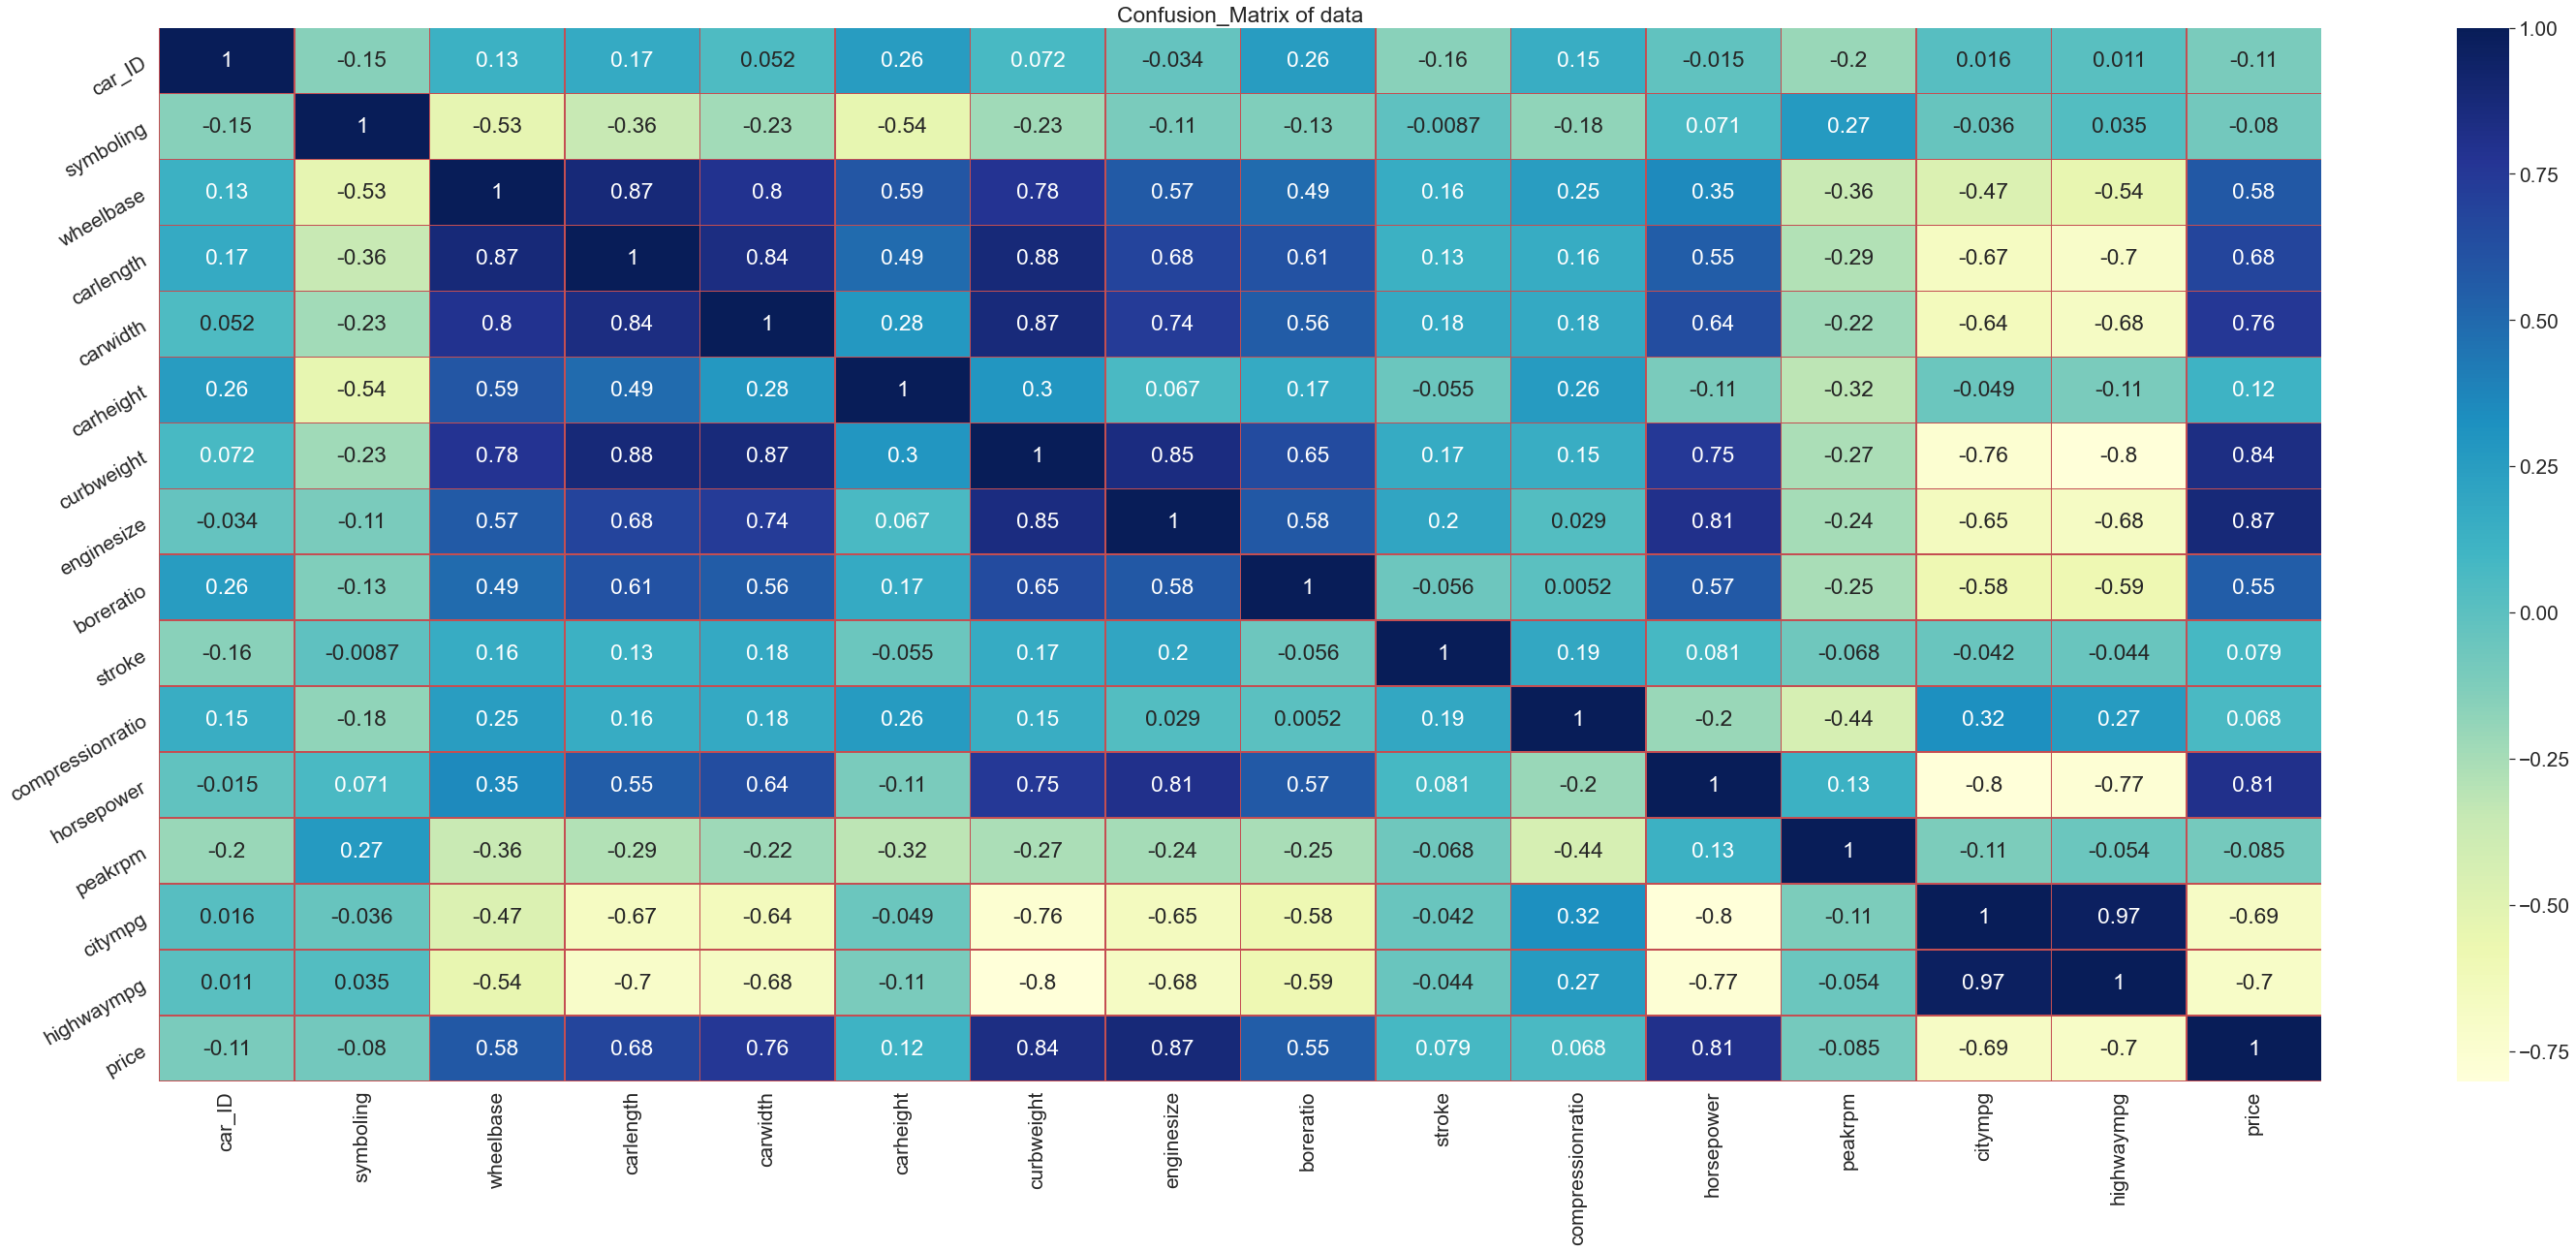

In [70]:
# Visualize The Feathure Correlations ::
sns.set( rc = {"figure.figsize" : [50 , 20]} , font_scale=1.9)
sns.heatmap(Con_Matrix , annot=True , cmap="YlGnBu" , linecolor="r" , linewidths=0.5)
plt.xticks(rotation = 90)
plt.yticks(rotation = 30)
plt.title("Confusion_Matrix of data")
# RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [72]:
# To Present species of symboling ::
symbolings = df["symboling"].value_counts()
symbolings

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

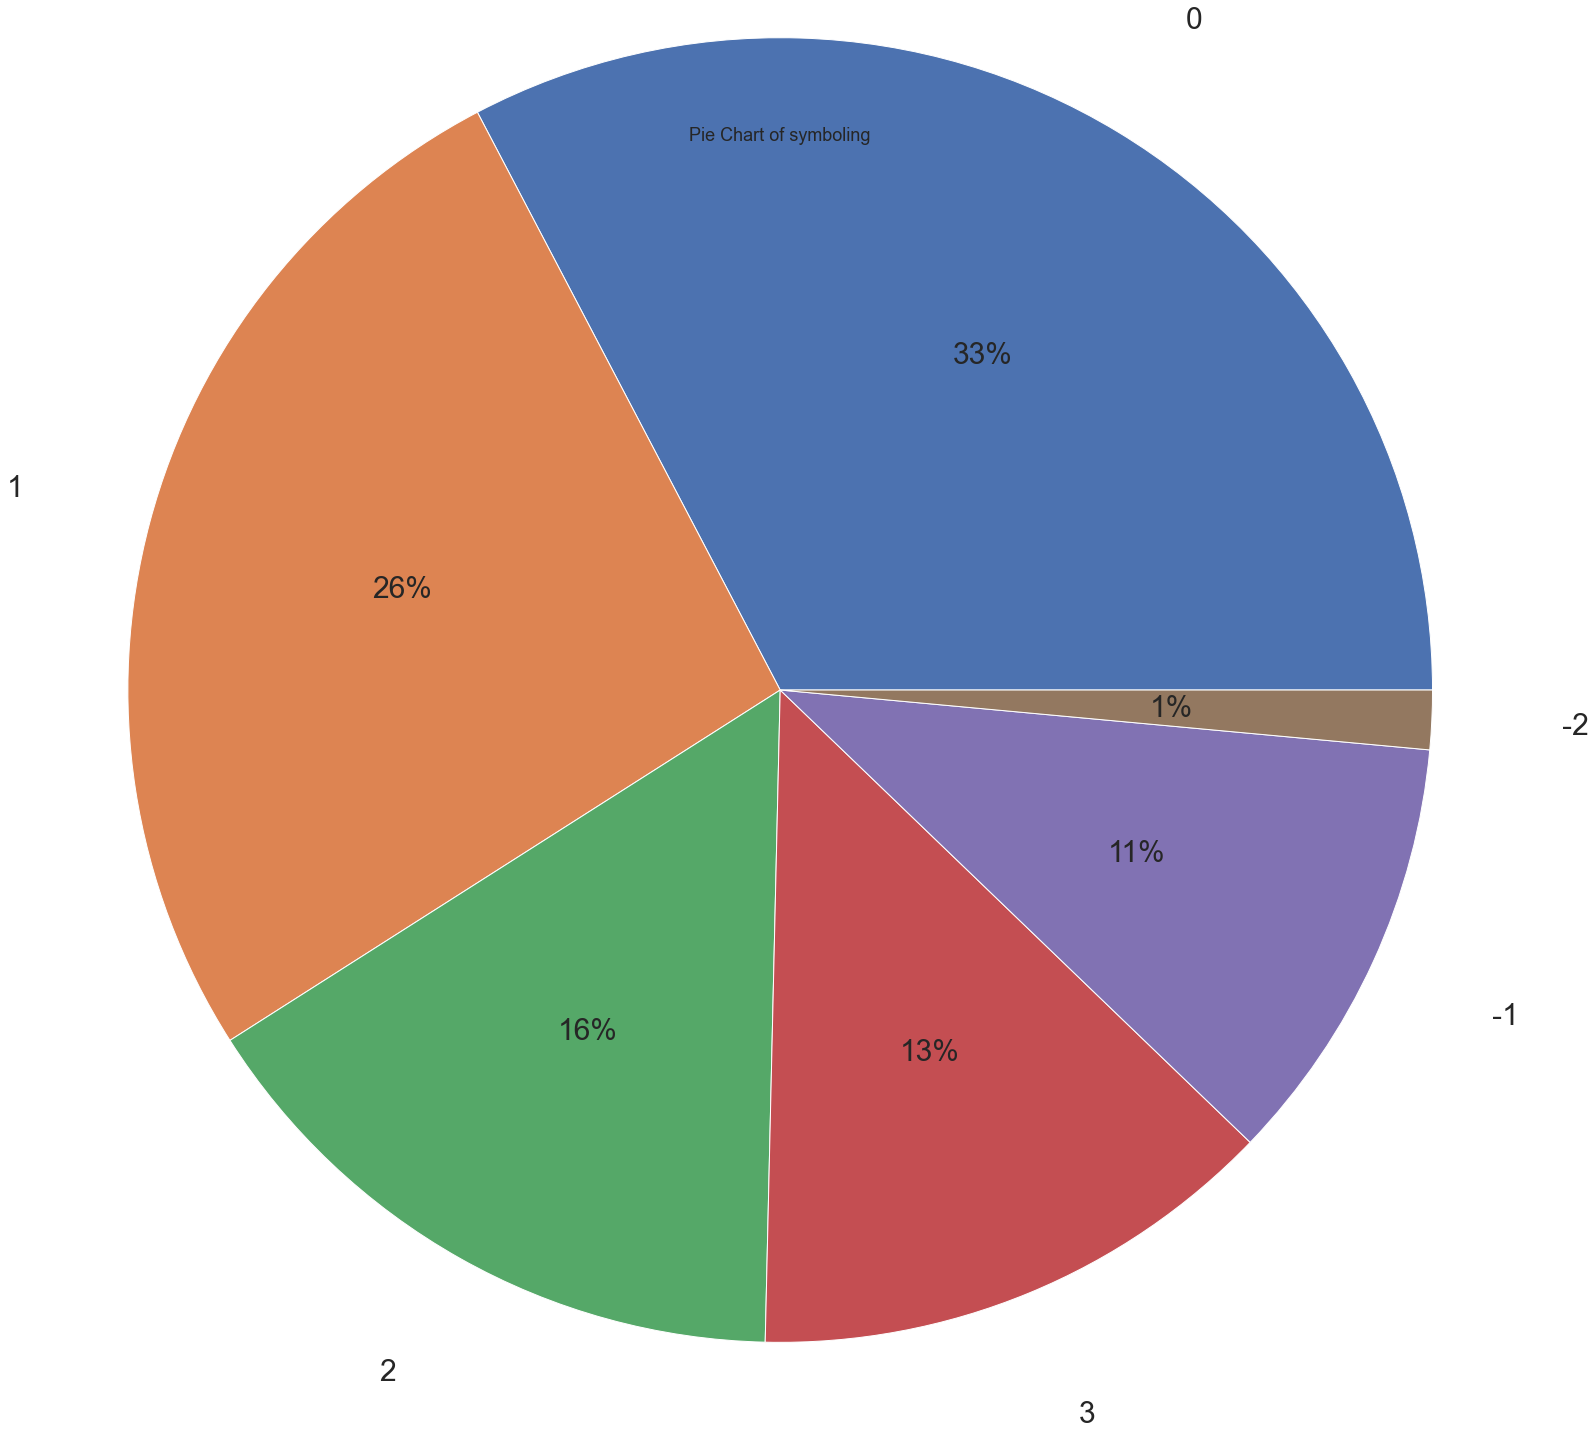

In [73]:
# Visualize Comparing symboling ::
sns.set( rc = {"figure.figsize" : [20 ,20]} , font_scale=1.5)
symbolings.plot.pie(autopct = "%1.0f%%" , radius = 1.5 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of symboling")
plt.show()

In [74]:
# To Present species of fueltype ::
fueltypes = df["fueltype"].value_counts()
fueltypes

gas       185
diesel     20
Name: fueltype, dtype: int64

Text(0.5, 1.0, 'Pie Chart of fueltype')

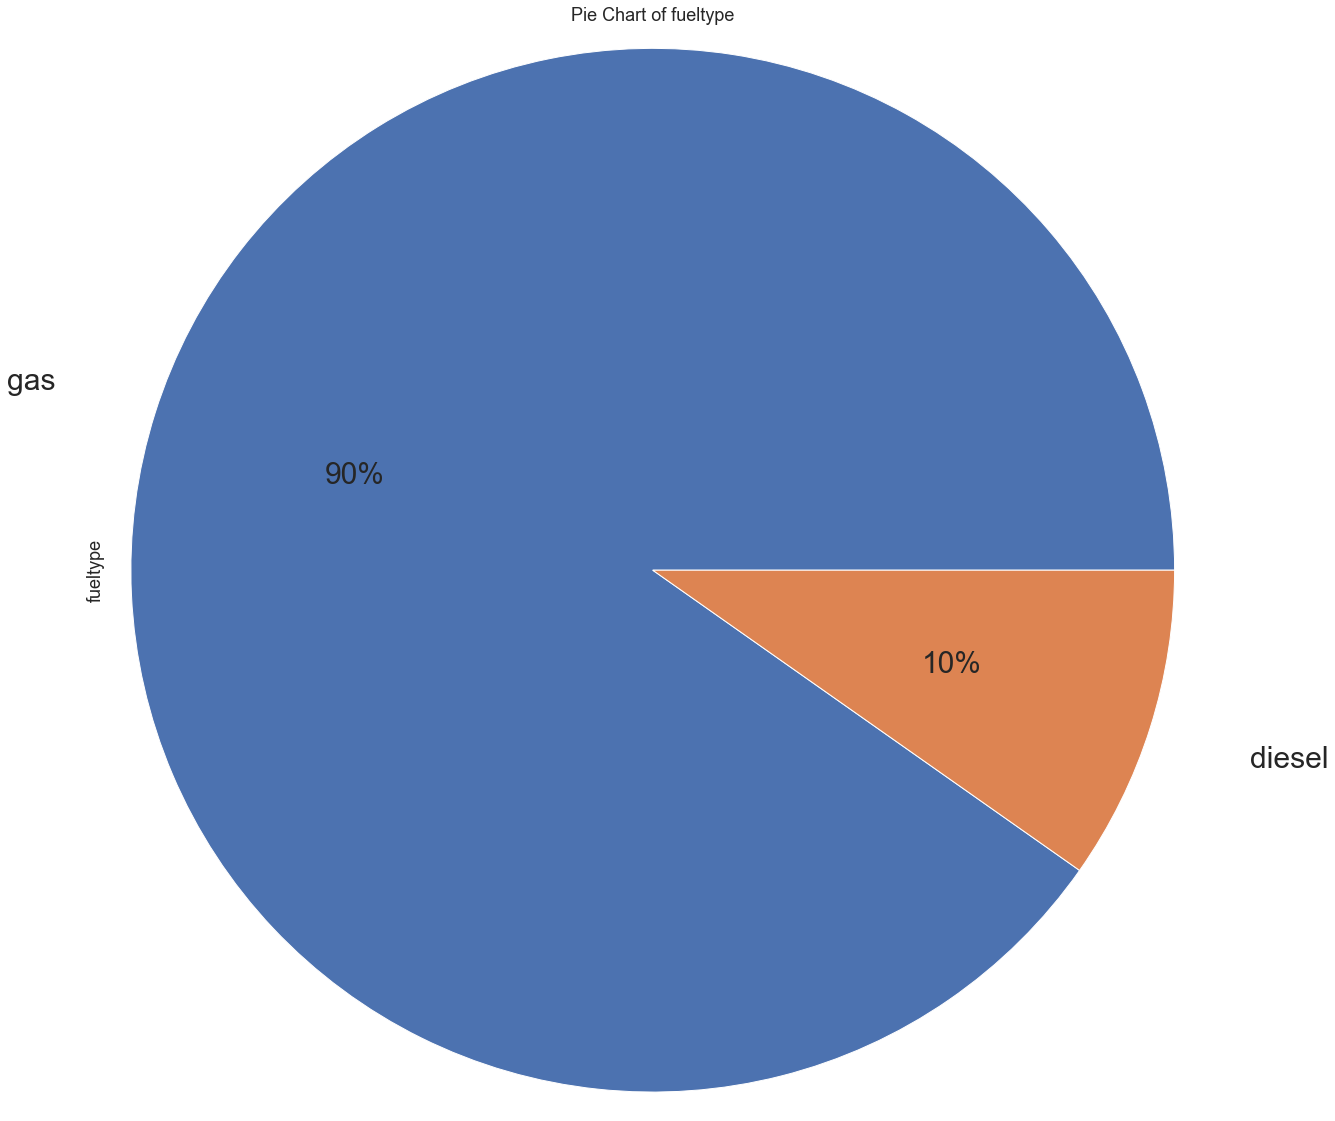

In [75]:
fueltypes.plot.pie(autopct = "%1.0f%%" , radius = 1.2 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of fueltype")

In [76]:
# To Present species of aspiration ::
aspirations = df["aspiration"].value_counts()
aspirations

std      168
turbo     37
Name: aspiration, dtype: int64

Text(0.5, 1.0, 'Pie Chart of aspiration')

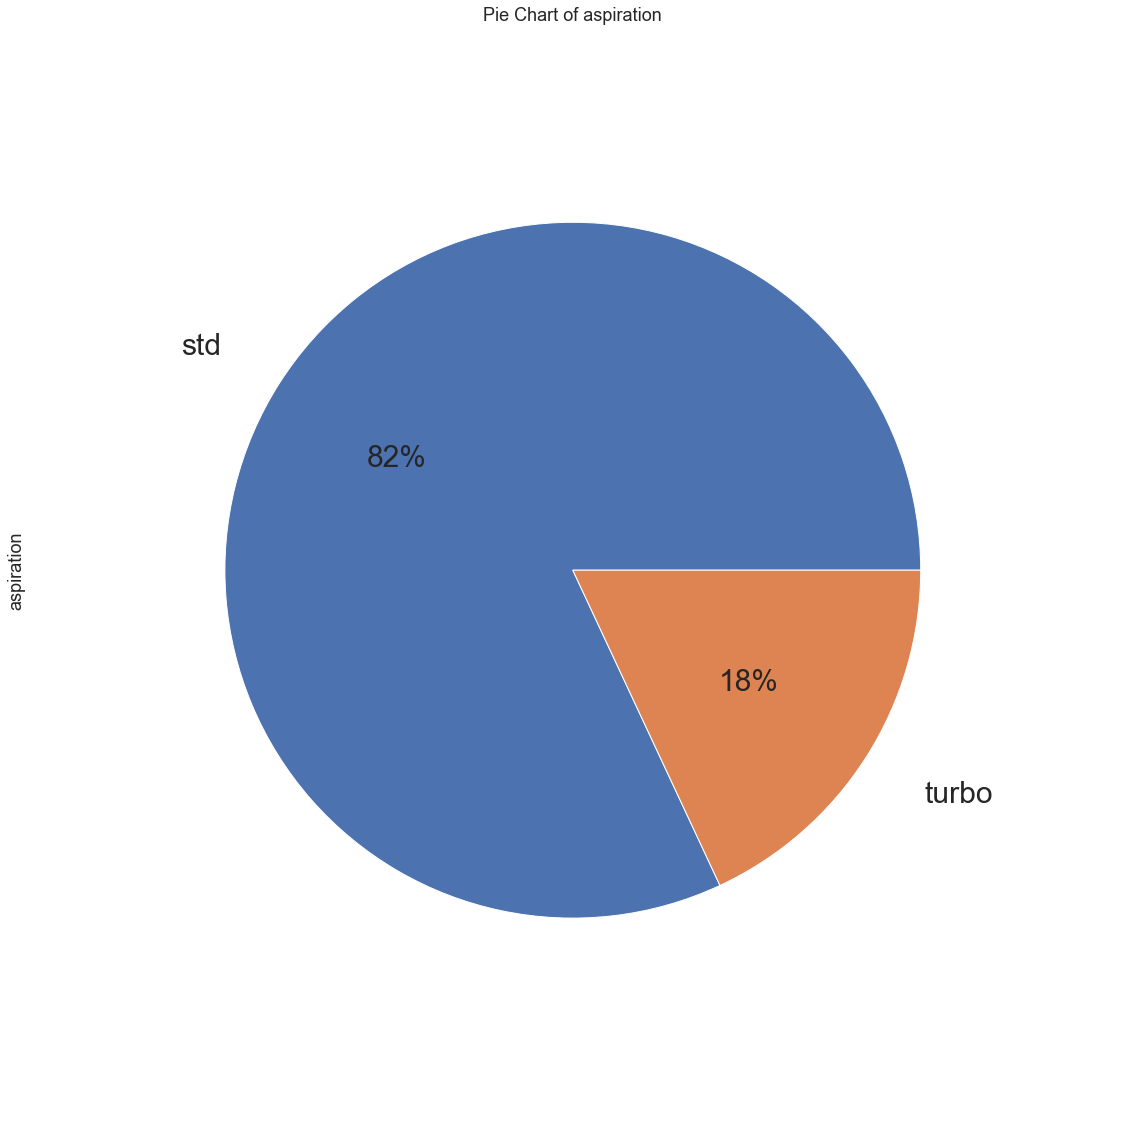

In [77]:
aspirations.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of aspiration")

In [78]:
# To Present species of doornumber ::
doornumbers = df["doornumber"].value_counts()
doornumbers

four    115
two      90
Name: doornumber, dtype: int64

Text(0.5, 1.0, 'Pie Chart of doornumber')

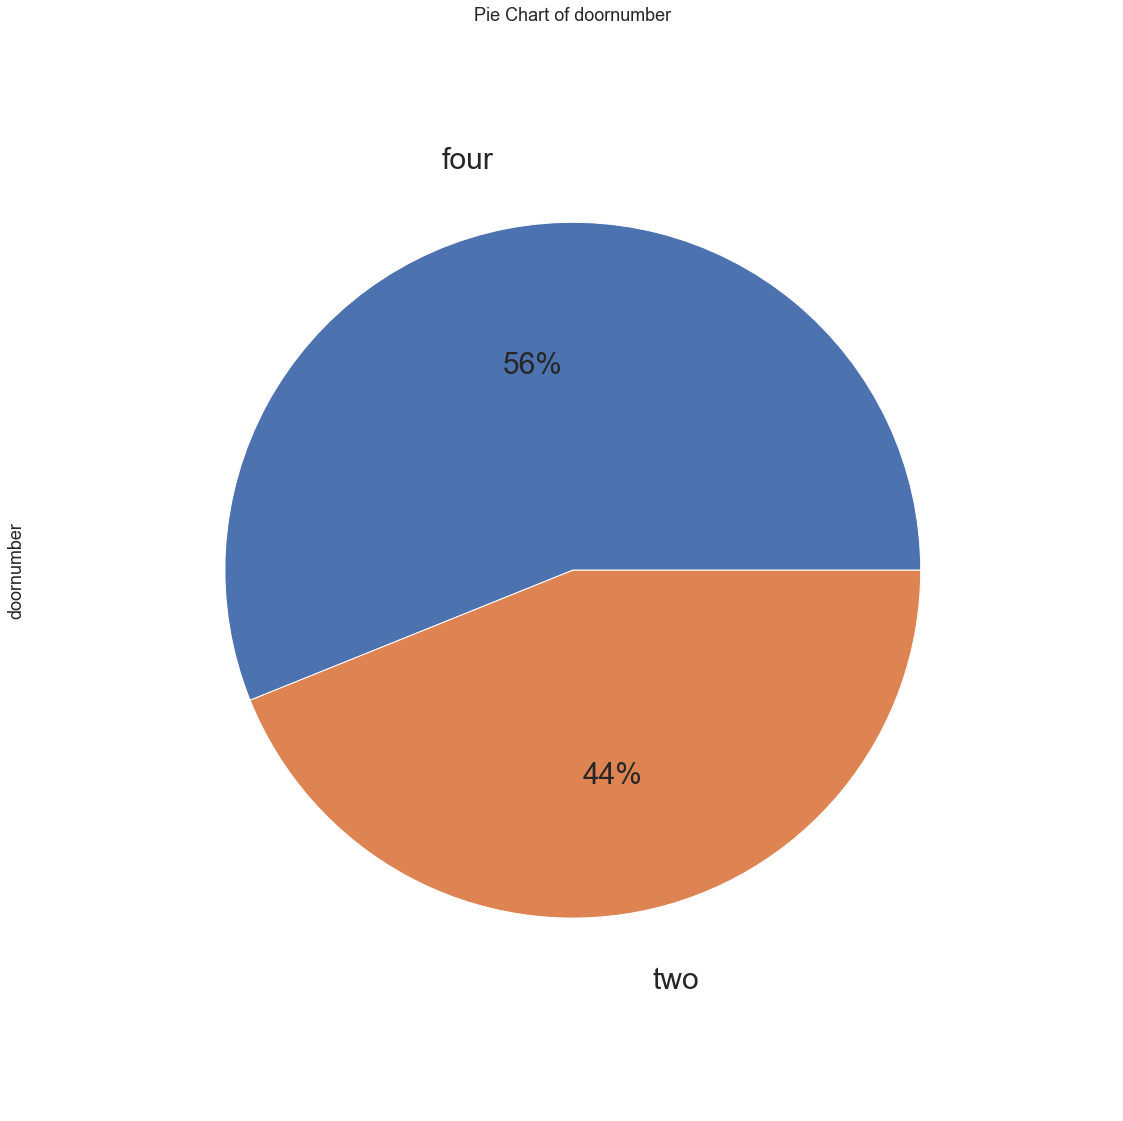

In [79]:
doornumbers.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of doornumber")

In [80]:
# To Present species of carbody ::
carbodys = df["carbody"].value_counts()
carbodys

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

Text(0.5, 1.0, 'Pie Chart of carbody')

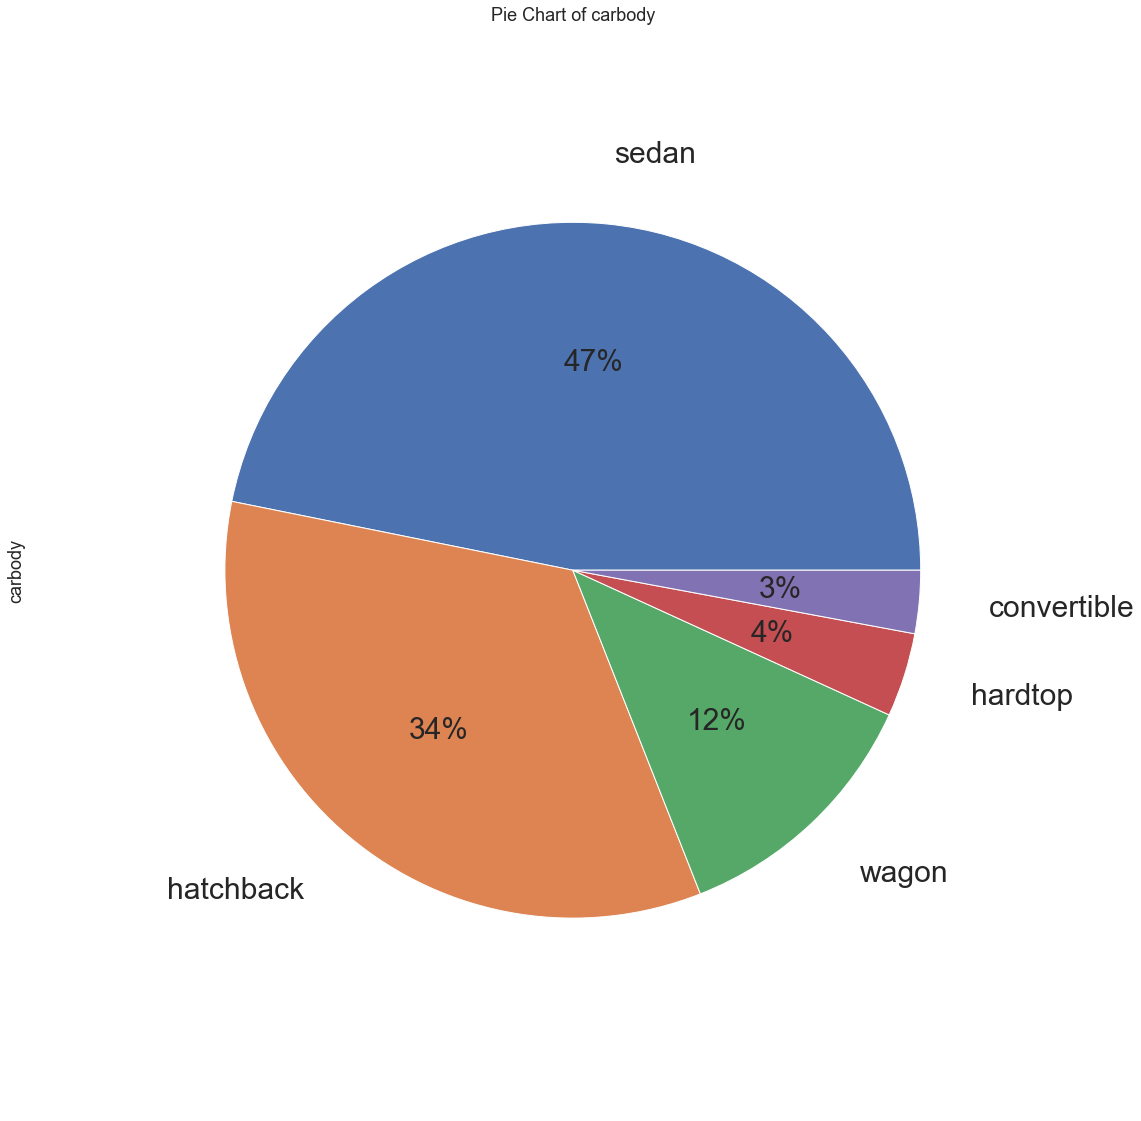

In [81]:
carbodys.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of carbody")

In [82]:
# To Present species of drivewheel ::
drivewheels = df["drivewheel"].value_counts()
drivewheels

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

Text(0.5, 1.0, 'Pie Chart of drivewheel')

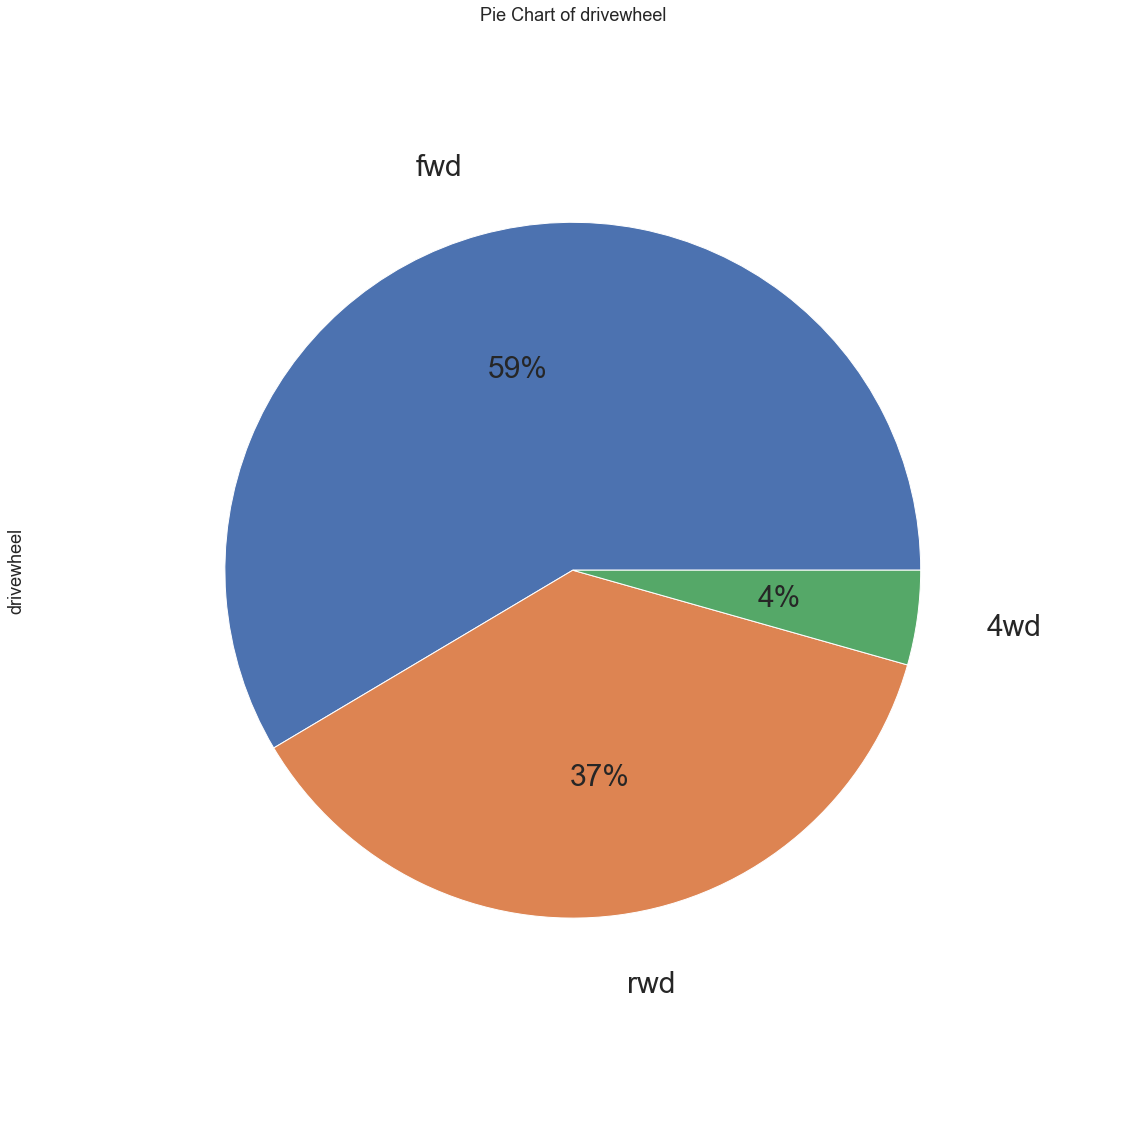

In [83]:
drivewheels.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of drivewheel")

In [84]:
# To Present species of enginelocation ::
enginelocations = df["enginelocation"].value_counts()
enginelocations

front    202
rear       3
Name: enginelocation, dtype: int64

Text(0.5, 1.0, 'Pie Chart of enginelocation')

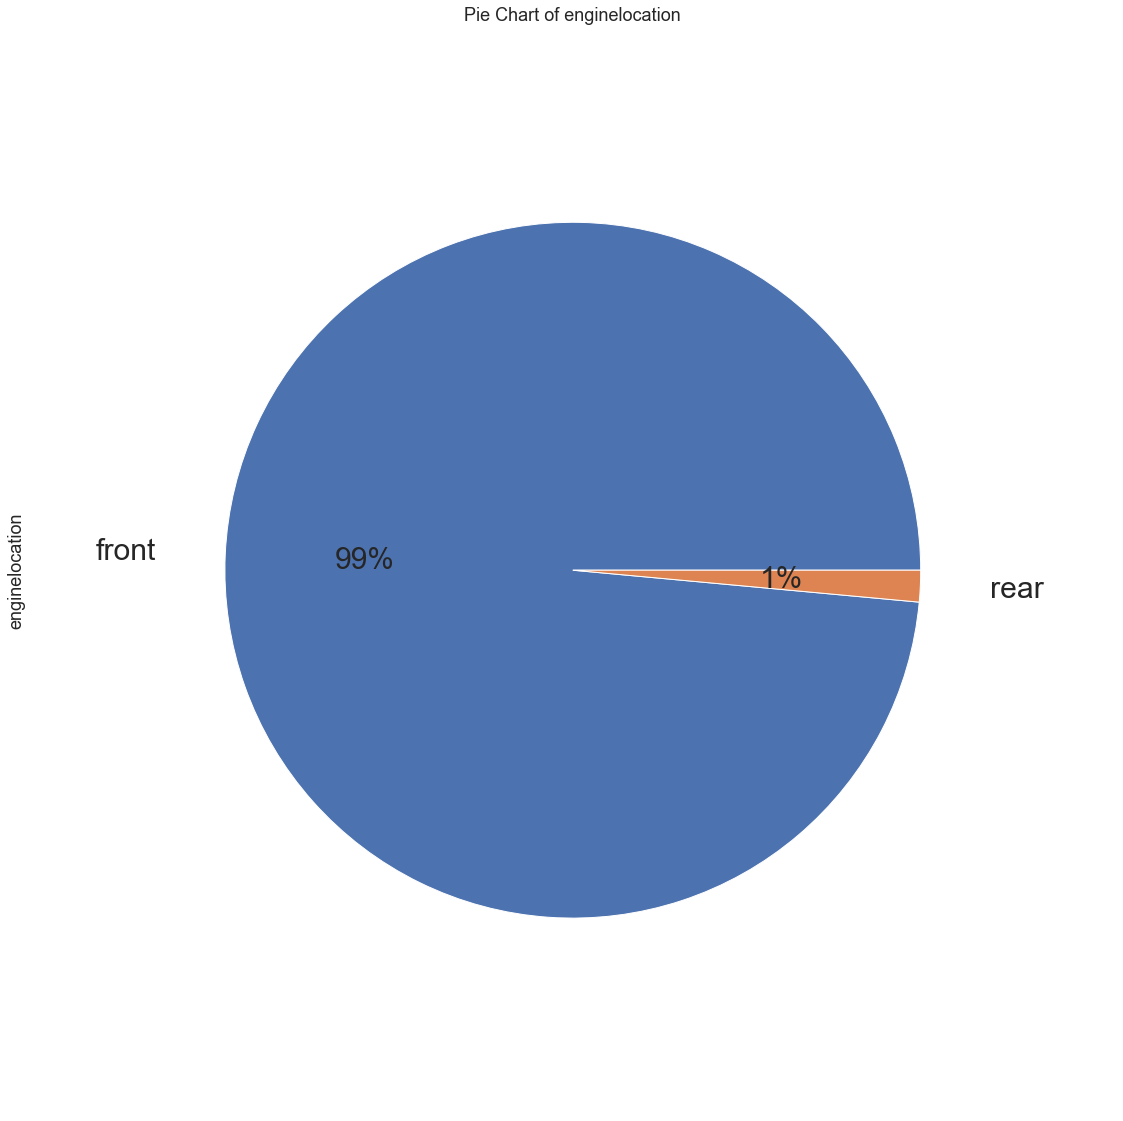

In [85]:
enginelocations.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of enginelocation")

In [86]:
# To Present species of enginetype ::
enginetypes = df["enginetype"].value_counts()
enginetypes

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

Text(0.5, 1.0, 'Pie Chart of enginetype')

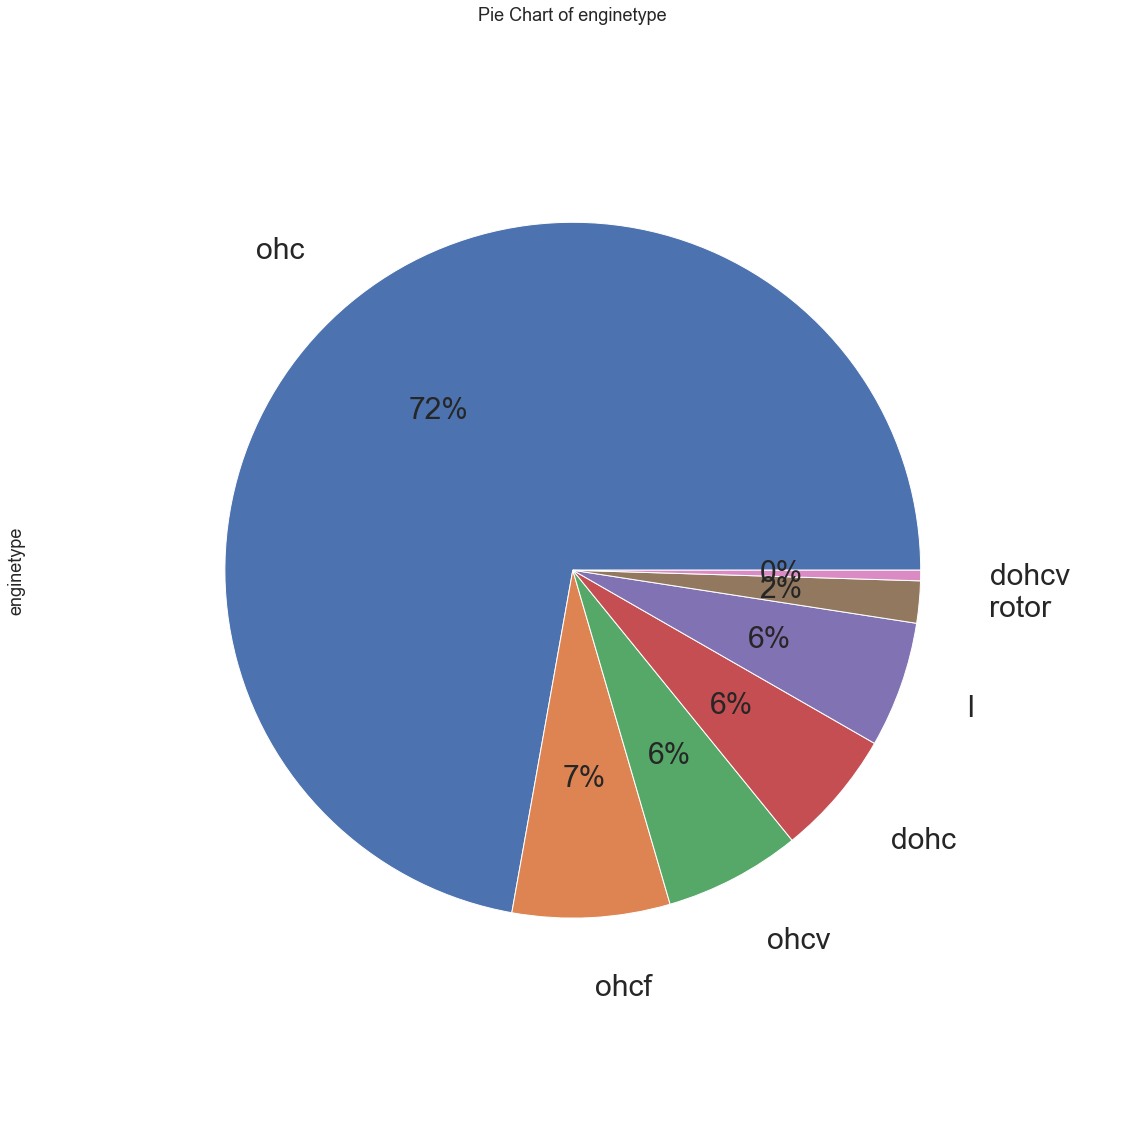

In [87]:
enginetypes.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of enginetype")

In [88]:
# To Present species of cylindernumber ::
cylindernumbers = df["cylindernumber"].value_counts()
cylindernumbers

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

Text(0.5, 1.0, 'Pie Chart of cylindernumber')

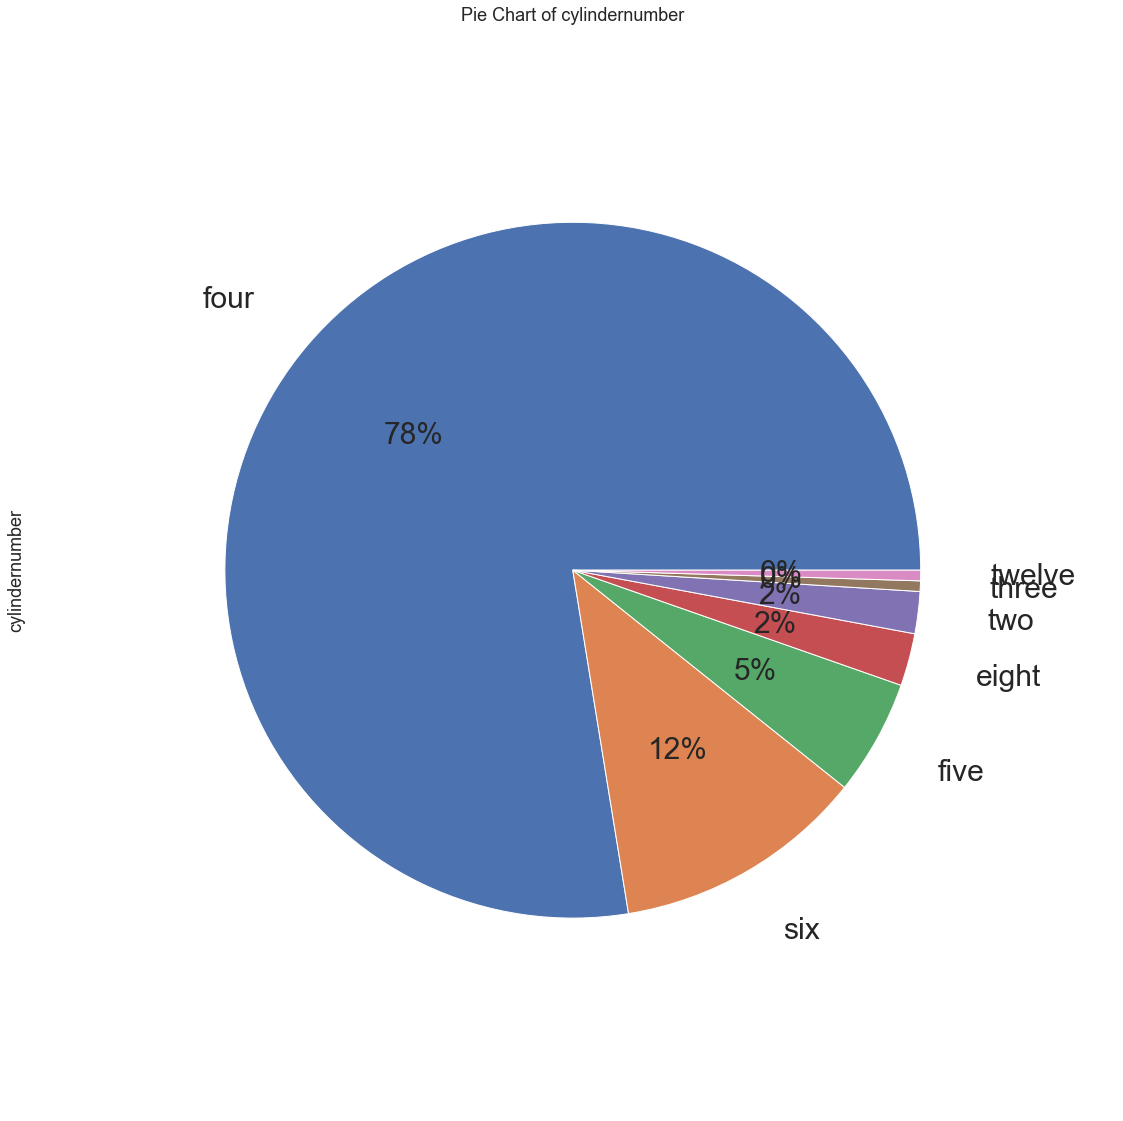

In [89]:
cylindernumbers.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of cylindernumber")

In [90]:
# To Present species of fuelsystem ::
fuelsystems = df["fuelsystem"].value_counts()
fuelsystems

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

Text(0.5, 1.0, 'Pie Chart of fuelsystem')

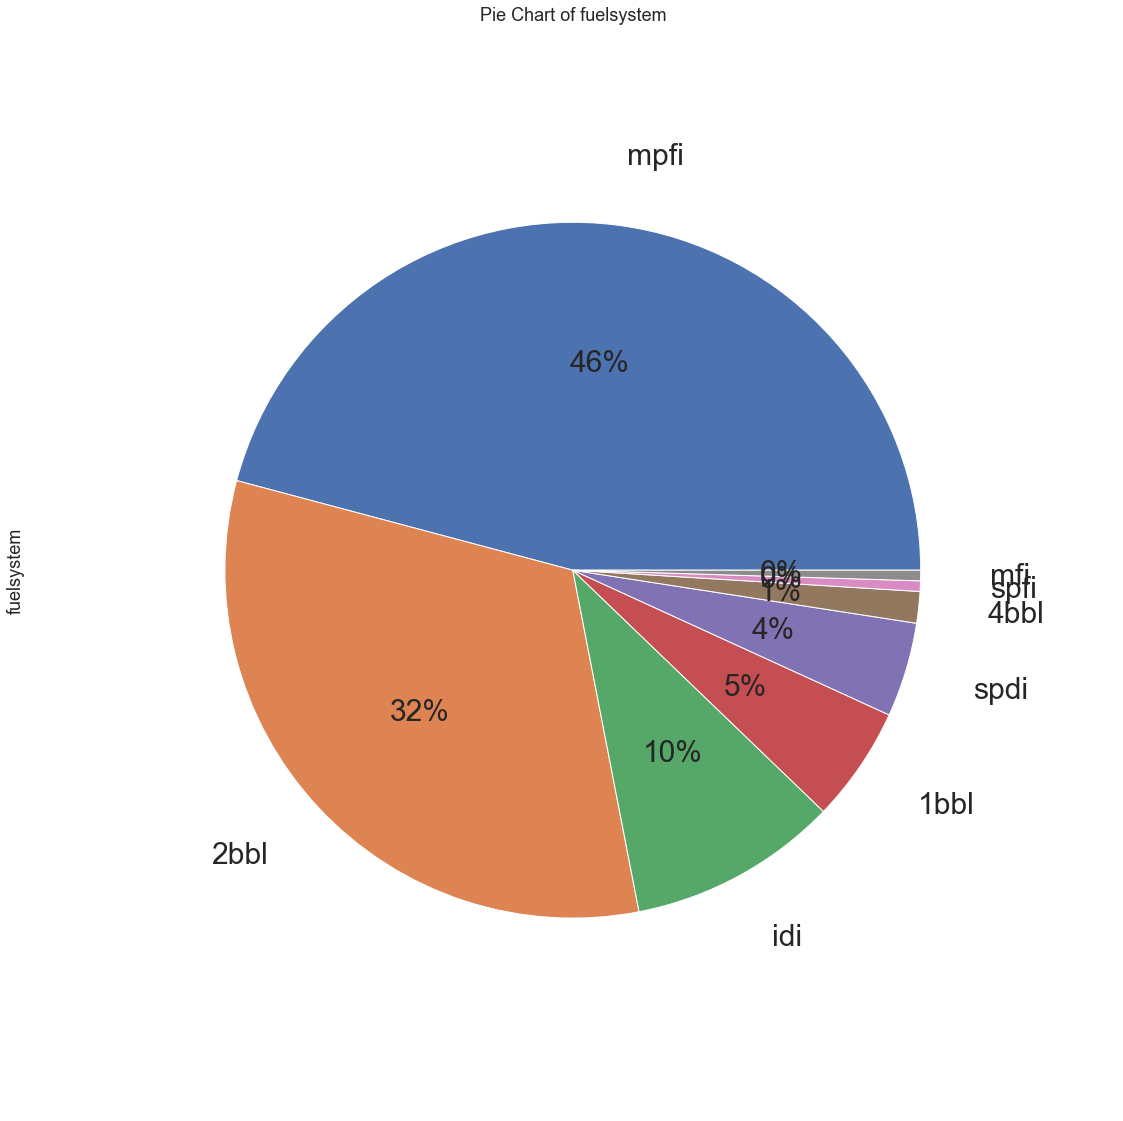

In [91]:
fuelsystems.plot.pie(autopct = "%1.0f%%" , radius = 0.8 , labeldistance = 1.2 , fontsize = 30)
plt.title("Pie Chart of fuelsystem")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Distribution Plot of symboling')

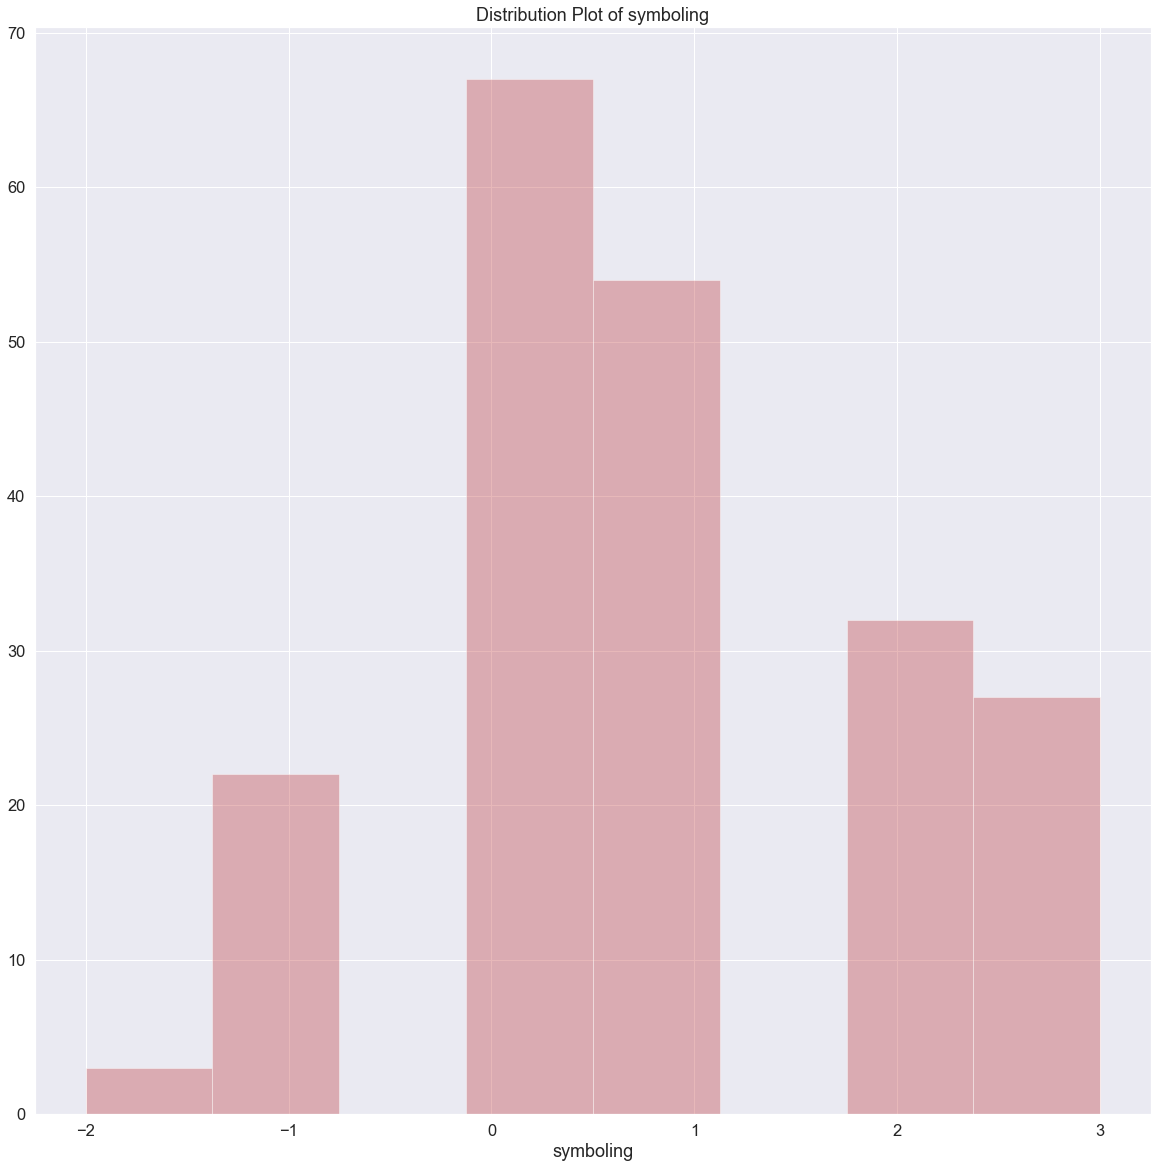

In [93]:
sns.distplot(df["symboling"] , kde=False , color="r")
plt.title("Distribution Plot of symboling")

Text(0.5, 1.0, 'Kde Plot of symboling')

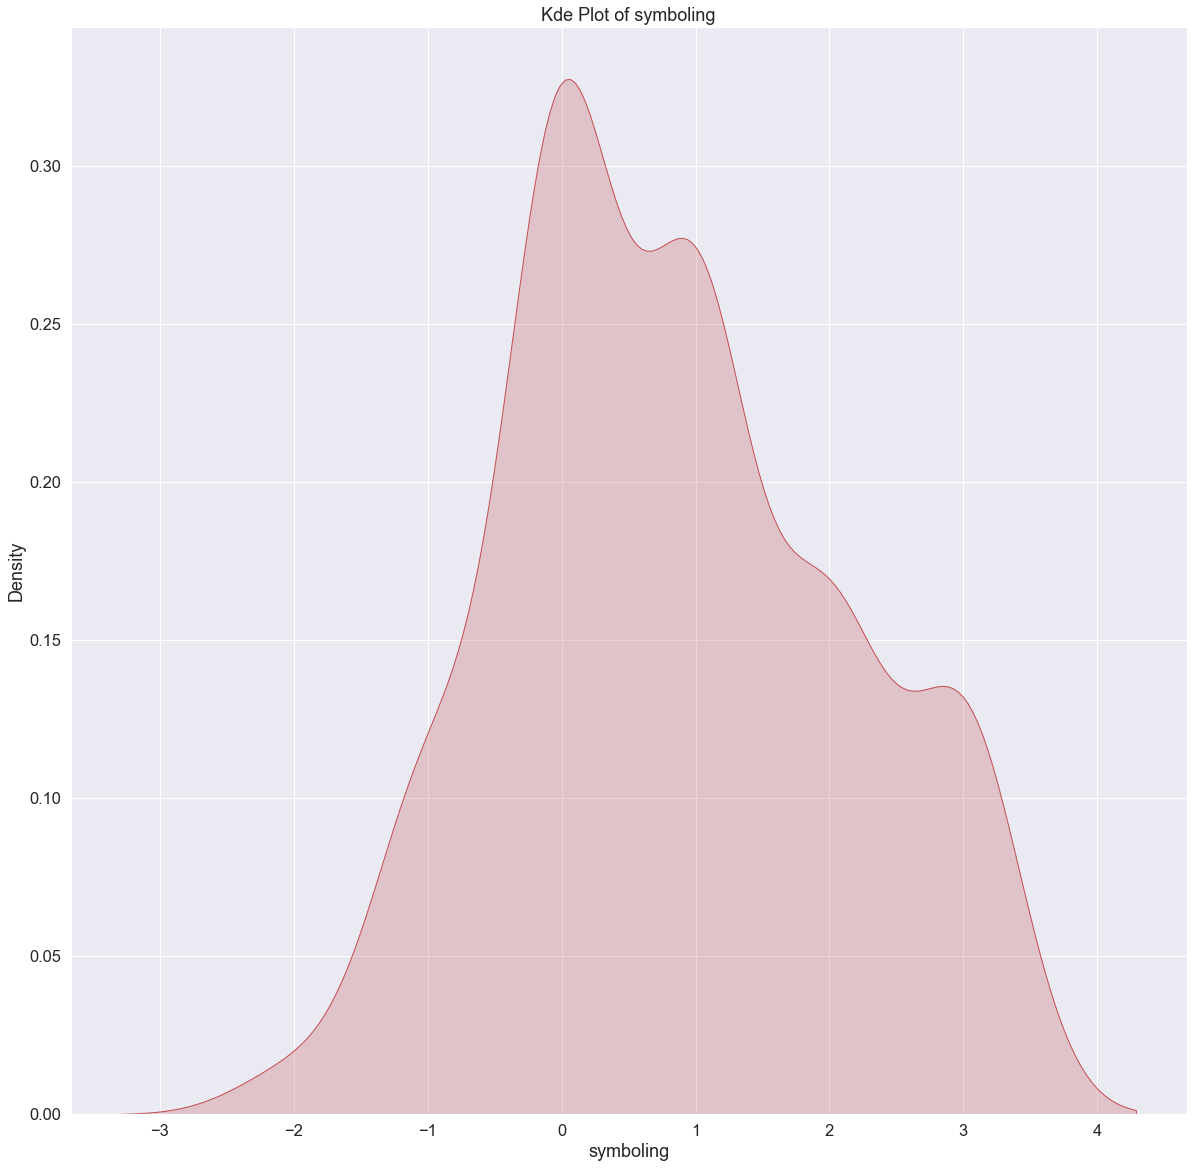

In [94]:
sns.kdeplot(df["symboling"] , shade=True , color="r")
plt.title("Kde Plot of symboling")

Text(0.5, 1.0, 'Distribution Plot of wheelbase')

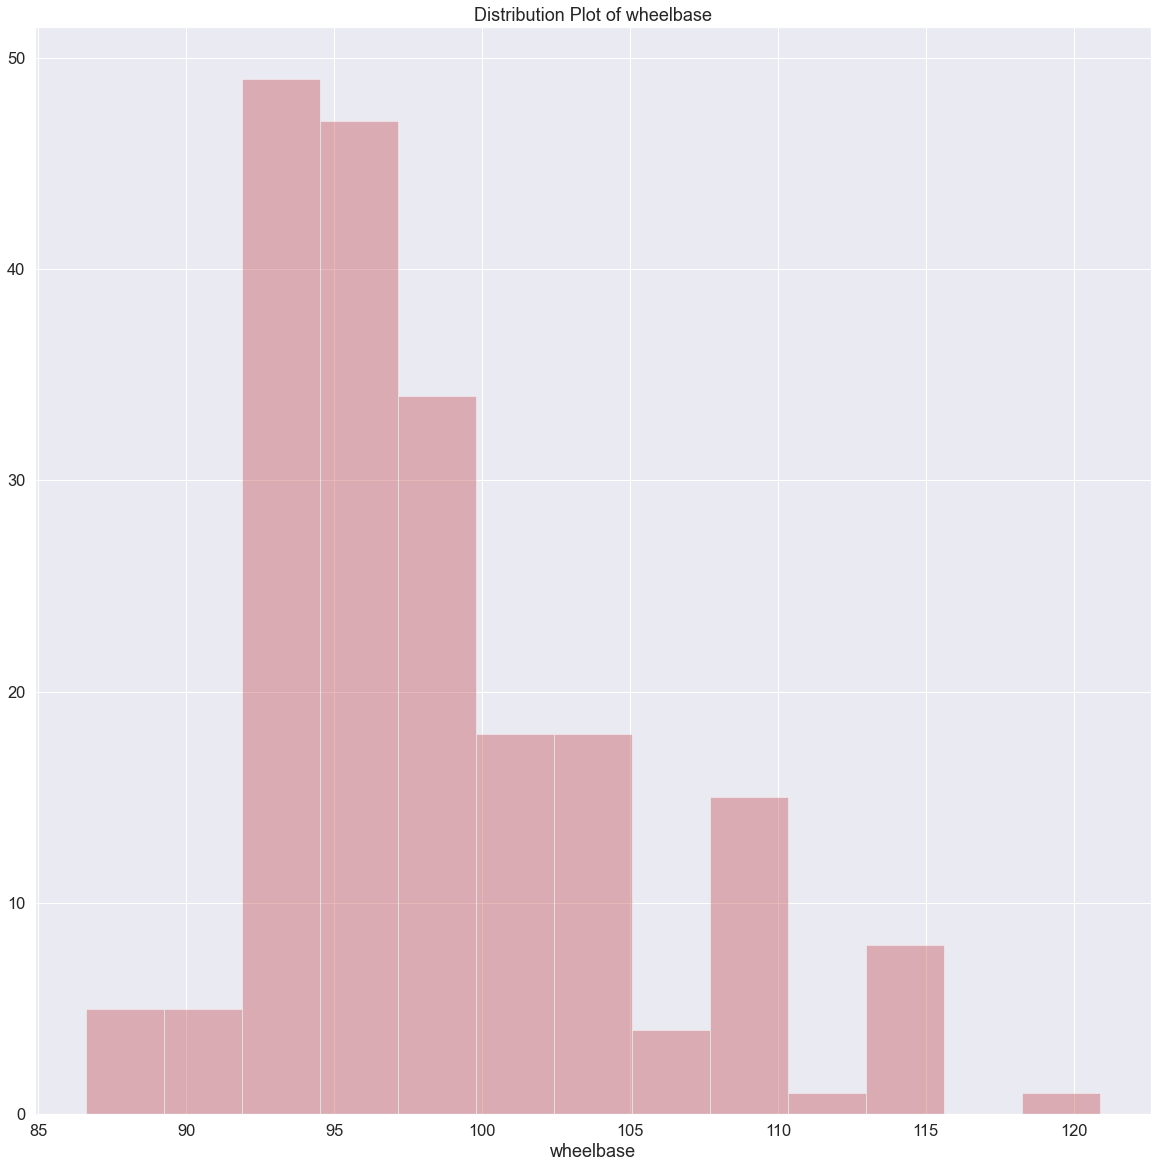

In [95]:
sns.distplot(df["wheelbase"] , kde=False , color="r")
plt.title("Distribution Plot of wheelbase")

Text(0.5, 1.0, 'Kde Plot of wheelbase')

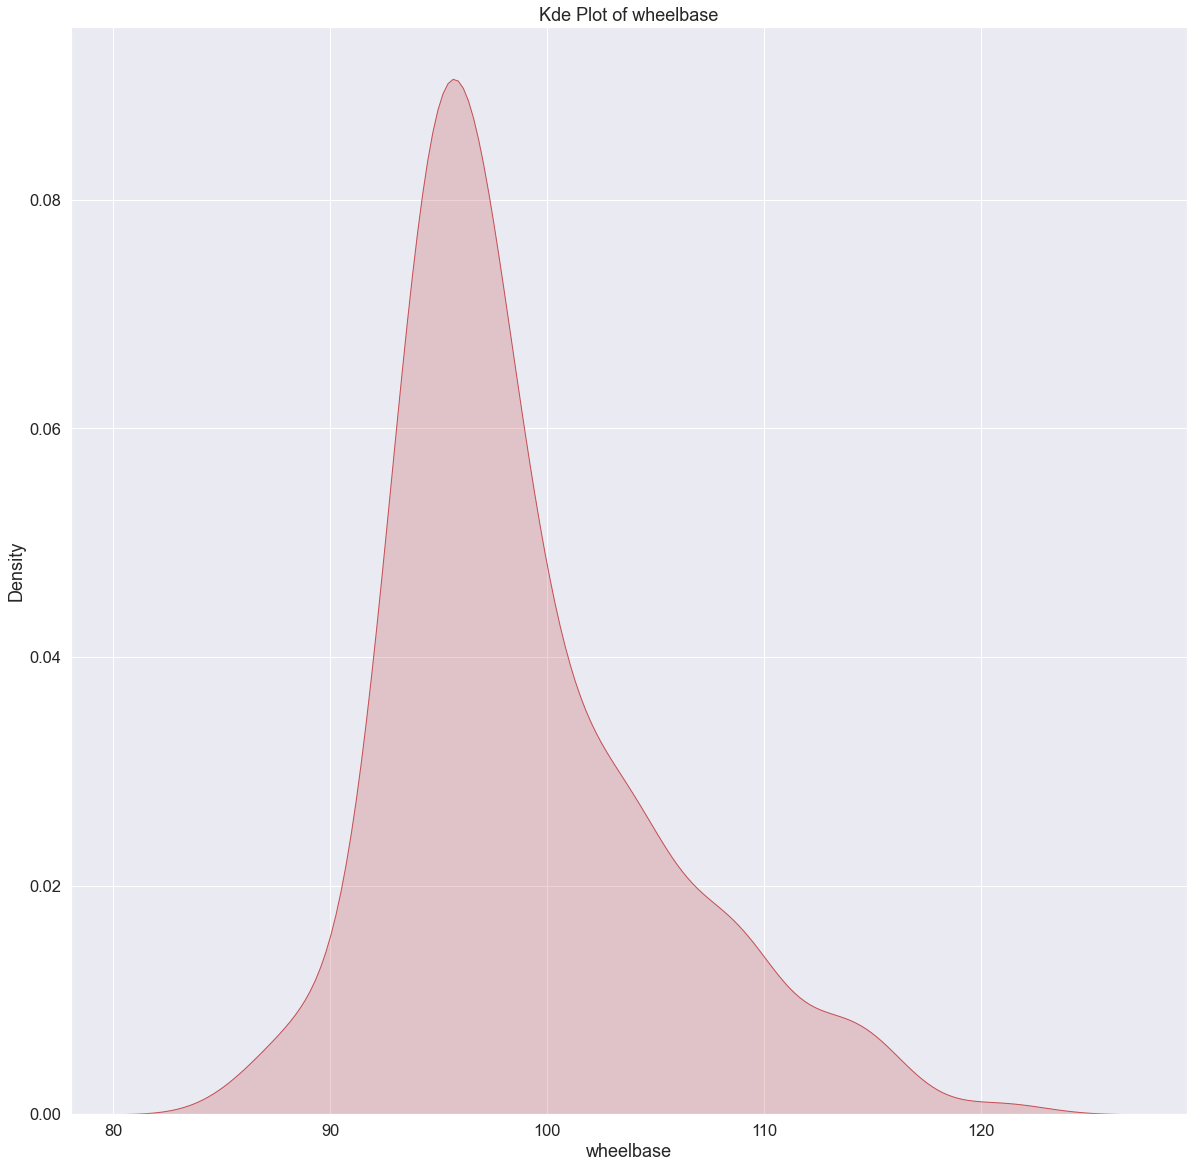

In [96]:
sns.kdeplot(df["wheelbase"] , shade=True , color="r")
plt.title("Kde Plot of wheelbase")

Text(0.5, 1.0, 'Distribution Plot of enginesize')

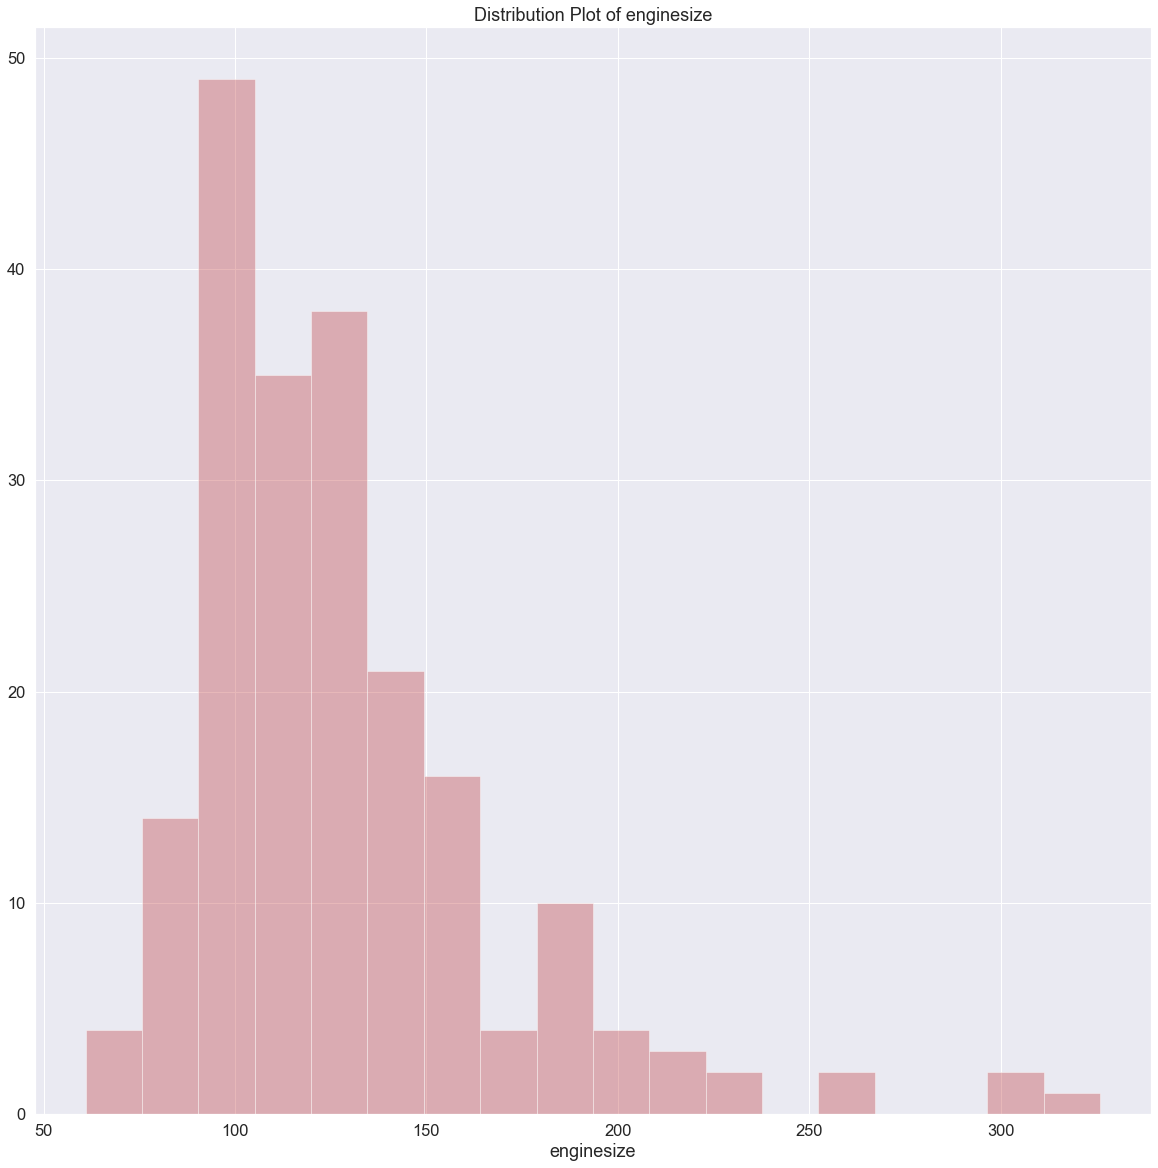

In [97]:
sns.distplot(df["enginesize"] , kde=False , color="r")
plt.title("Distribution Plot of enginesize")

Text(0.5, 1.0, 'Kde Plot of enginesize')

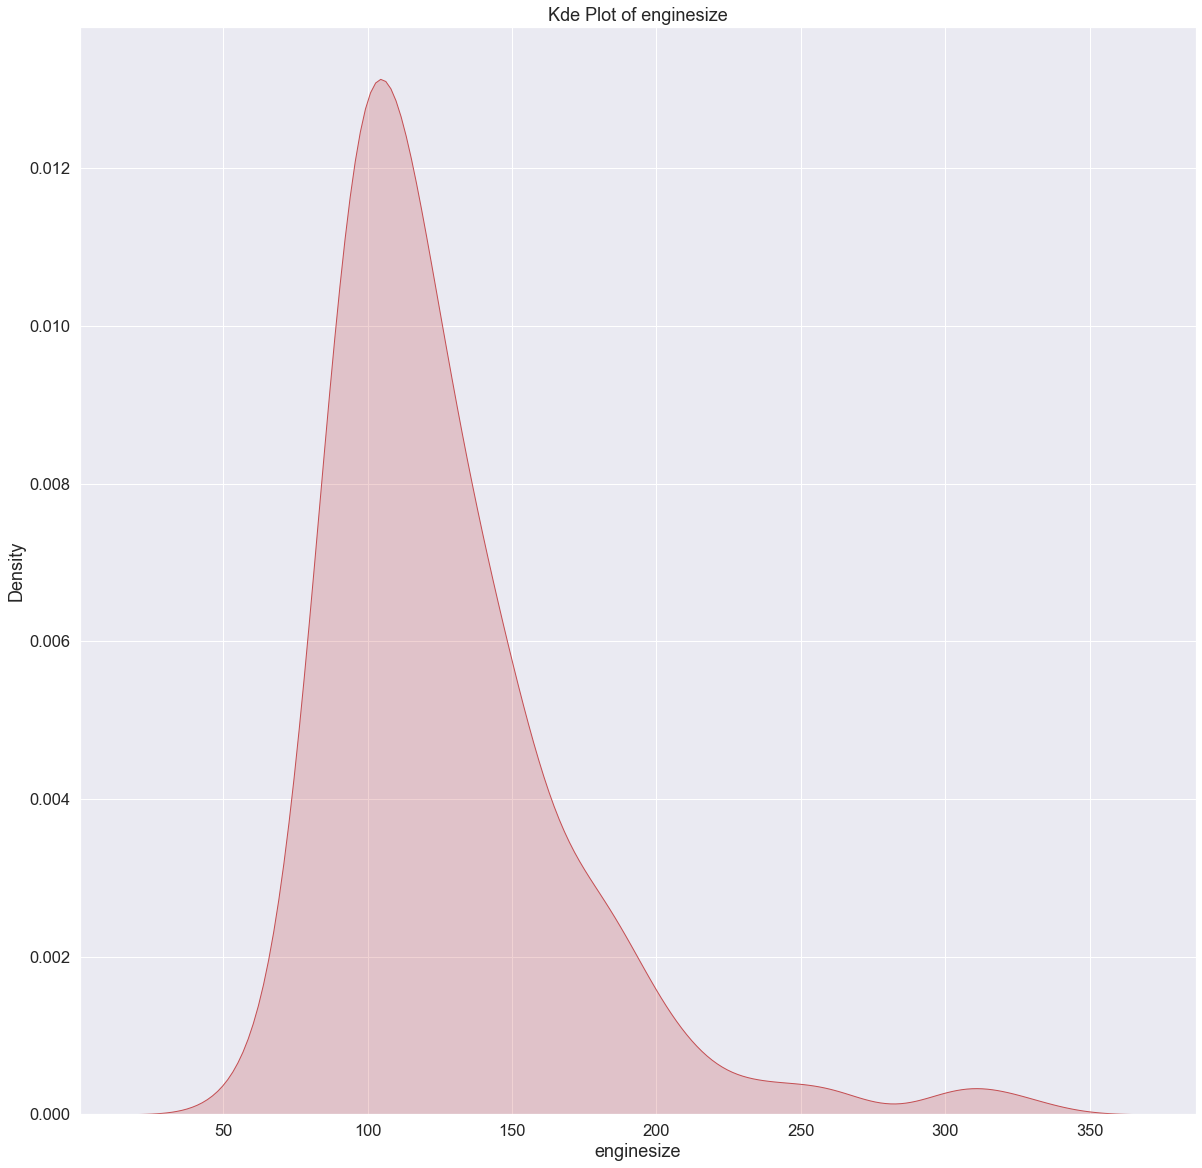

In [98]:
sns.kdeplot(df["enginesize"] , shade=True , color="r")
plt.title("Kde Plot of enginesize")

Text(0.5, 1.0, 'Distribution Plot of compressionratio')

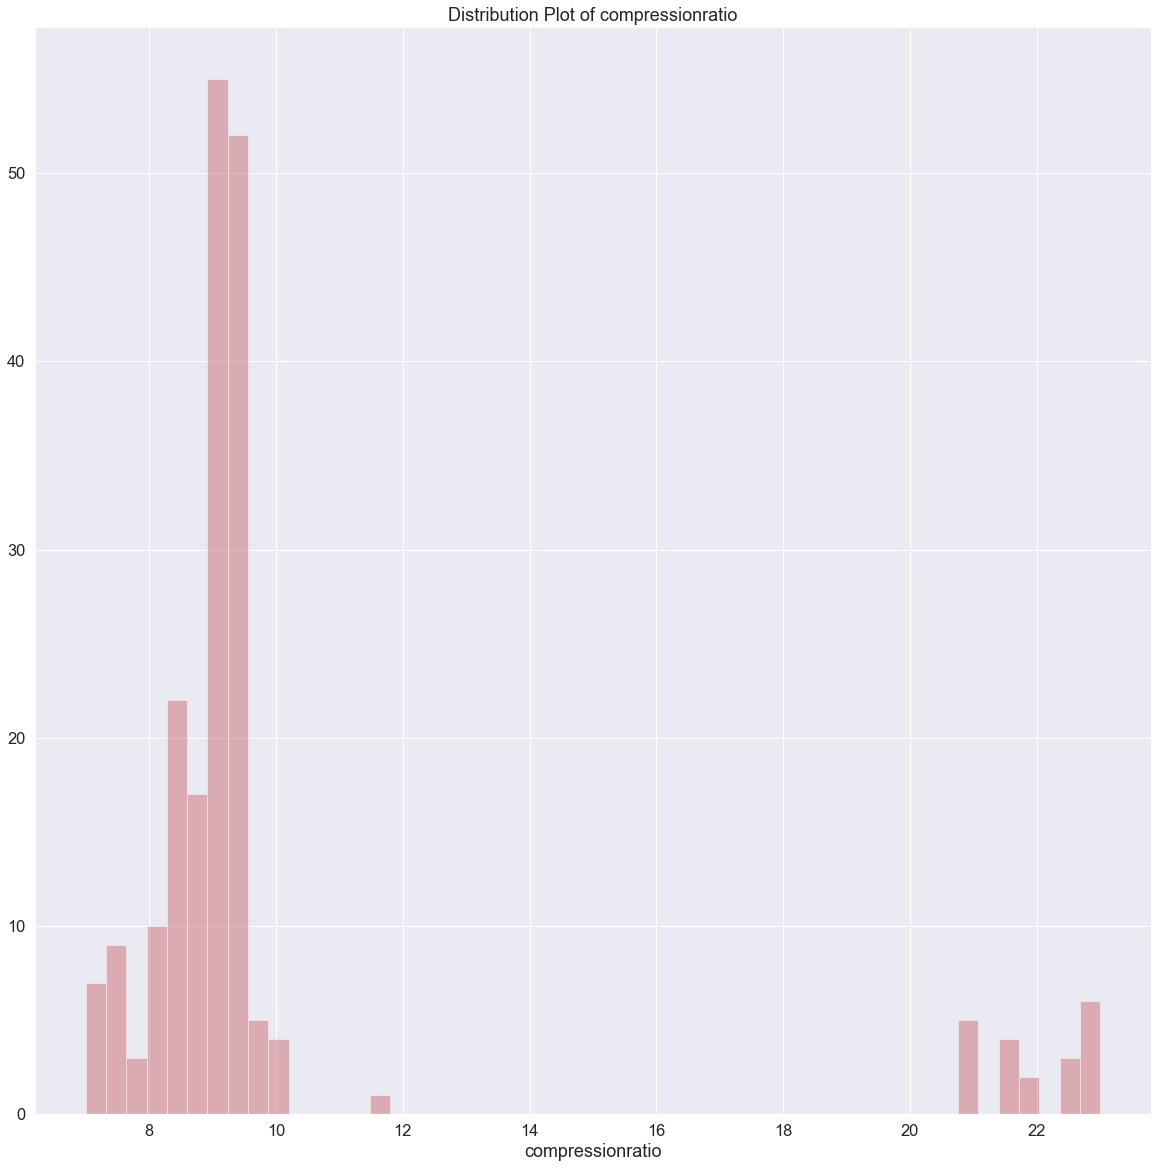

In [99]:
sns.distplot(df["compressionratio"] , kde=False , color="r")
plt.title("Distribution Plot of compressionratio")

Text(0.5, 1.0, 'Kde Plot of compressionratio')

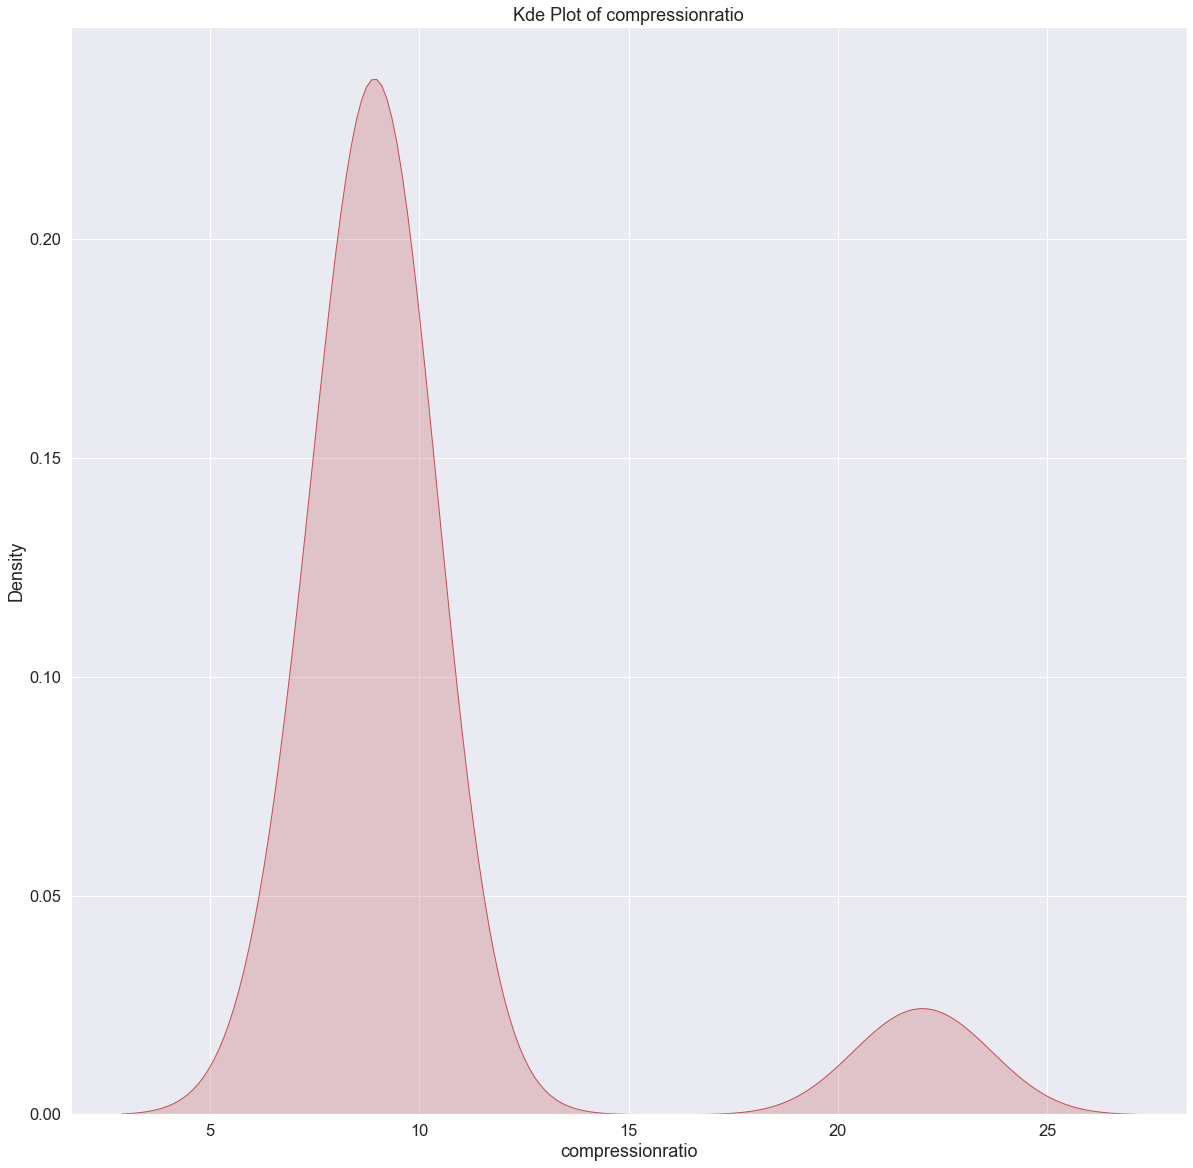

In [100]:
sns.kdeplot(df["compressionratio"] , shade=True , color="r")
plt.title("Kde Plot of compressionratio")

Text(0.5, 1.0, 'Distribution Plot of horsepower')

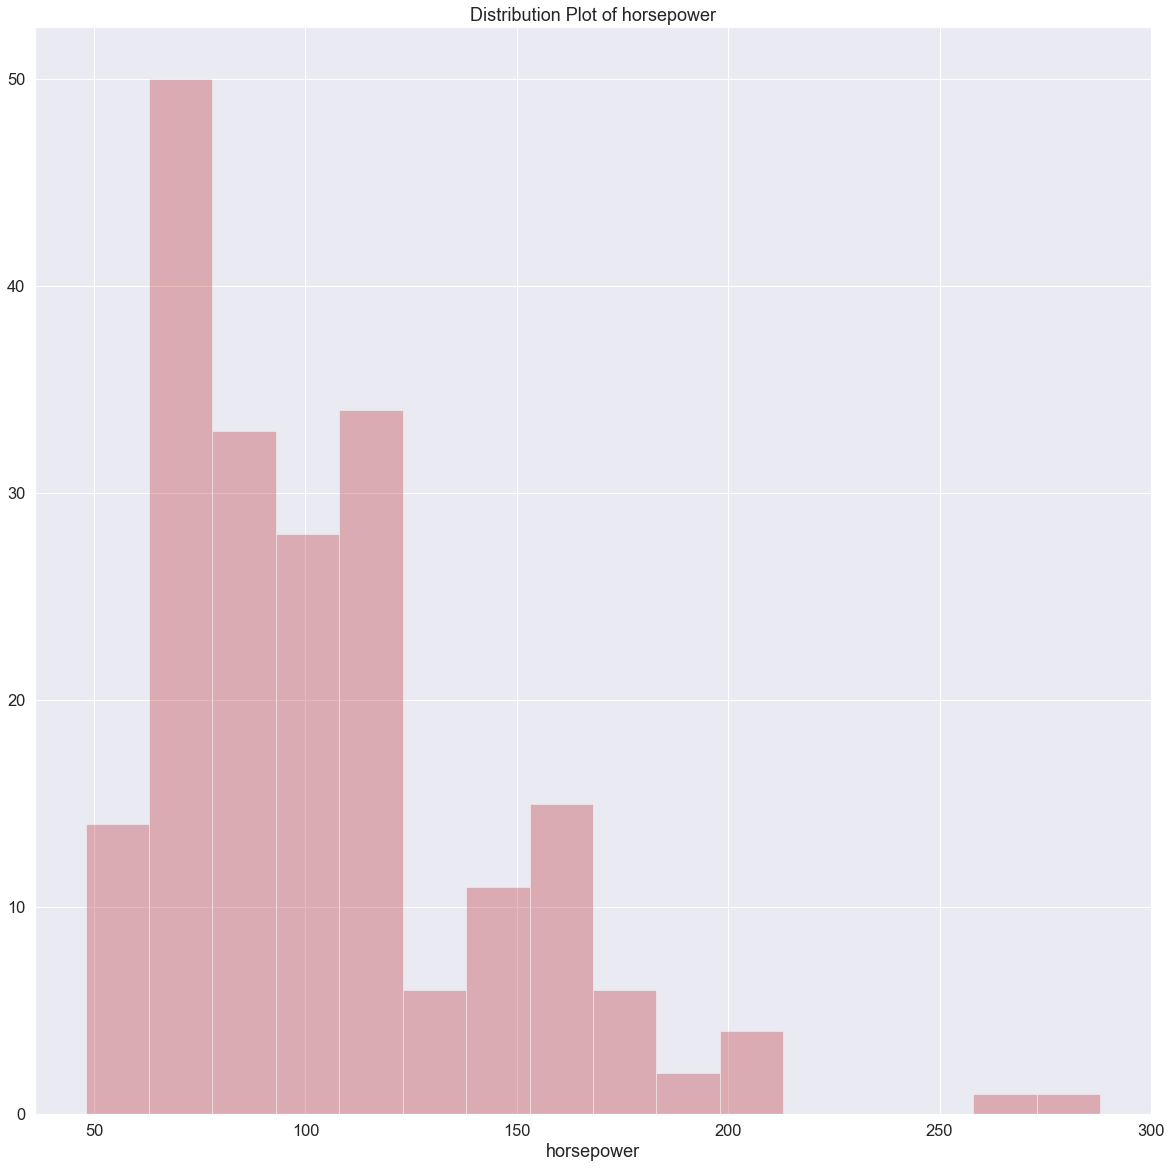

In [101]:
sns.distplot(df["horsepower"] , kde=False , color="r")
plt.title("Distribution Plot of horsepower")

Text(0.5, 1.0, 'Kde Plot of horsepower')

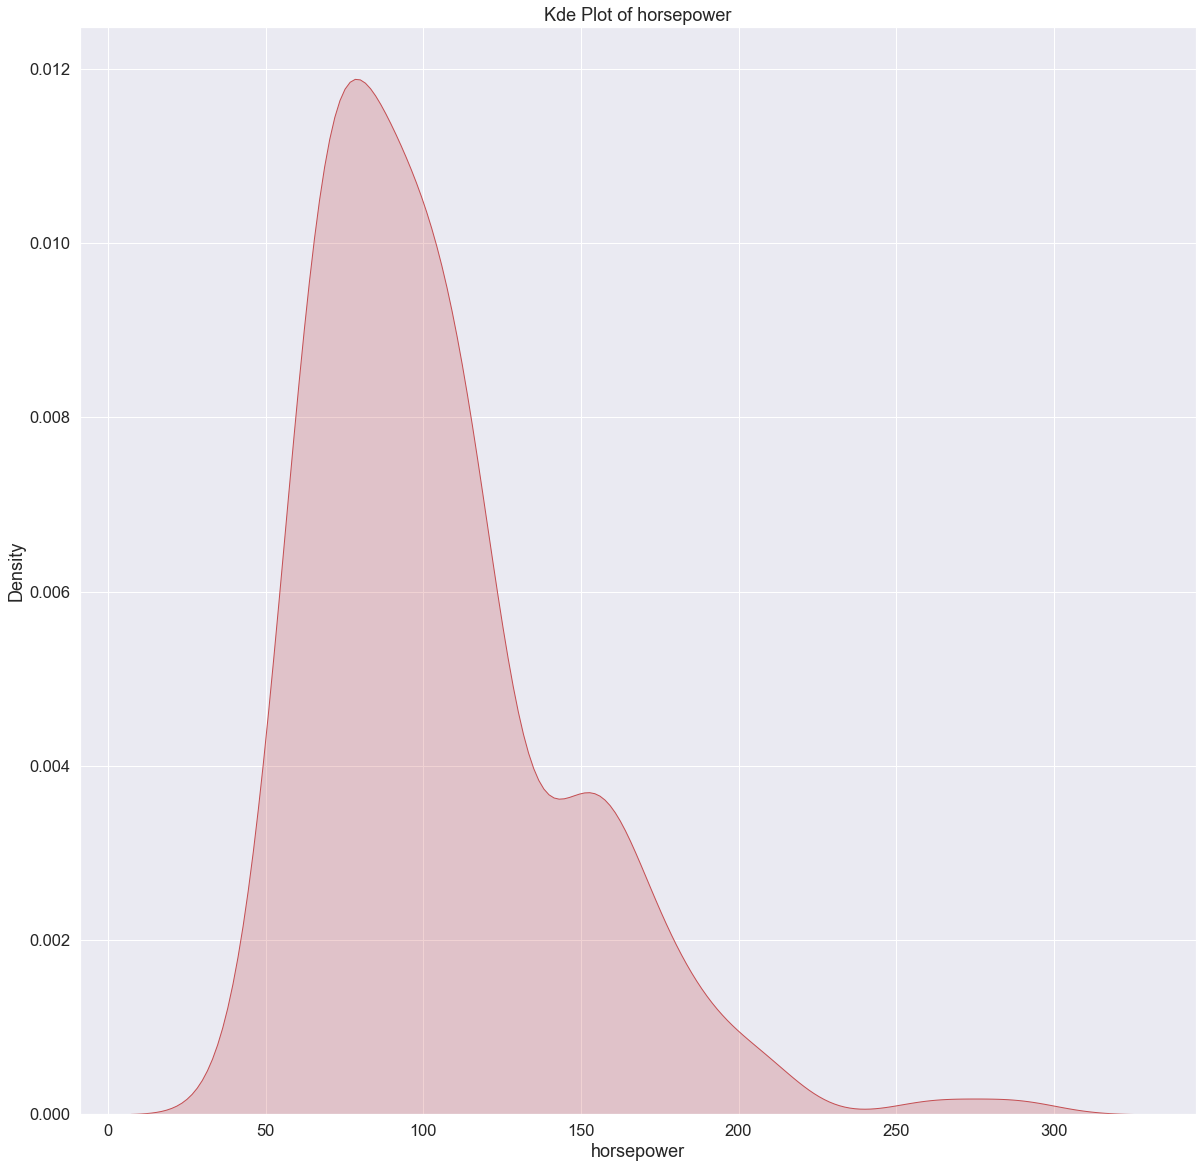

In [102]:
sns.kdeplot(df["horsepower"] , shade=True , color="r")
plt.title("Kde Plot of horsepower")

Text(0.5, 1.0, 'Distribution Plot of stroke')

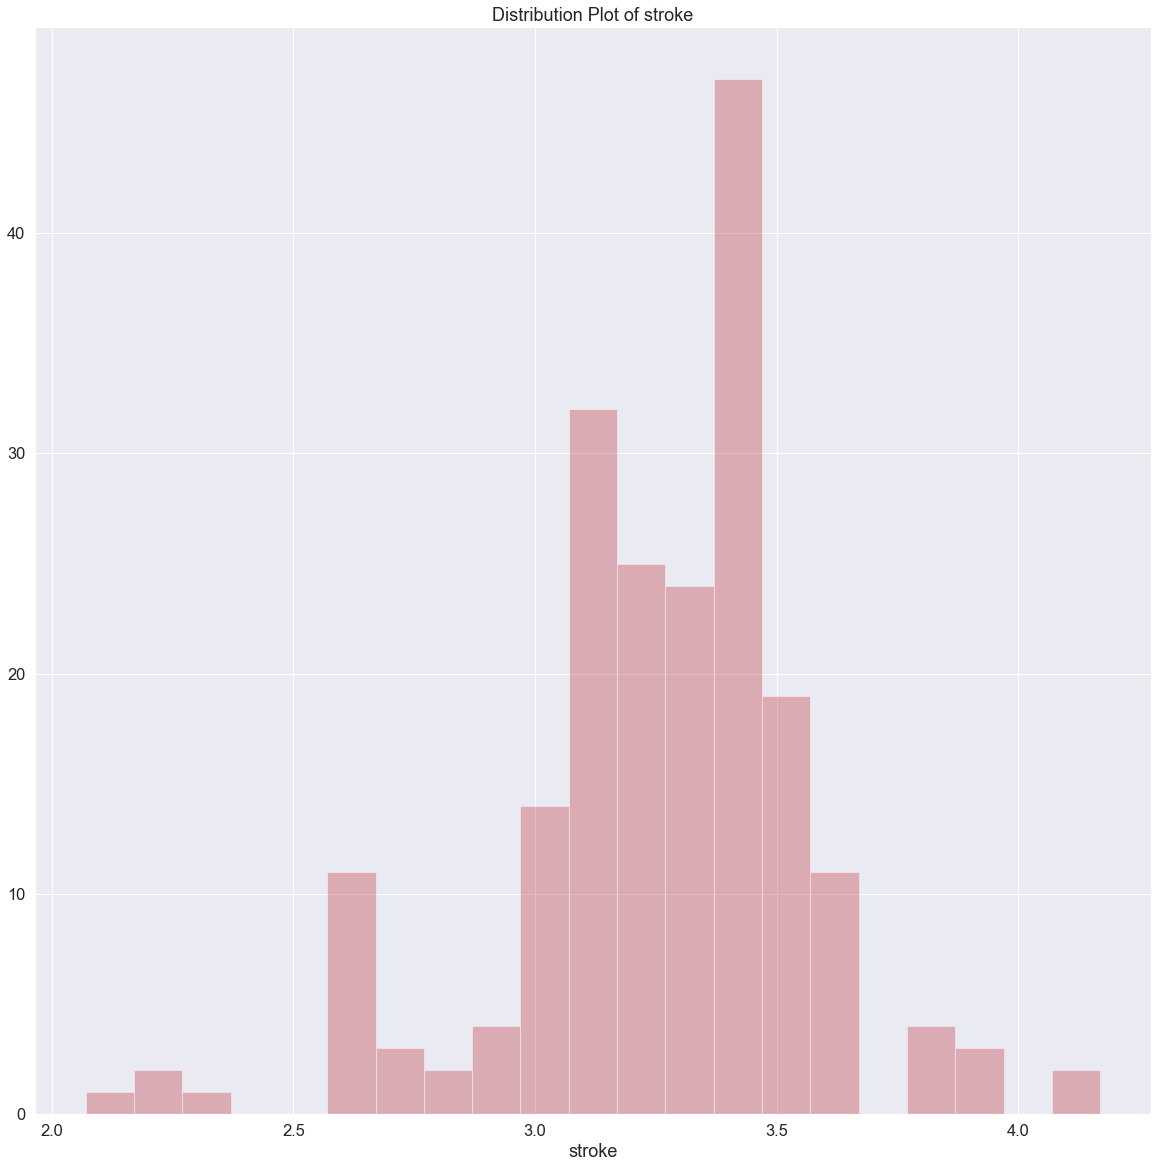

In [103]:
sns.distplot(df["stroke"] , kde=False , color="r")
plt.title("Distribution Plot of stroke")

Text(0.5, 1.0, 'Kde Plot of stroke')

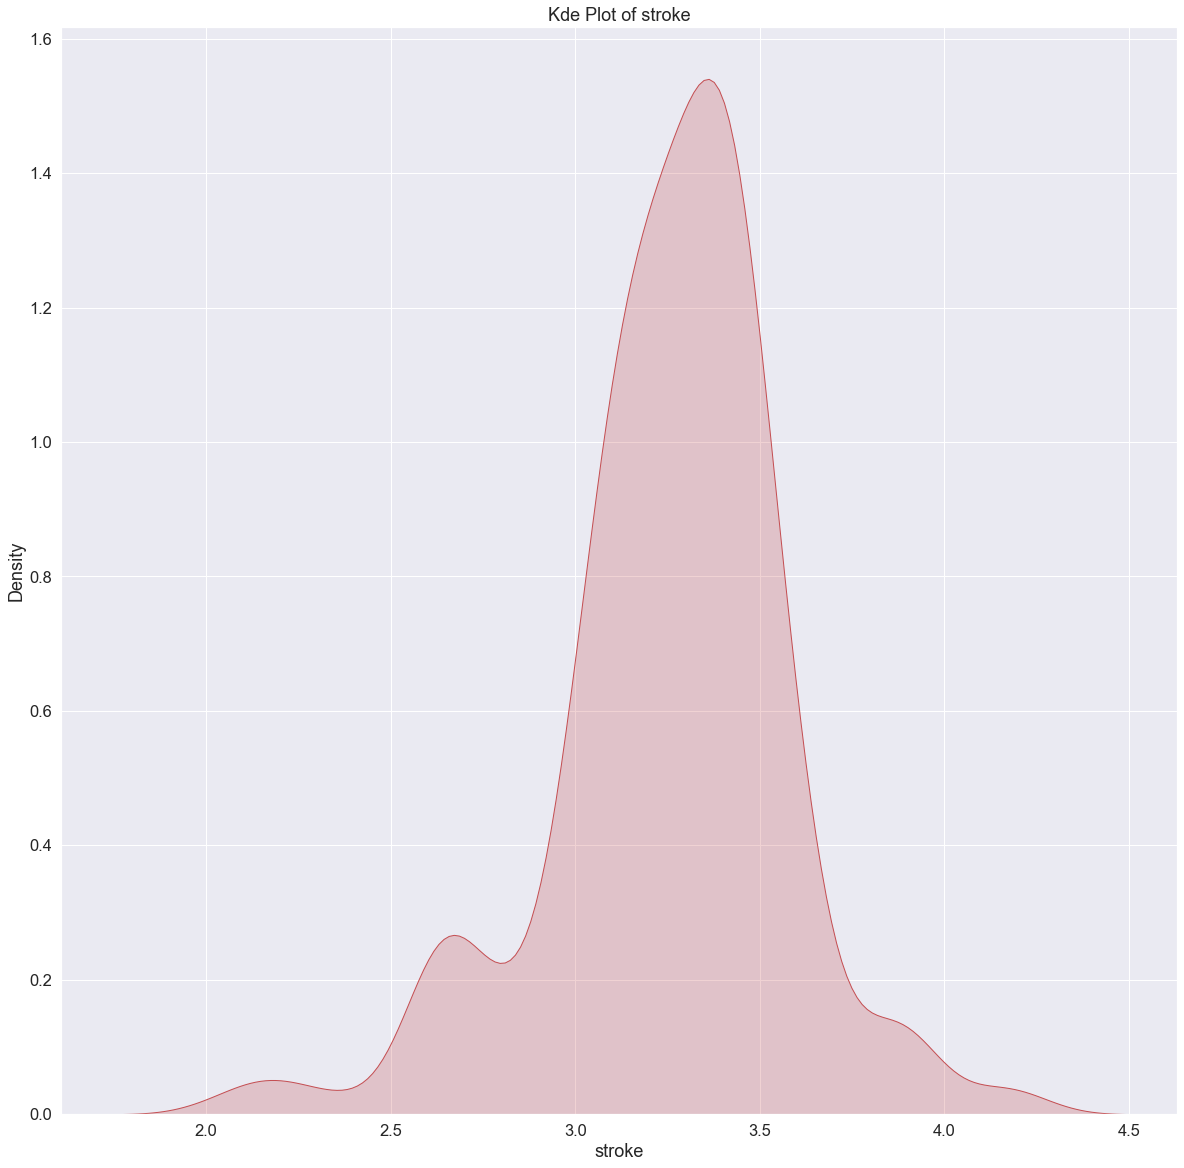

In [104]:
sns.kdeplot(df["stroke"] , shade=True , color="r")
plt.title("Kde Plot of stroke")

Text(0.5, 1.0, 'Distribution Plot of price')

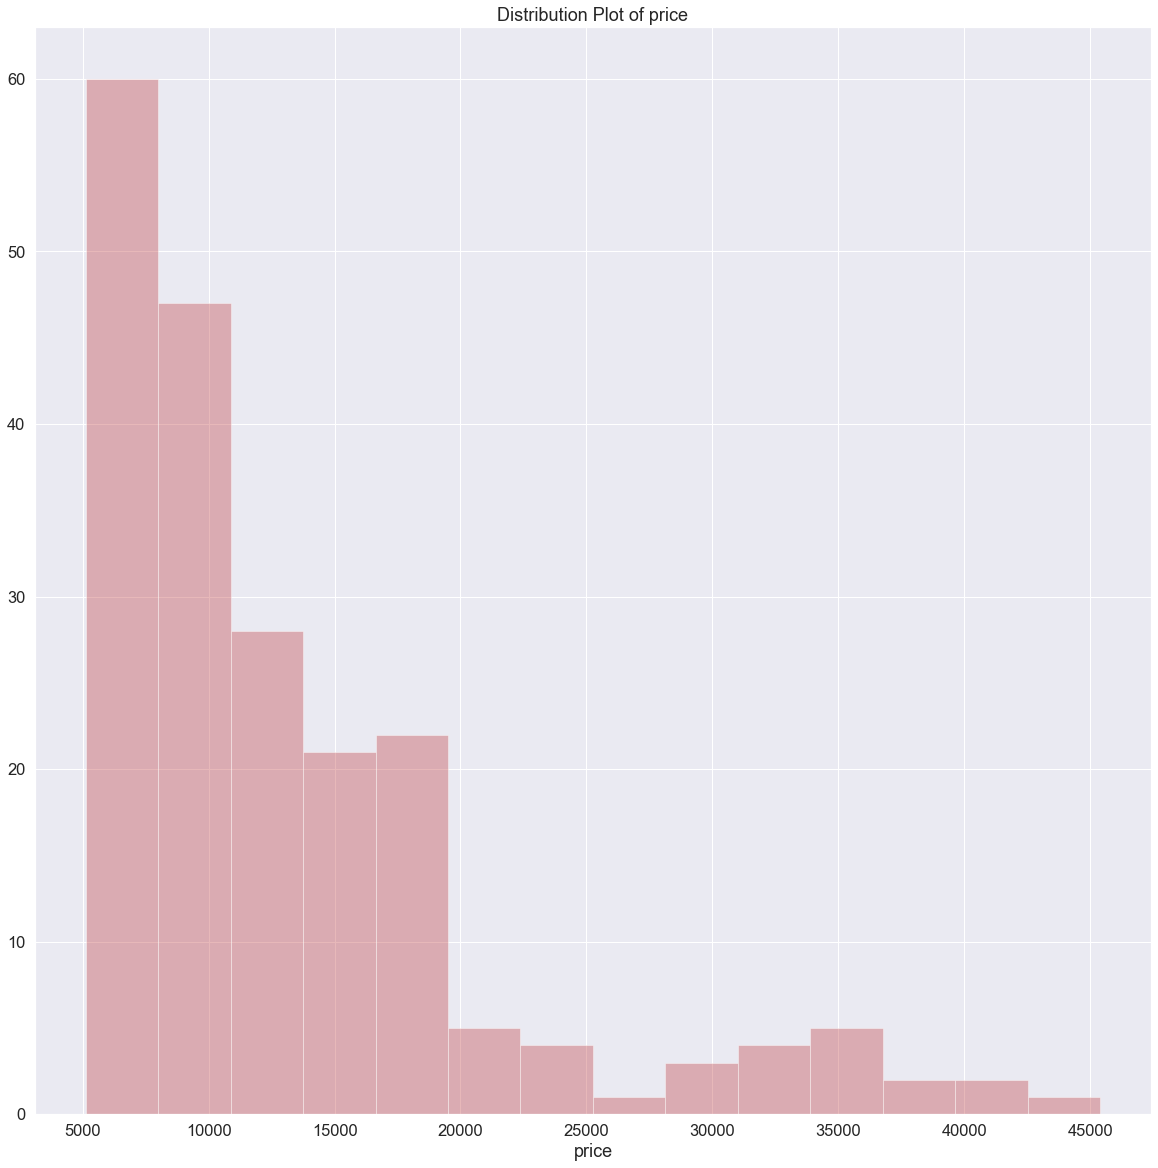

In [105]:
sns.distplot(df["price"] , kde=False , color="r")
plt.title("Distribution Plot of price")

Text(0.5, 1.0, 'Kde Plot of price')

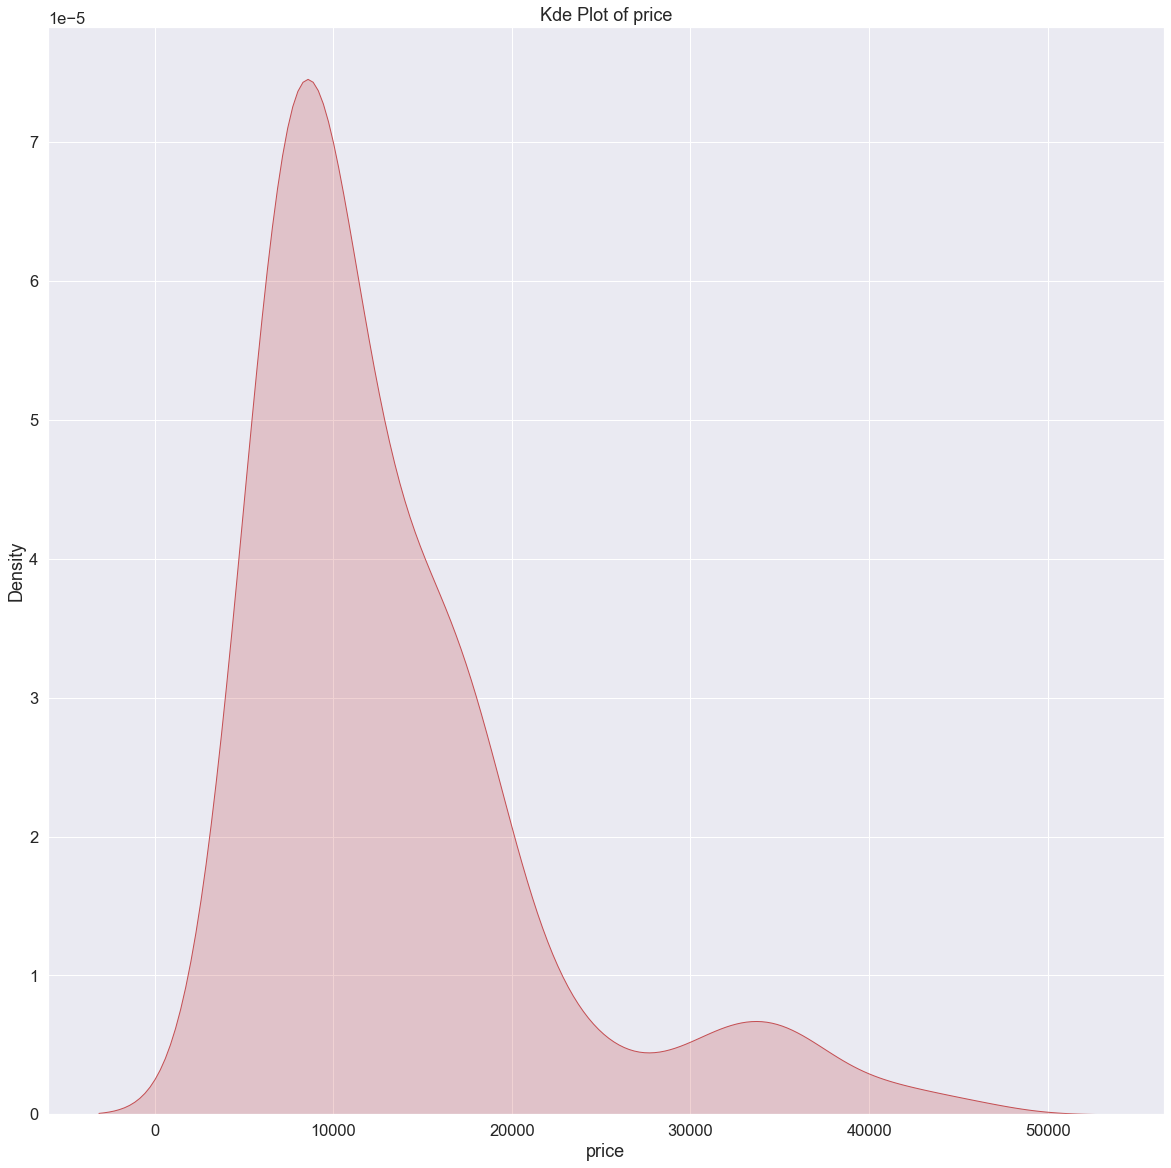

In [106]:
sns.kdeplot(df["price"] , shade=True , color="r")
plt.title("Kde Plot of price")

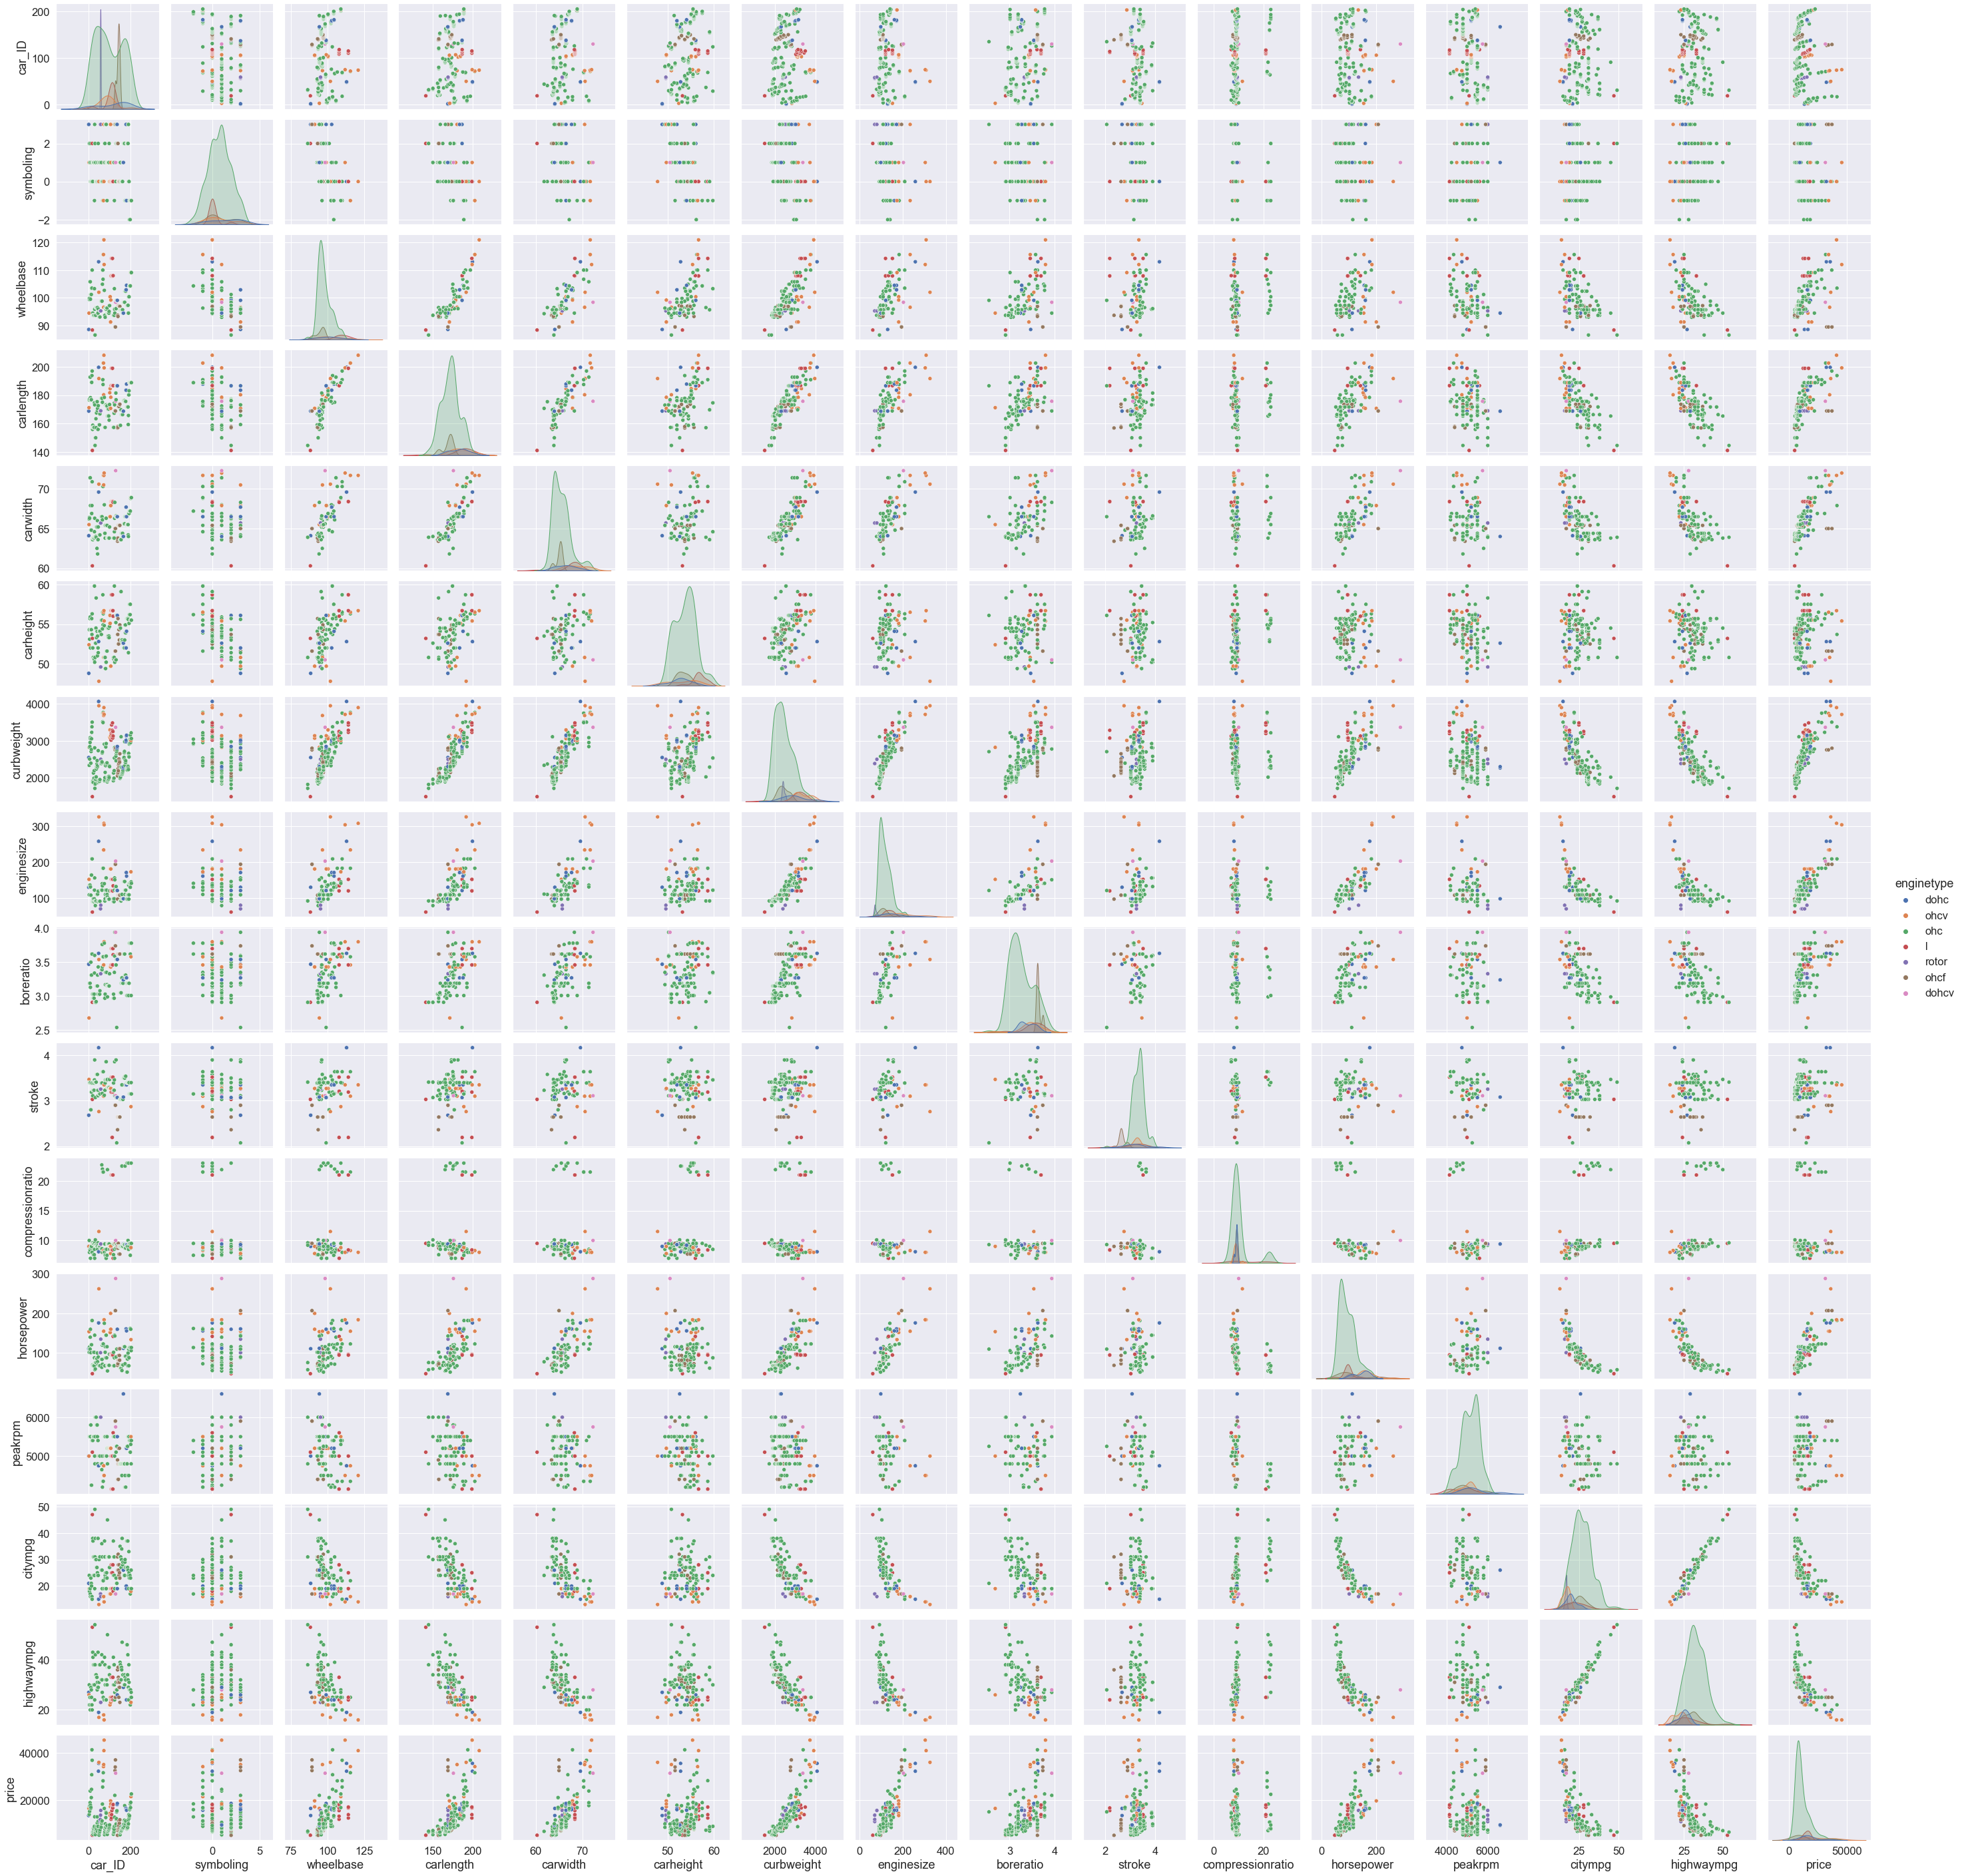

In [107]:
sns.set( rc = {"figure.figsize" : [20 , 10]} , font_scale=1.5)
sns.pairplot(df , hue = "enginetype"  )

In [108]:
df.head(2)

car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]

Text(0.5, 1.0, 'Smokers and non-smokers')

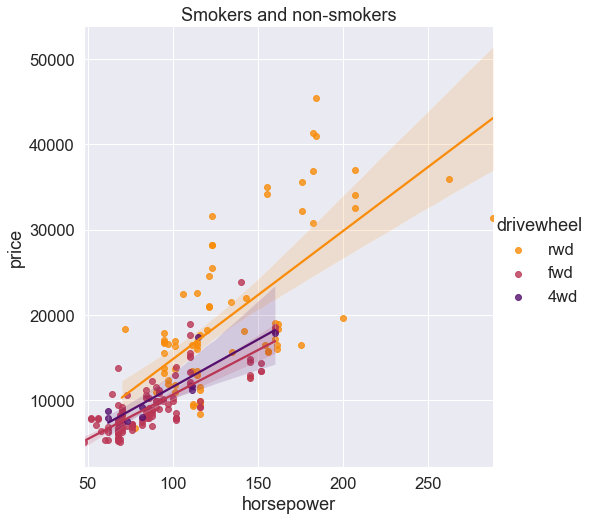

In [109]:
sns.lmplot(x="horsepower", y="price", hue="drivewheel", data=df, palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')

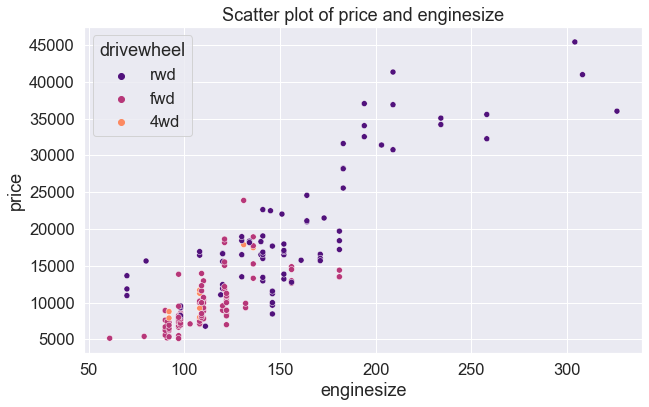

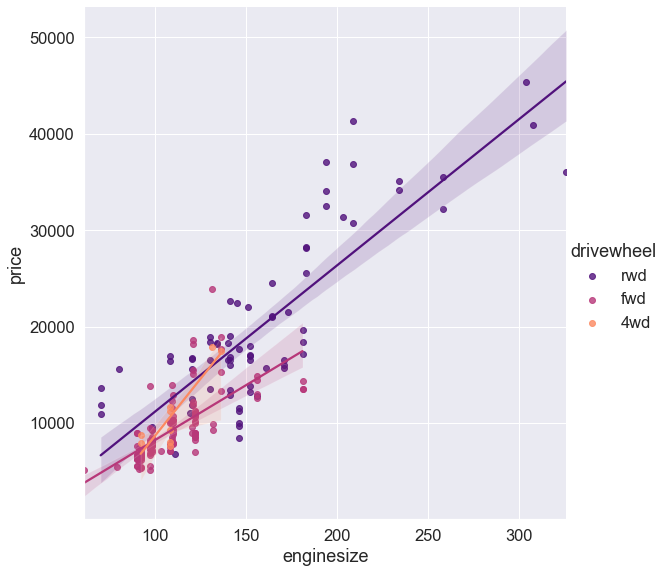

In [110]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='enginesize',y='price',data=df,palette='magma',hue='drivewheel')
ax.set_title('Scatter plot of price and enginesize')

sns.lmplot(x="enginesize", y="price", hue="drivewheel", data=df, palette = 'magma', size = 8)

In [111]:
df.head(2)

car_ID  symboling              CarName fueltype aspiration doornumber  \
0       1          3   alfa-romero giulia      gas        std        two   
1       2          3  alfa-romero stelvio      gas        std        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  

[2 rows x 26 columns]

Text(0.5, 1.0, 'Swarm Plot of symboling and price Based on doornumber ')

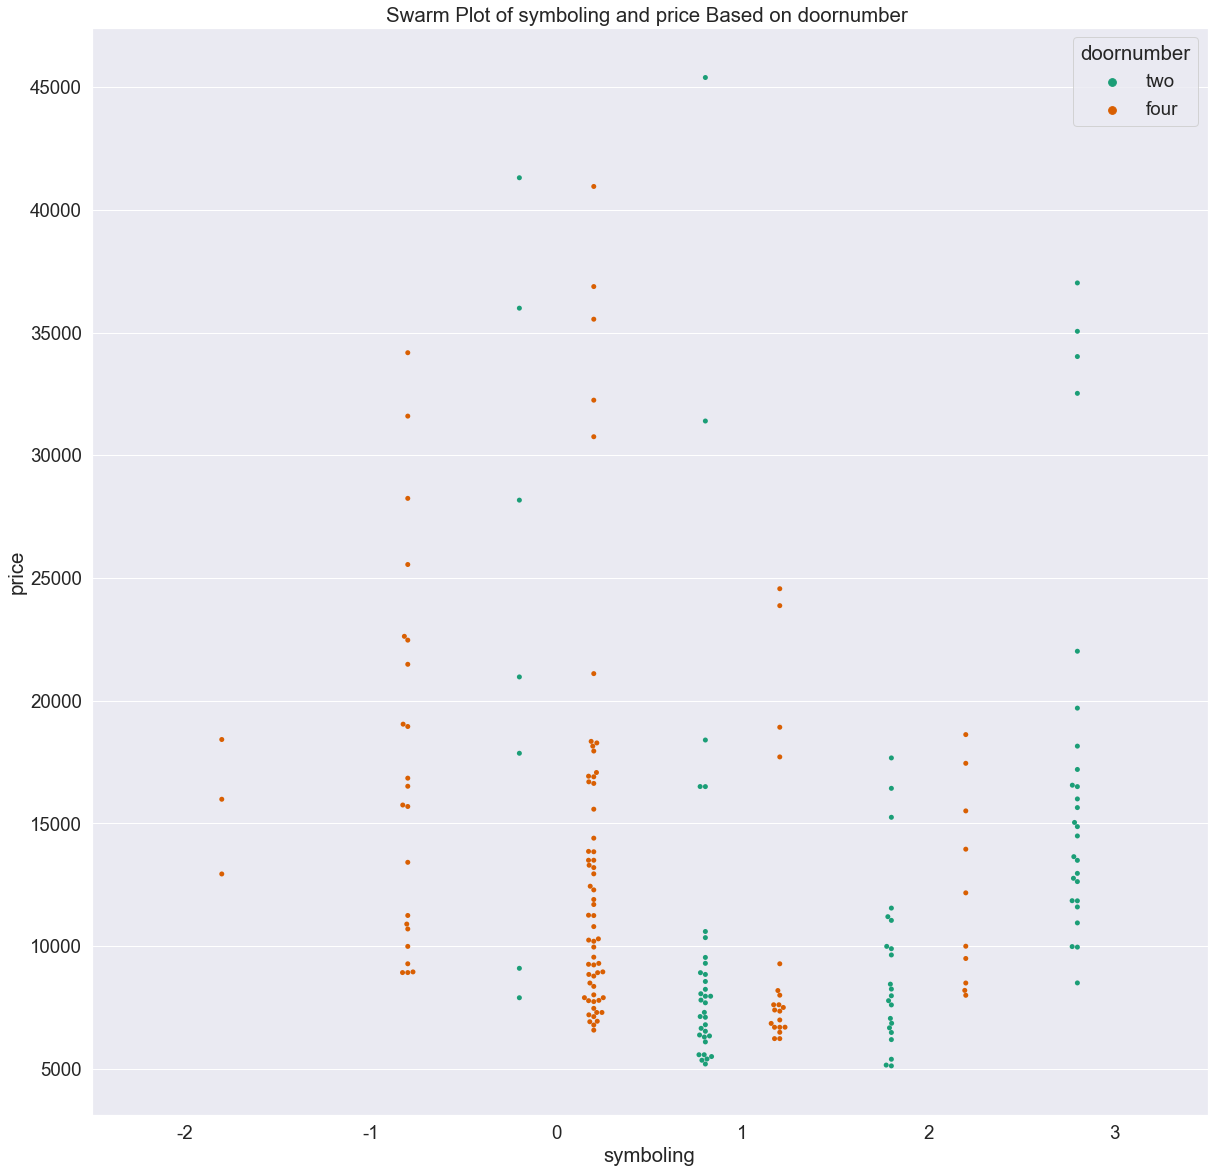

In [112]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "symboling" , y = "price" , data = df ,hue = "doornumber" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of symboling and price Based on doornumber ")

Text(0.5, 1.0, 'Swarm Plot of fueltype and price Based on fuelsystem ')

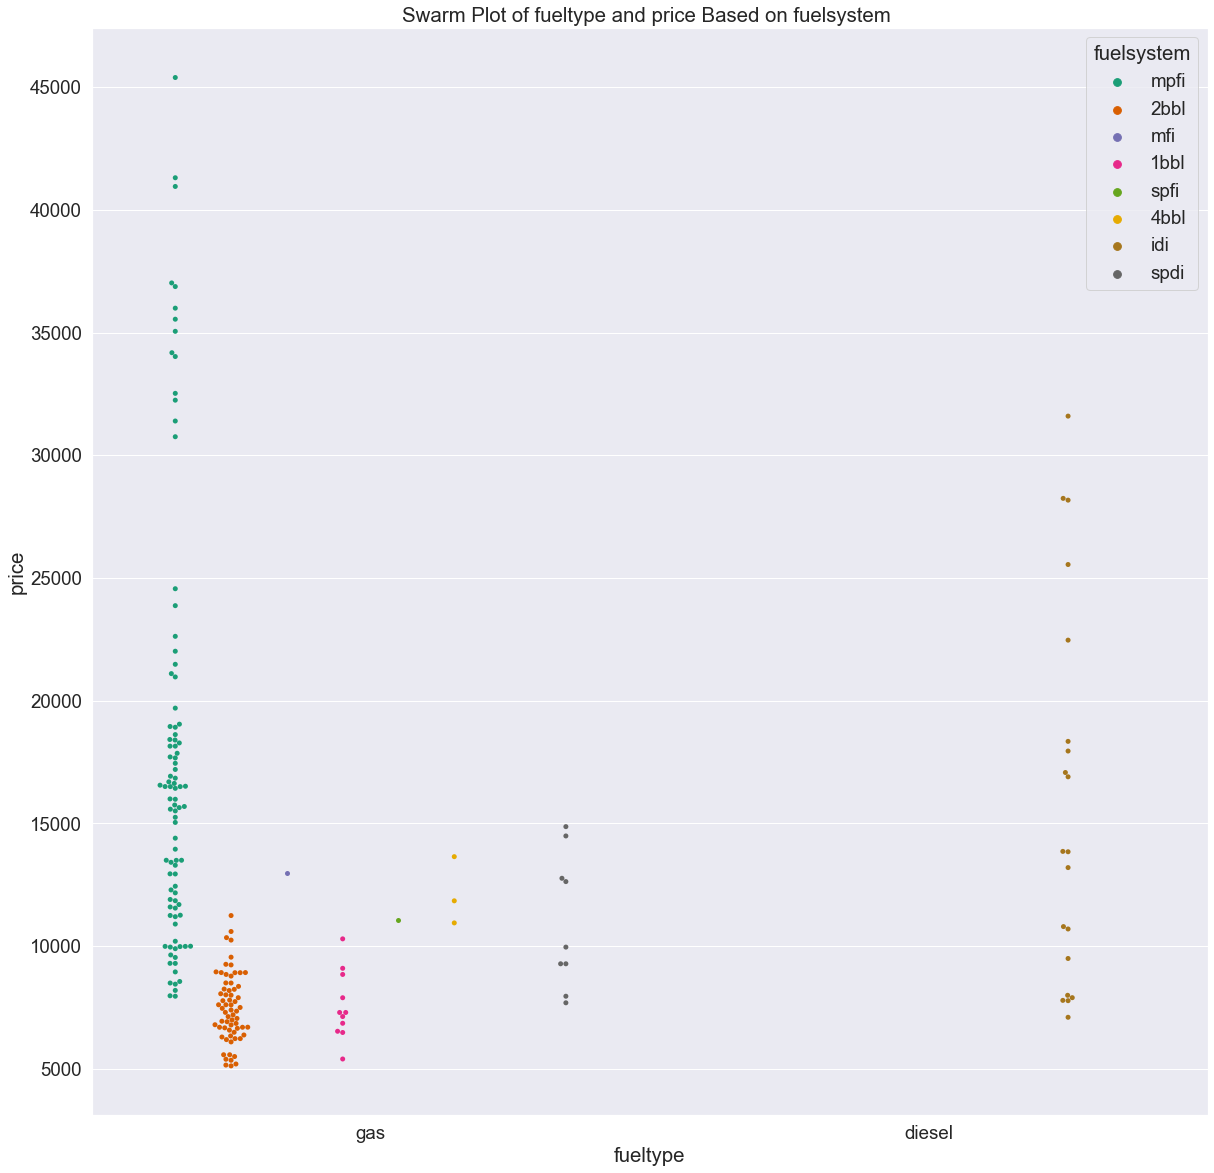

In [113]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "fueltype" , y = "price" , data = df ,hue = "fuelsystem" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of fueltype and price Based on fuelsystem ")

Text(0.5, 1.0, 'Swarm Plot of carbody and price Based on enginelocation ')

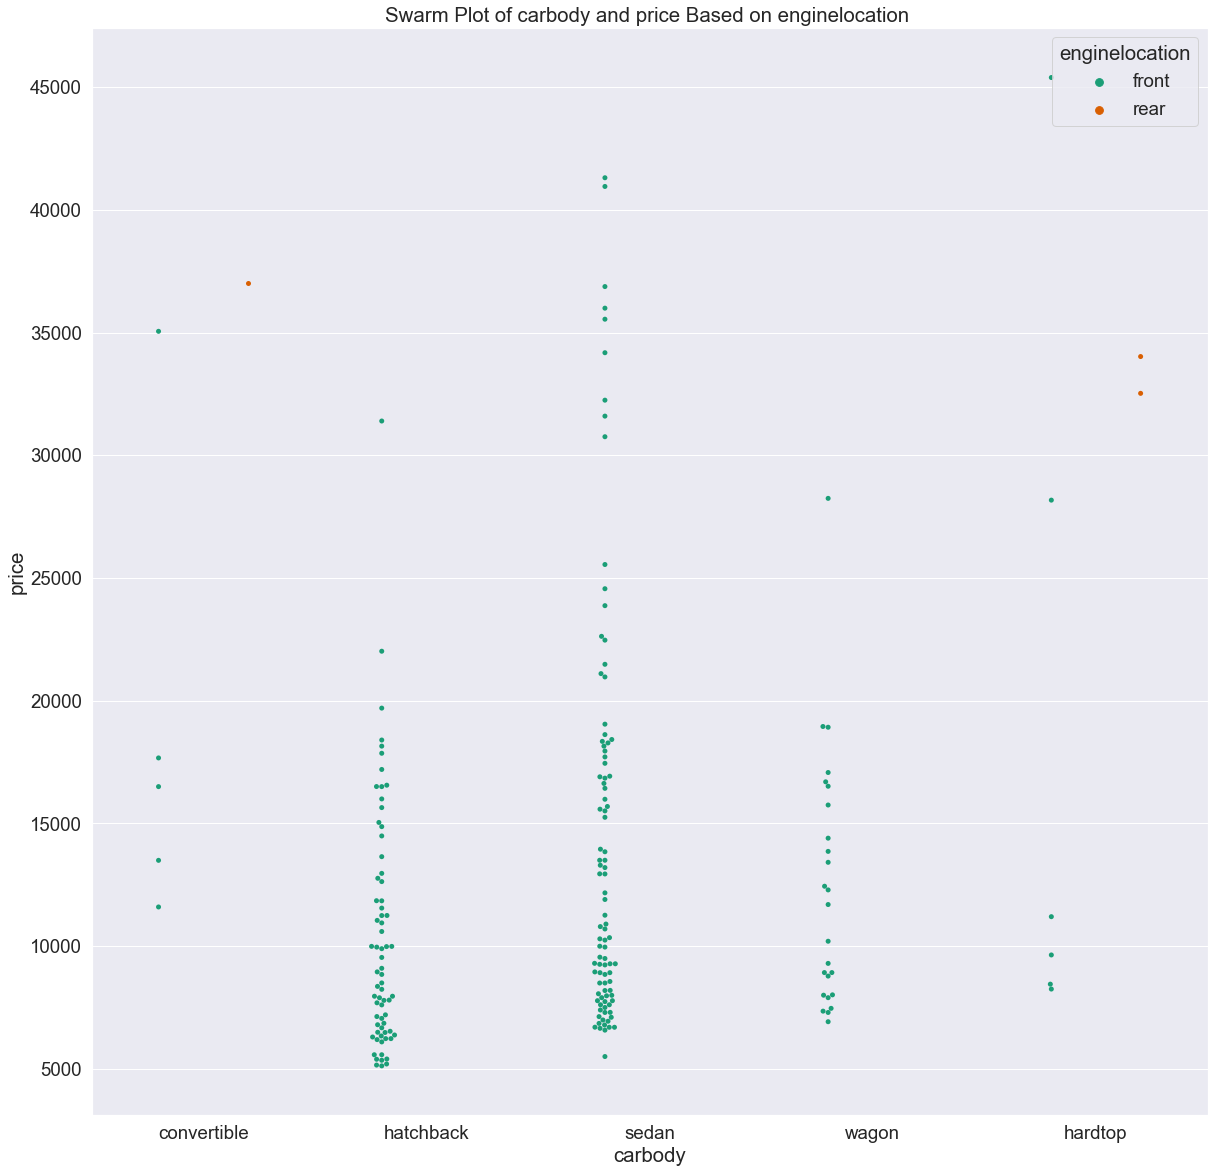

In [114]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "carbody" , y = "price" , data = df ,hue = "enginelocation" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of carbody and price Based on enginelocation ")

Text(0.5, 1.0, 'Swarm Plot of drivewheel and price Based on smodoornumberker ')

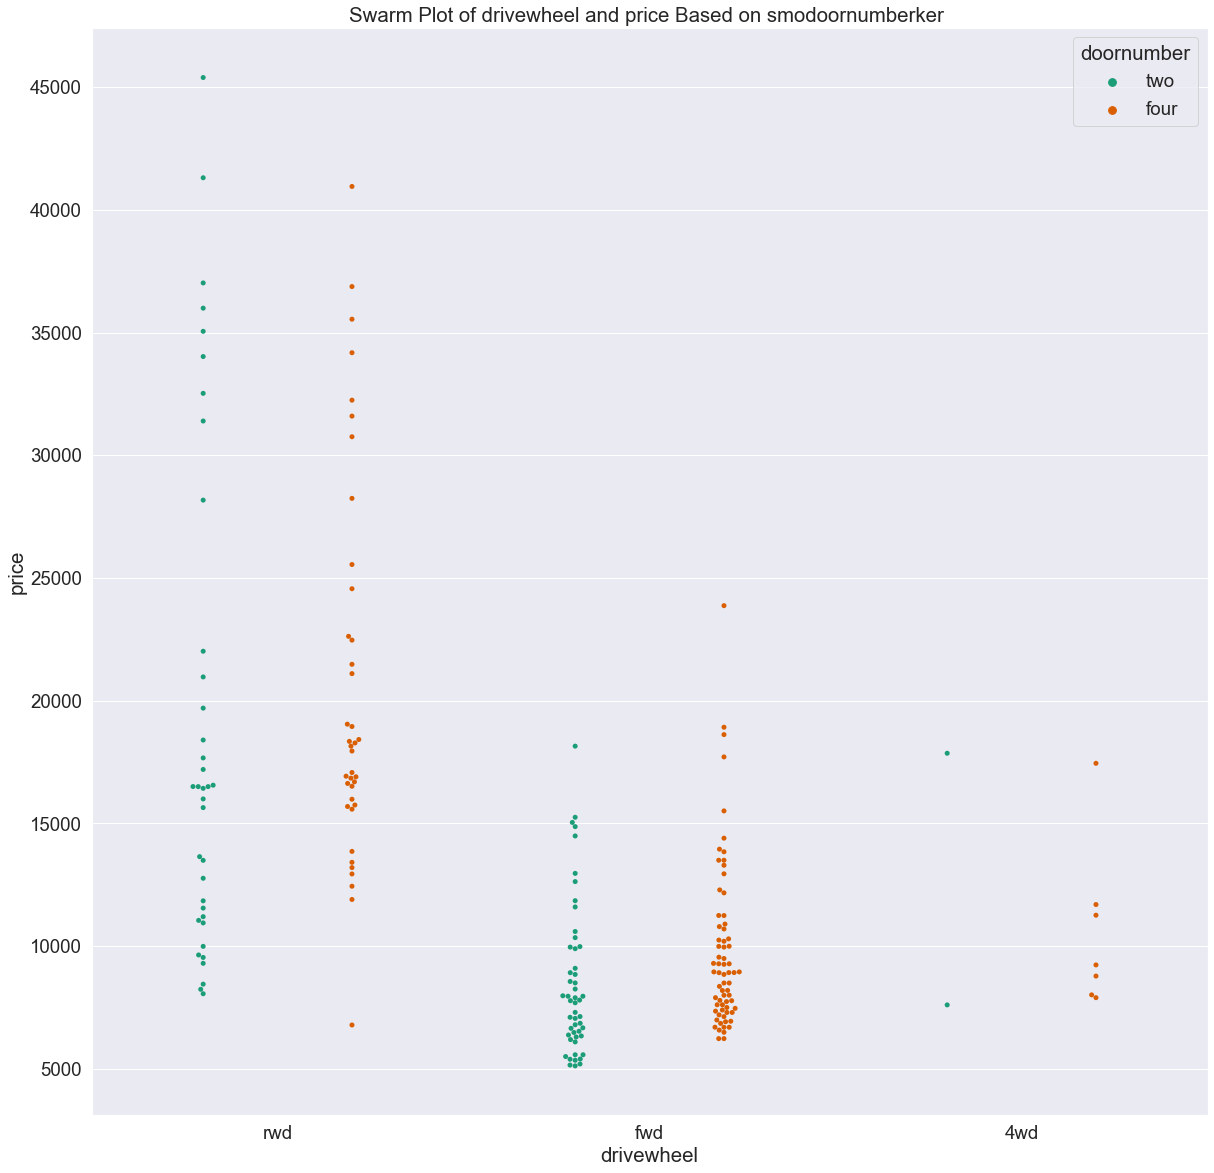

In [115]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "drivewheel" , y = "price" , data = df ,hue = "doornumber" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of drivewheel and price Based on smodoornumberker ")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Swarm Plot of aspiration and price Based on enginetype ')

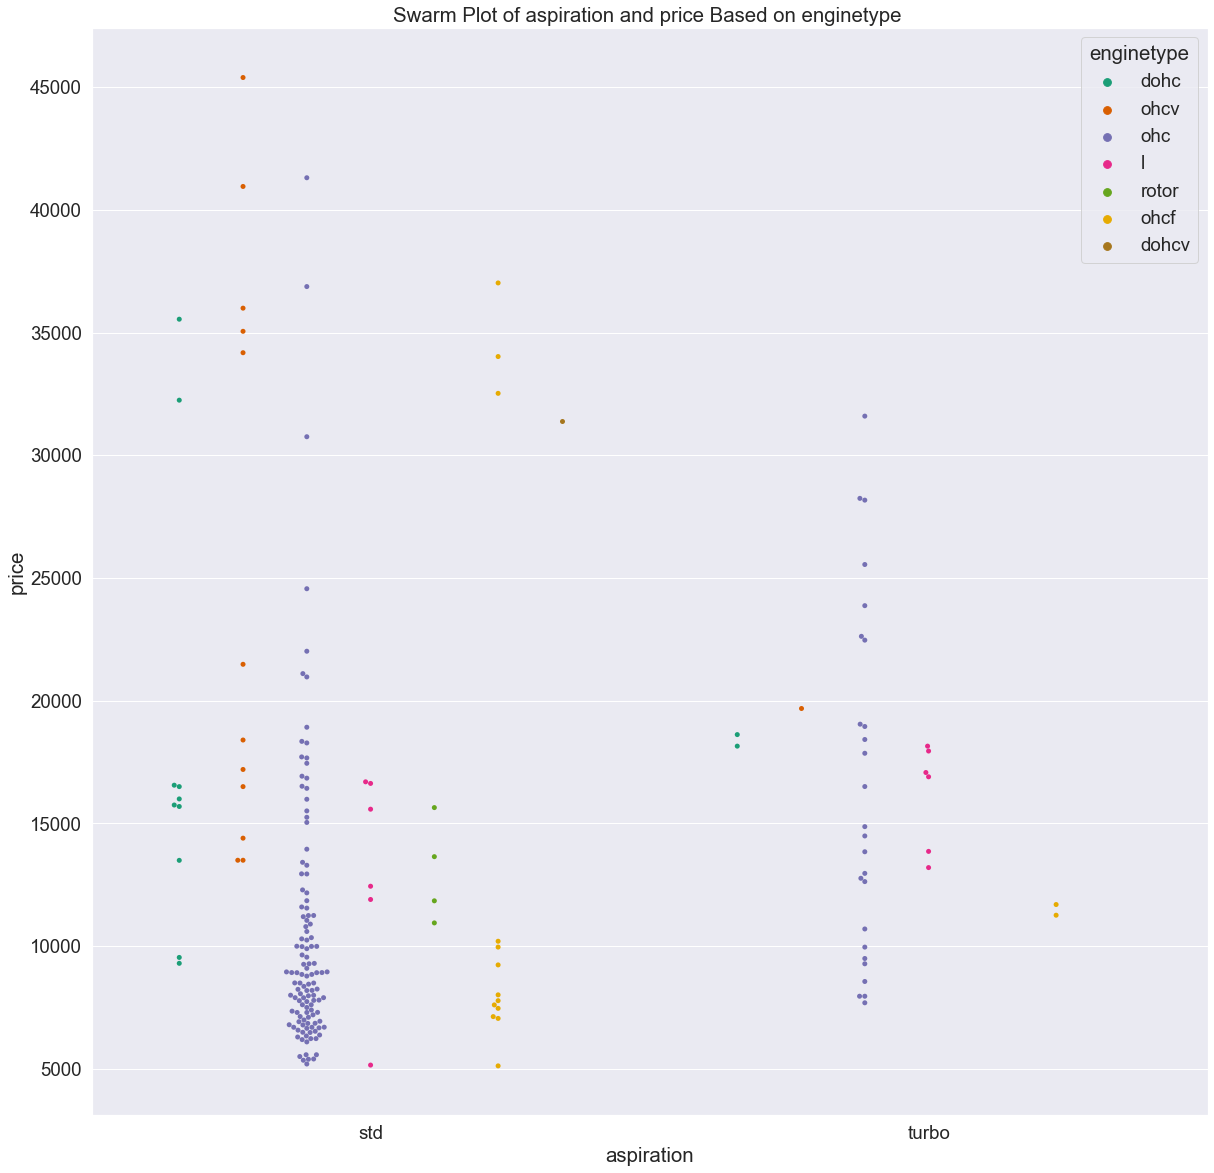

In [117]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "aspiration" , y = "price" , data = df ,hue = "enginetype" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of aspiration and price Based on enginetype ")

Text(0.5, 1.0, 'Swarm Plot of sex and price Based on fuelsystem ')

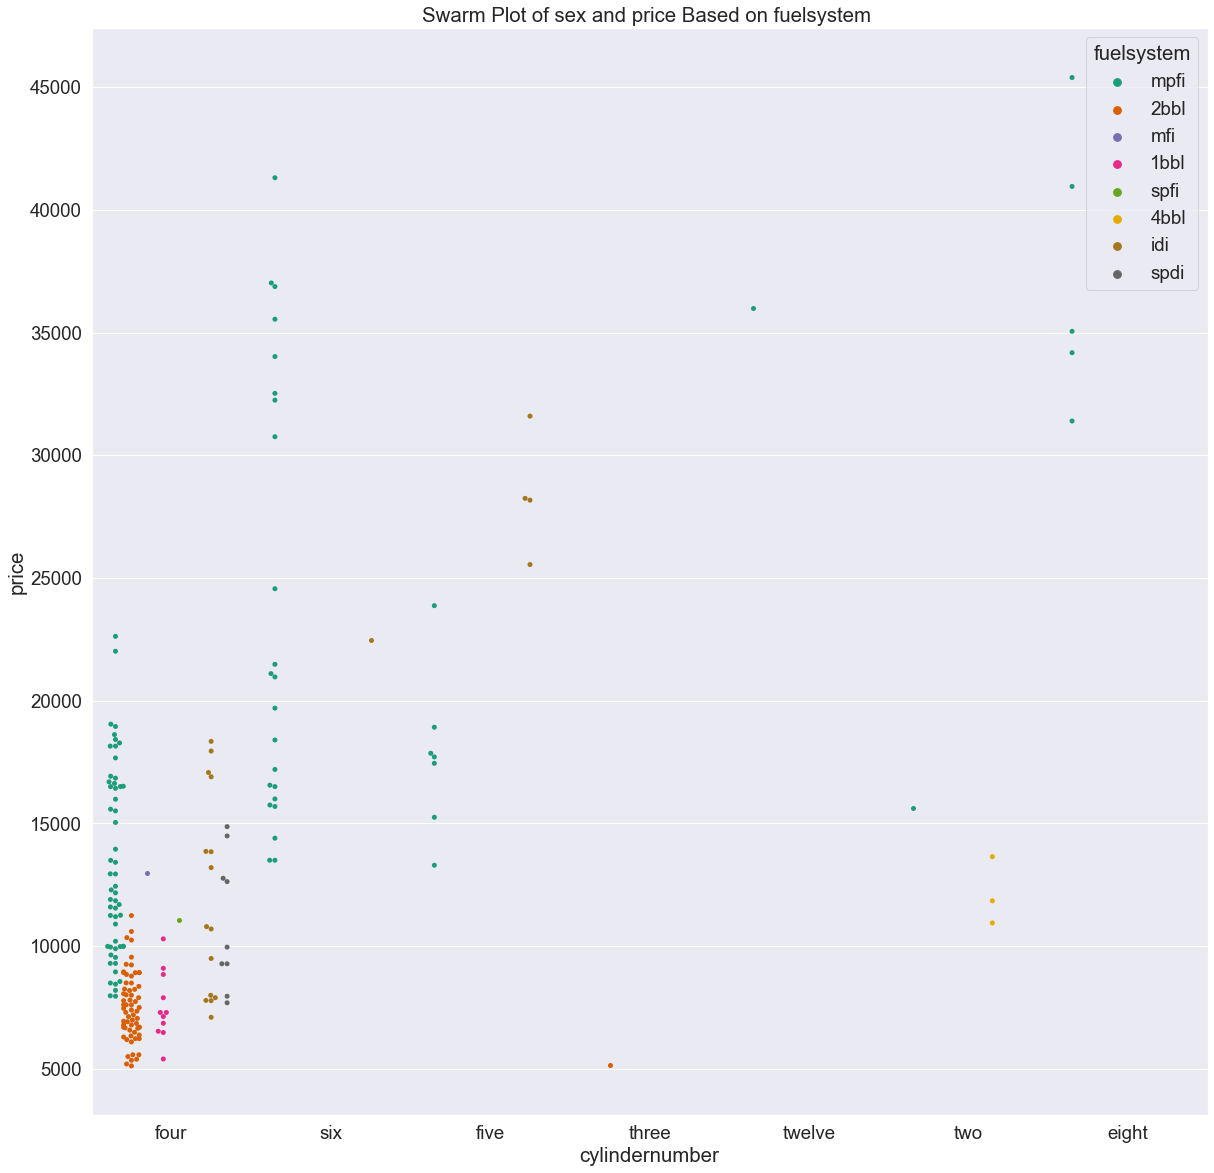

In [118]:
sns.set( rc = {"figure.figsize" : [20 , 20]} , font_scale=1.7)
sns.swarmplot( x = "cylindernumber" , y = "price" , data = df ,hue = "fuelsystem" ,  palette="Dark2" , dodge=True)
plt.title("Swarm Plot of sex and price Based on fuelsystem ")

In [119]:
df.info(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Box Plot of carbody and price Based on enginetype ')

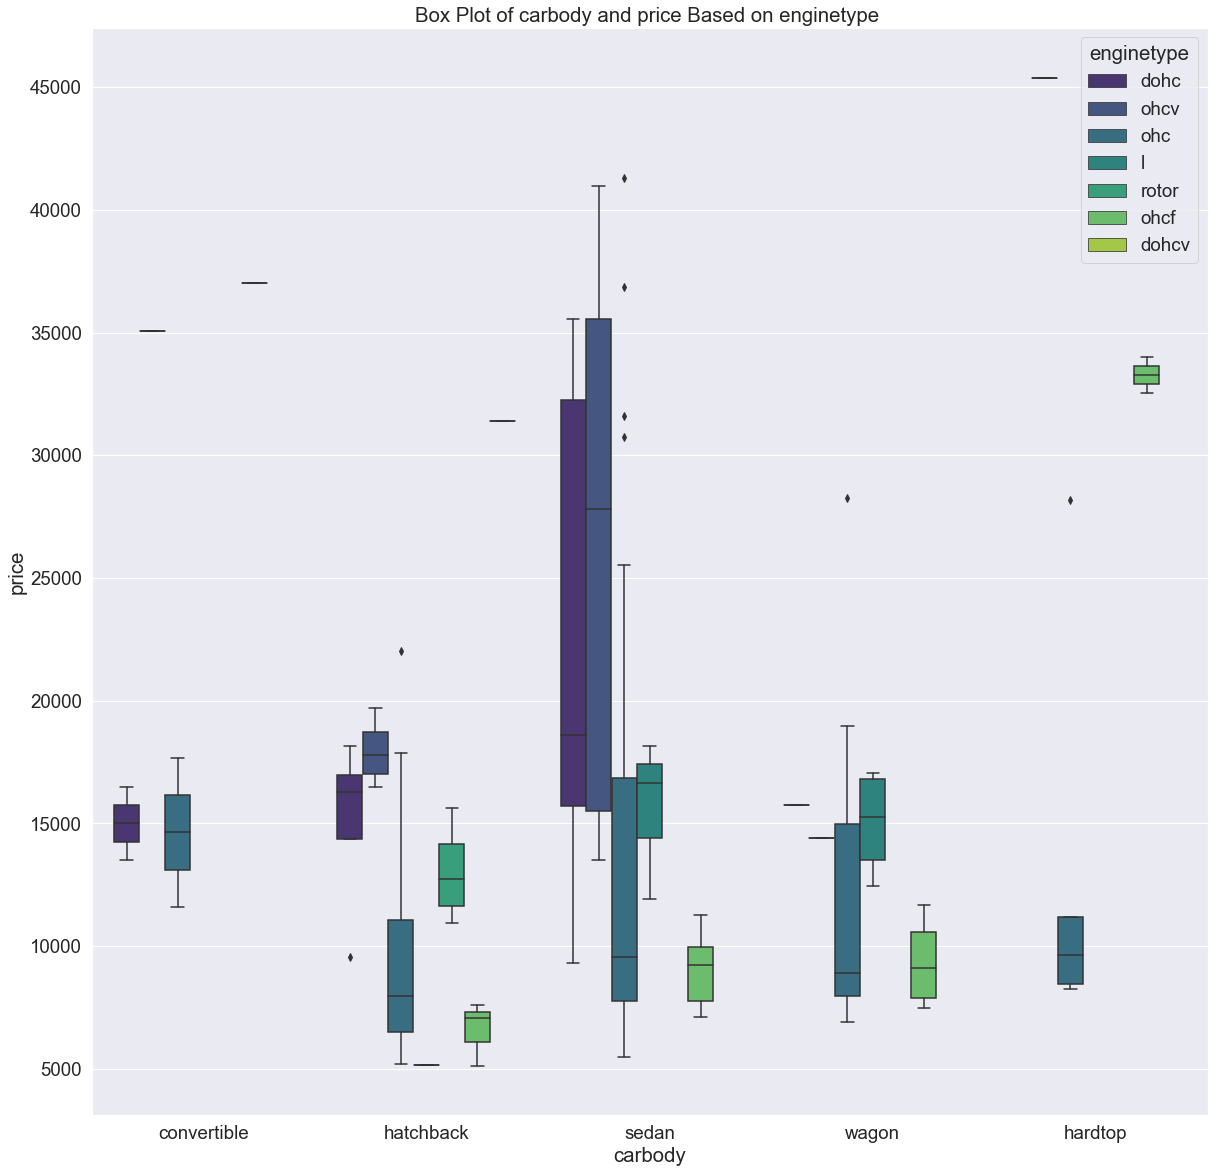

In [120]:
sns.boxplot( x = "carbody" , y = "price" , data = df ,hue = "enginetype" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of carbody and price Based on enginetype ")

Text(0.5, 1.0, 'Box Plot of fuelsystem and price Based on enginetype ')

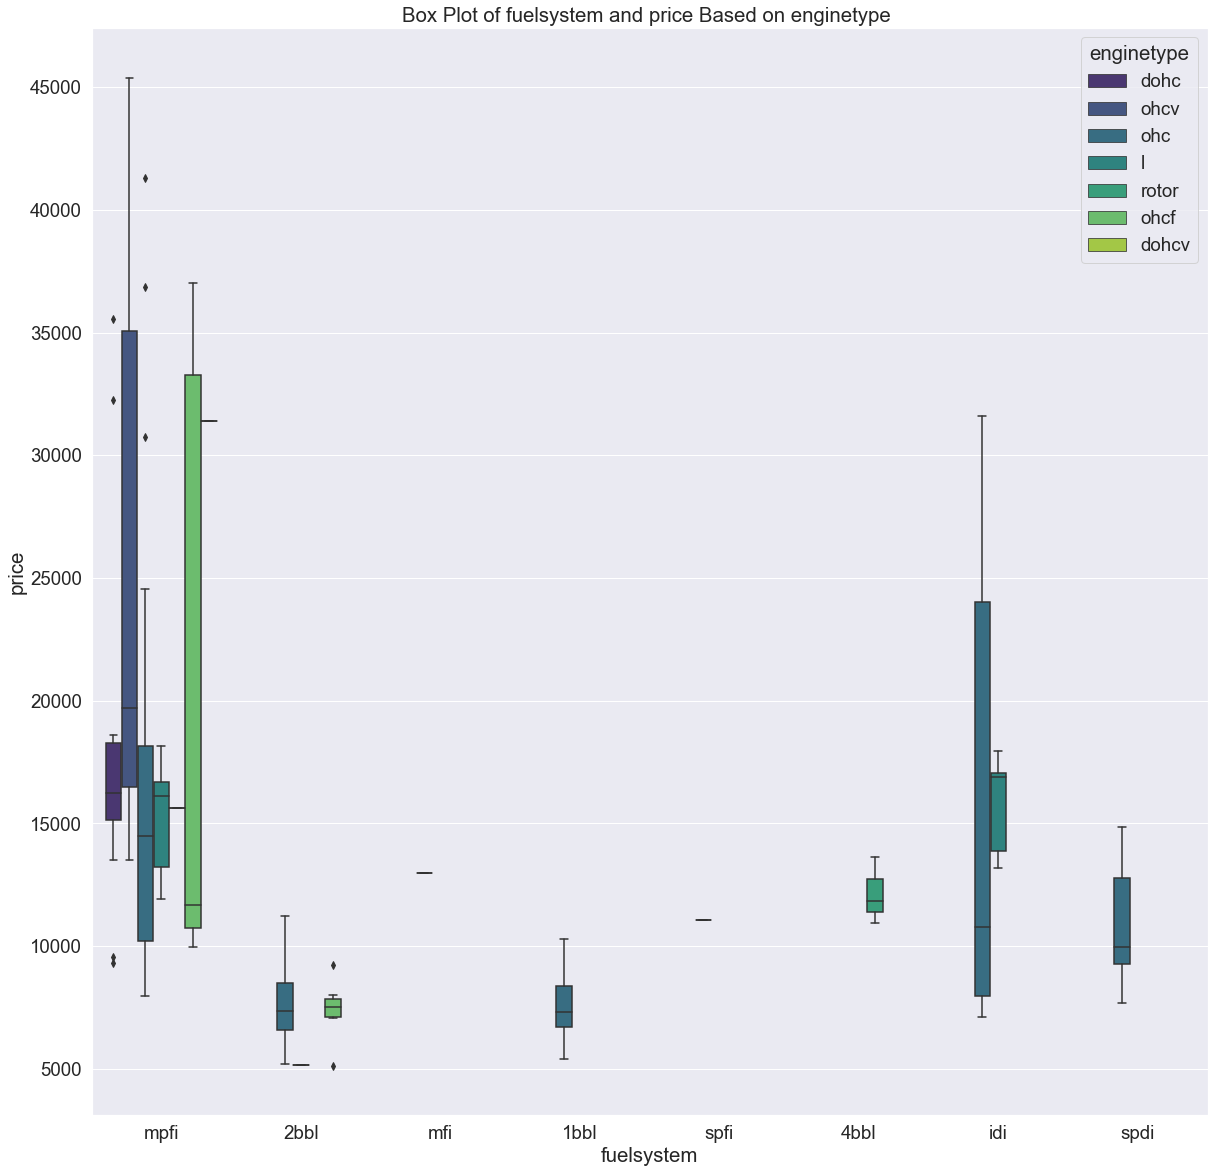

In [121]:
sns.boxplot( x = "fuelsystem" , y = "price" , data = df ,hue = "enginetype" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of fuelsystem and price Based on enginetype ")

Text(0.5, 1.0, 'Box Plot of drivewheel and price Based on enginetype ')

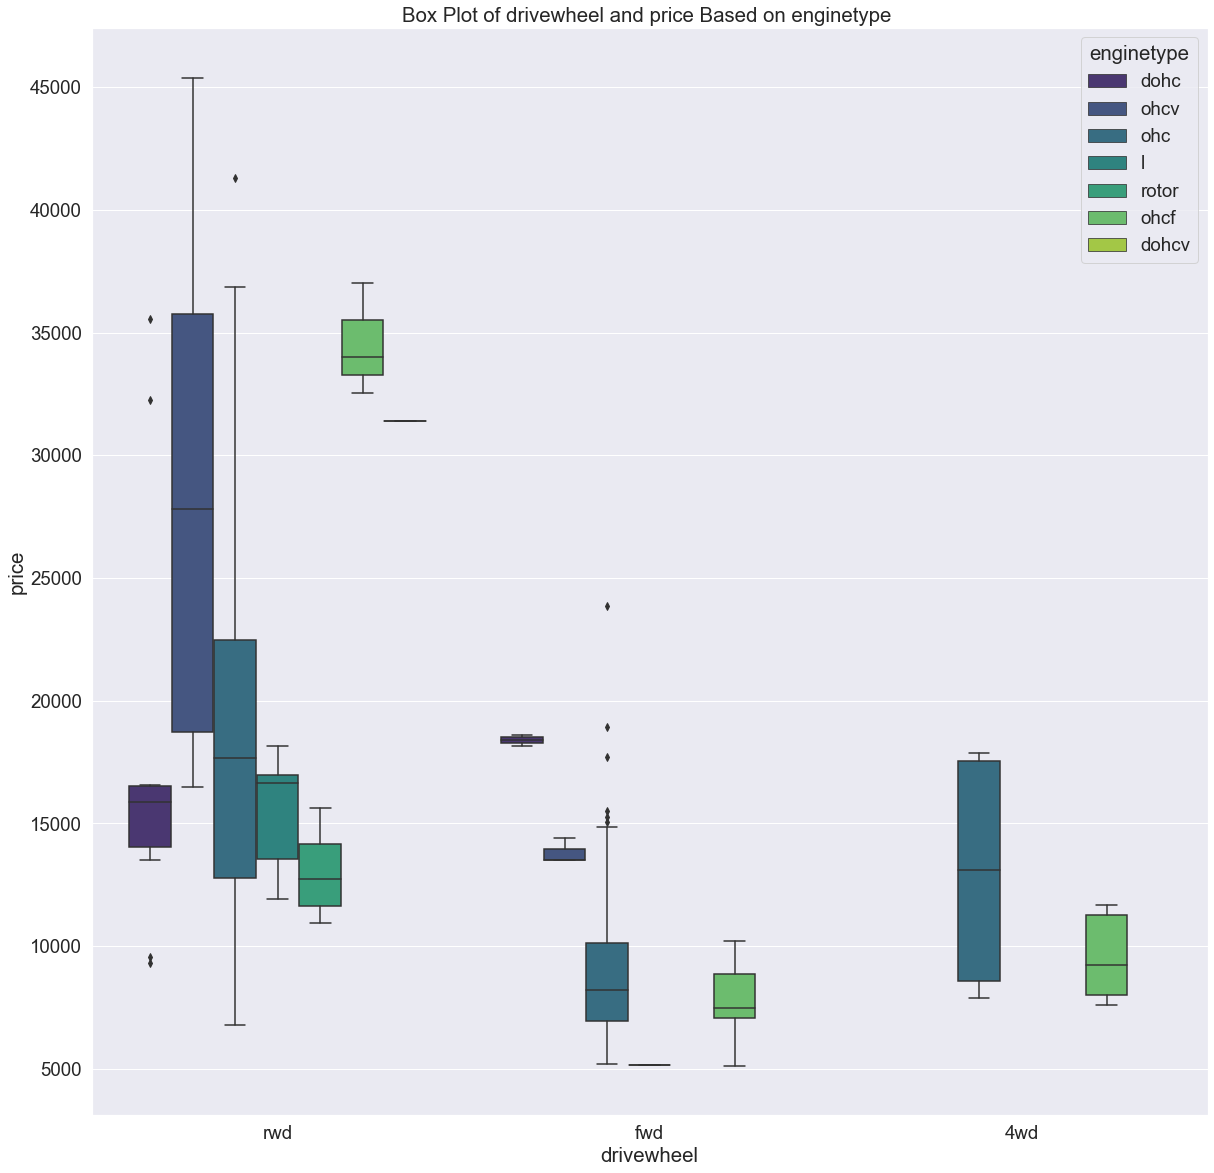

In [122]:
sns.boxplot( x = "drivewheel" , y = "price" , data = df ,hue = "enginetype" ,  palette="viridis" , dodge=True)
plt.title("Box Plot of drivewheel and price Based on enginetype ")

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Text(0.5, 1.0, 'Count Plot of fueltype ')

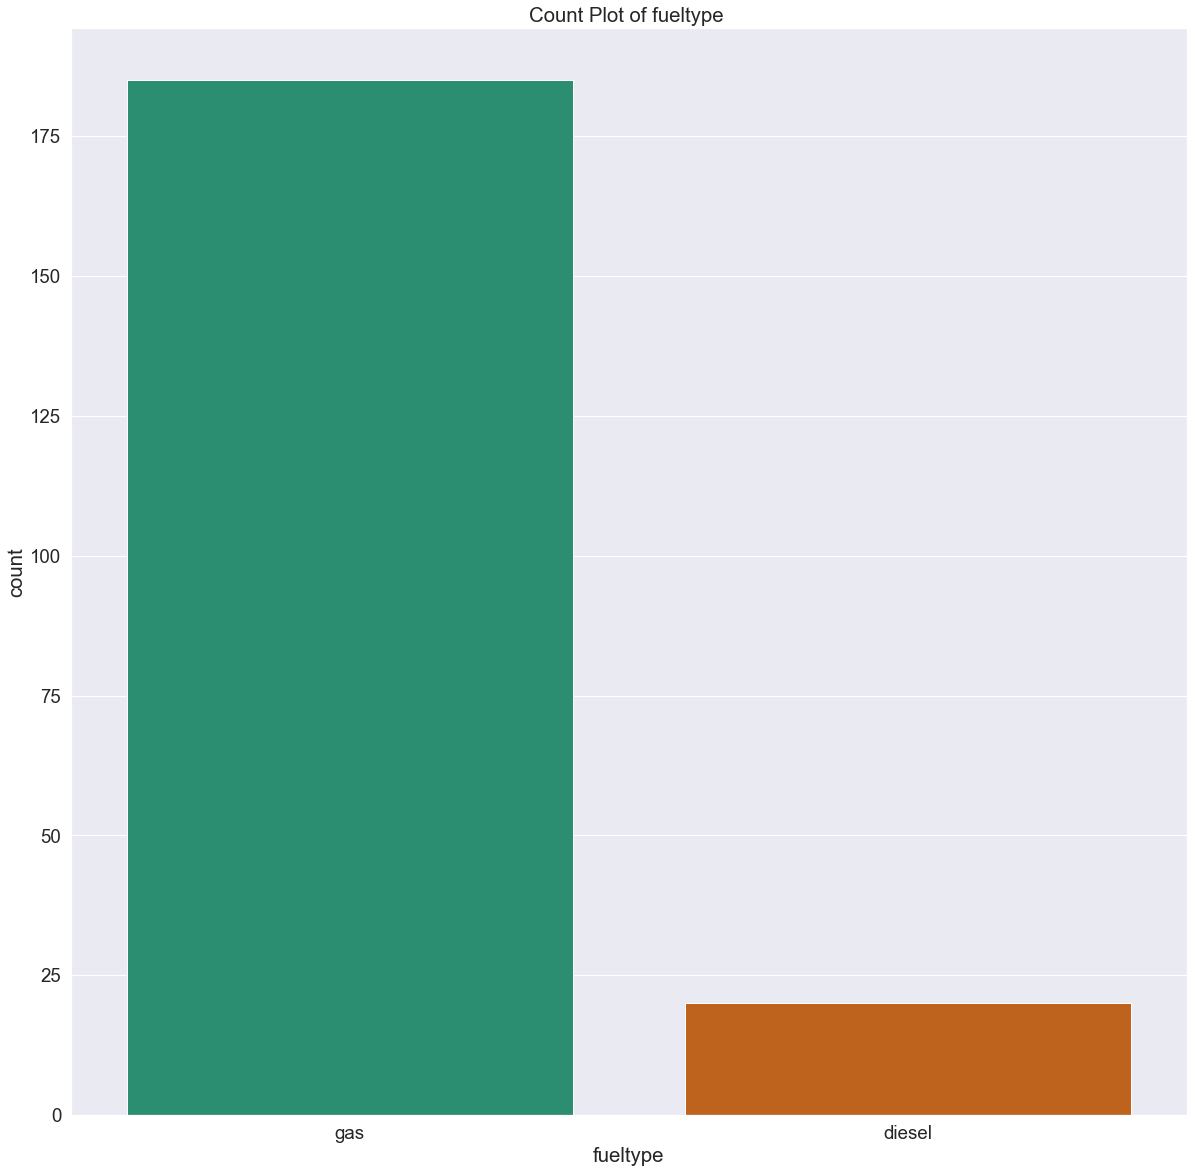

In [124]:
sns.countplot( x = "fueltype"  , data = df , palette="Dark2")
plt.title("Count Plot of fueltype ")


Text(0.5, 1.0, 'Count Plot of aspiration ')

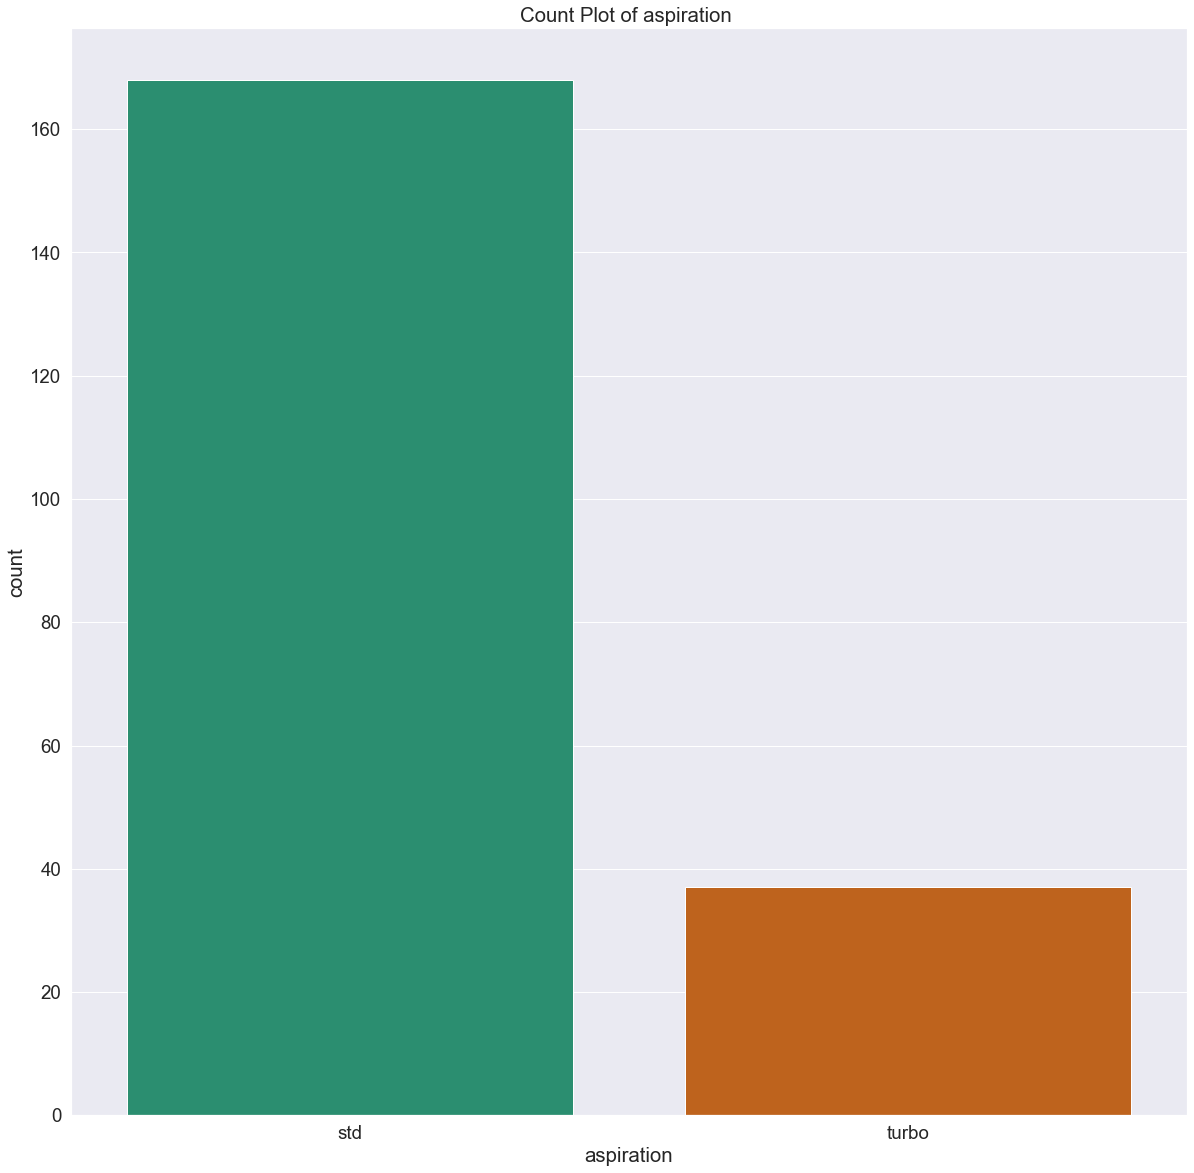

In [125]:
sns.countplot( x = "aspiration"  , data = df , palette="Dark2")
plt.title("Count Plot of aspiration ")


Text(0.5, 1.0, 'Count Plot of doornumber ')

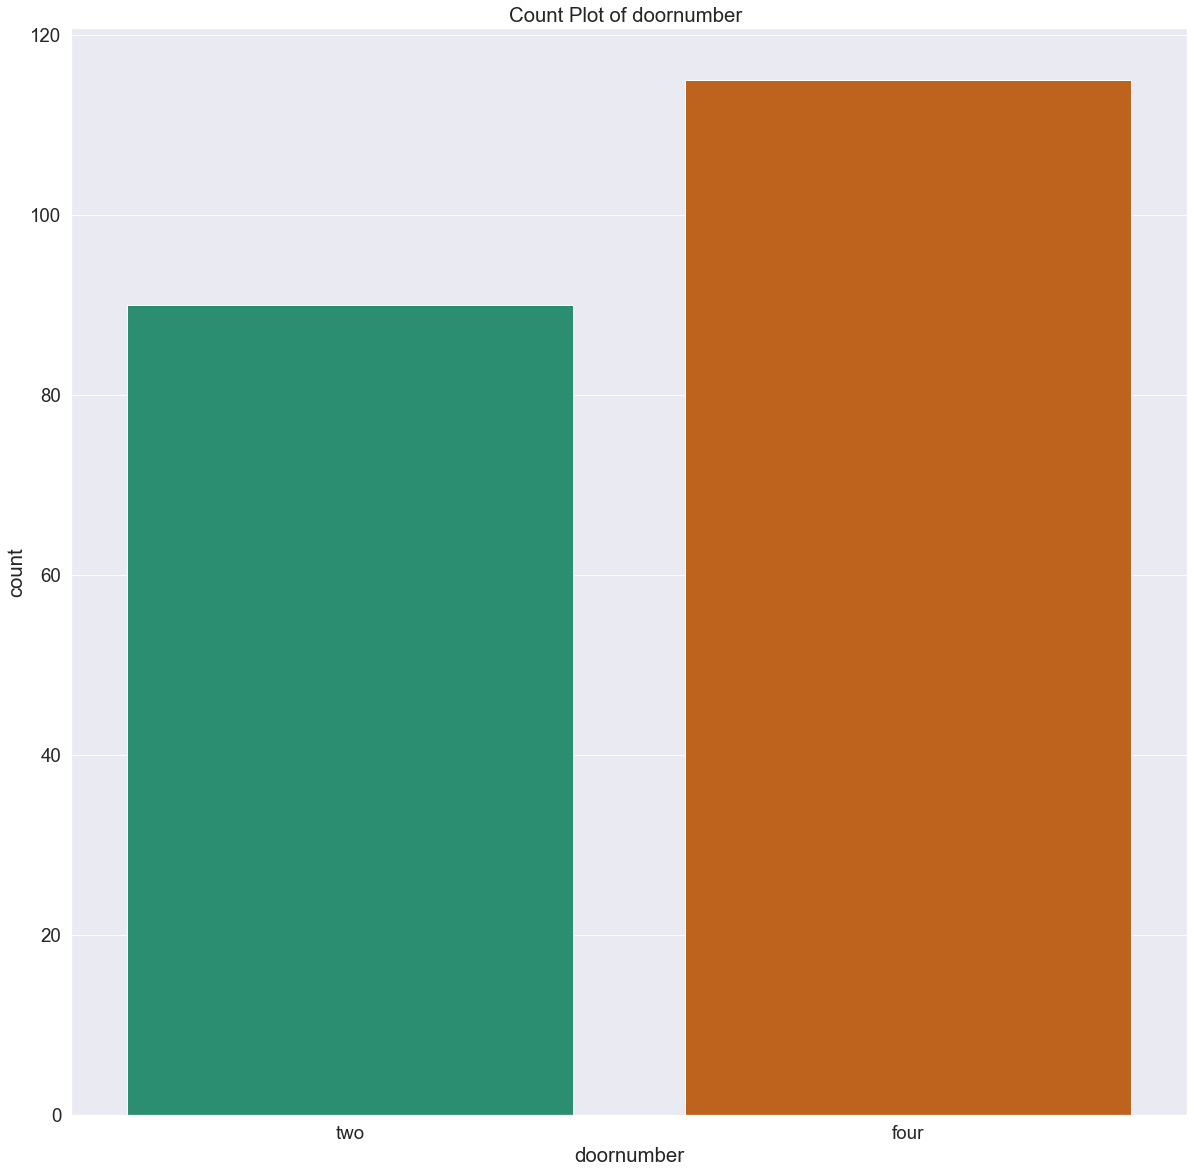

In [126]:
sns.countplot( x = "doornumber"  , data = df , palette="Dark2")
plt.title("Count Plot of doornumber ")


Text(0.5, 1.0, 'Count Plot of carbody ')

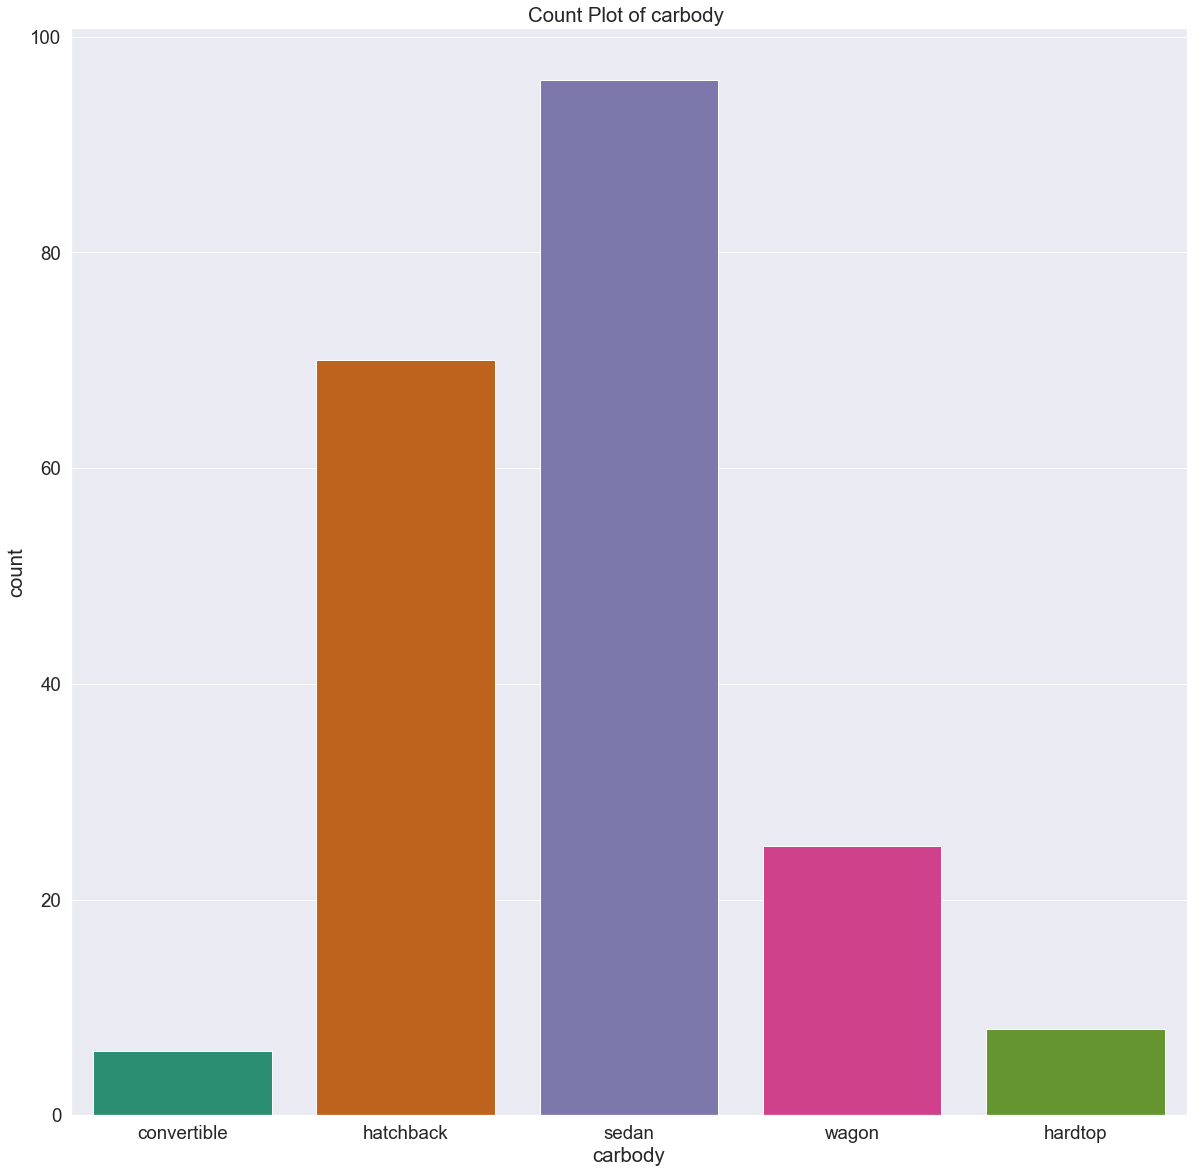

In [127]:
sns.countplot( x = "carbody"  , data = df , palette="Dark2")
plt.title("Count Plot of carbody ")


Text(0.5, 1.0, 'Count Plot of drivewheel ')

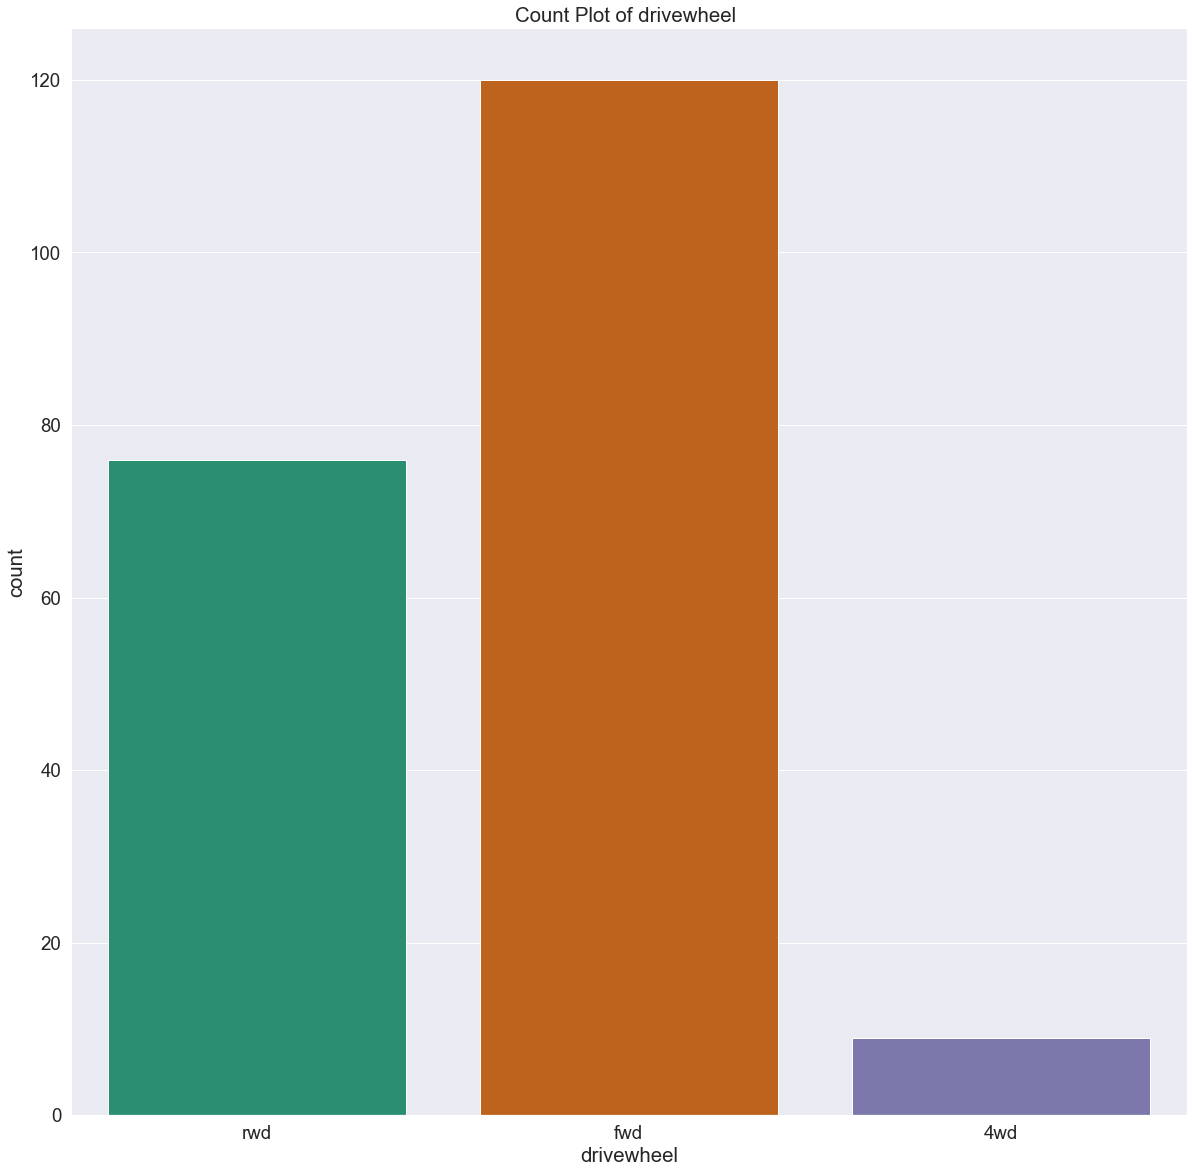

In [128]:
sns.countplot( x = "drivewheel"  , data = df , palette="Dark2")
plt.title("Count Plot of drivewheel ")


Text(0.5, 1.0, 'Count Plot of enginelocation ')

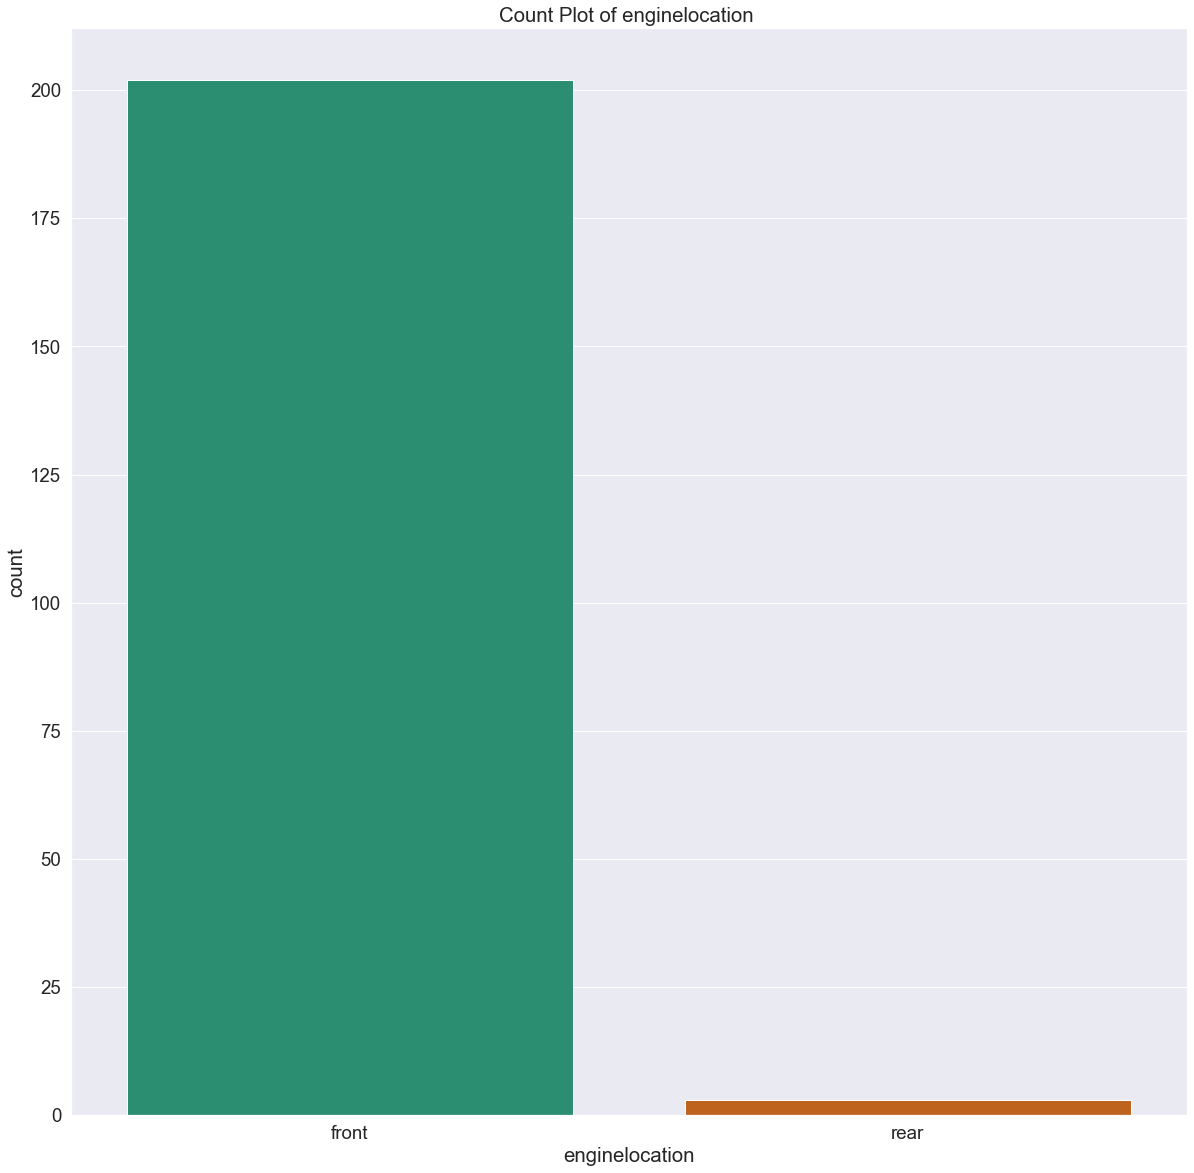

In [129]:
sns.countplot( x = "enginelocation"  , data = df , palette="Dark2")
plt.title("Count Plot of enginelocation ")


Text(0.5, 1.0, 'Count Plot of enginetype ')

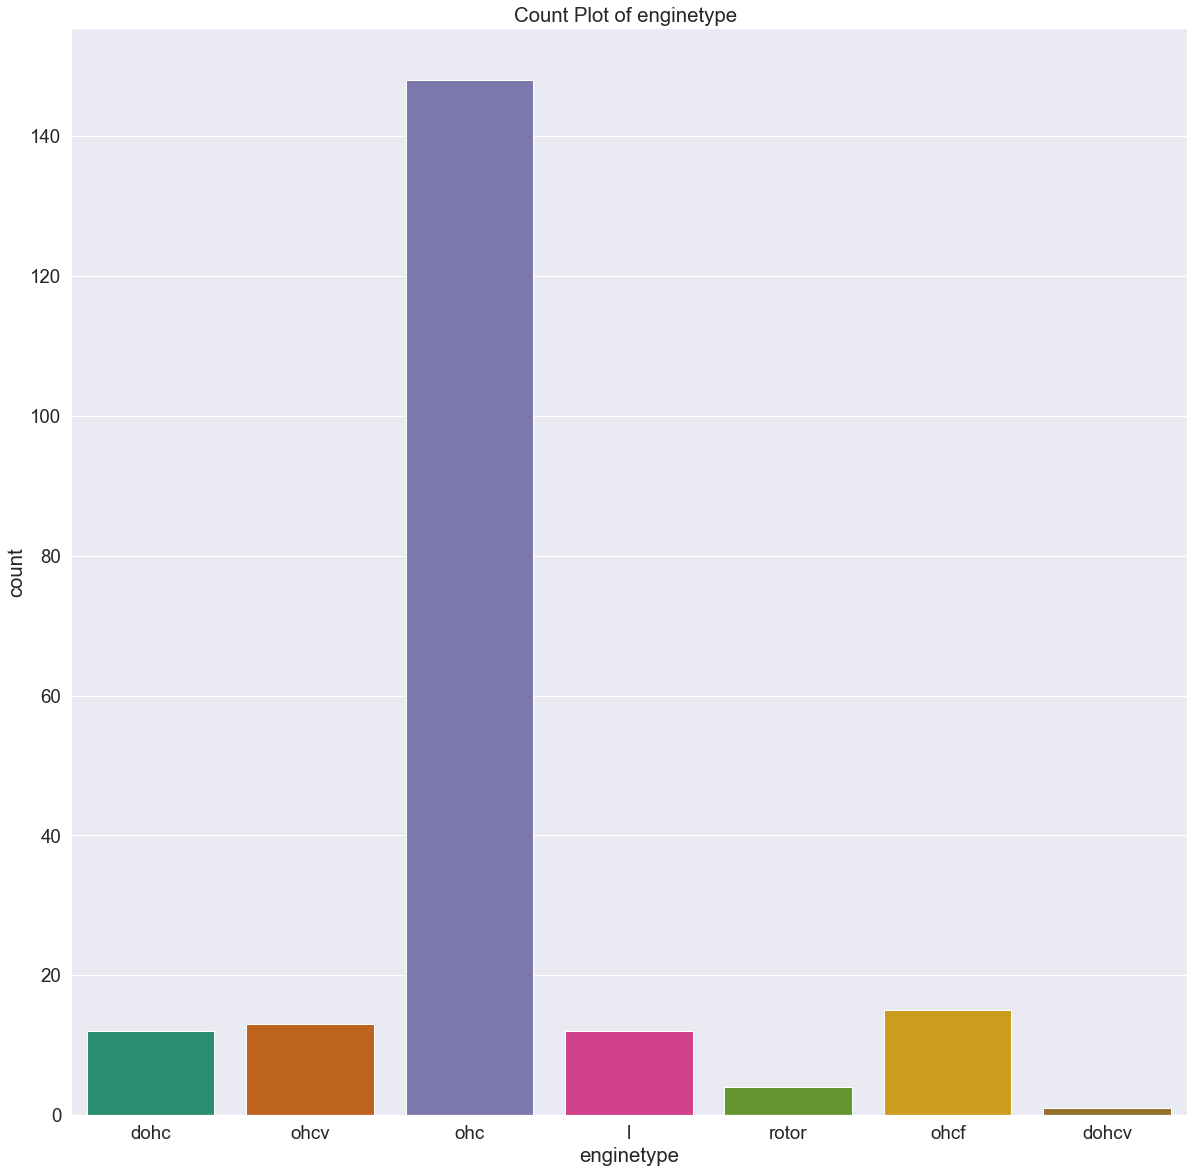

In [130]:
sns.countplot( x = "enginetype"  , data = df , palette="Dark2")
plt.title("Count Plot of enginetype ")


Text(0.5, 1.0, 'Count Plot of fuelsystem ')

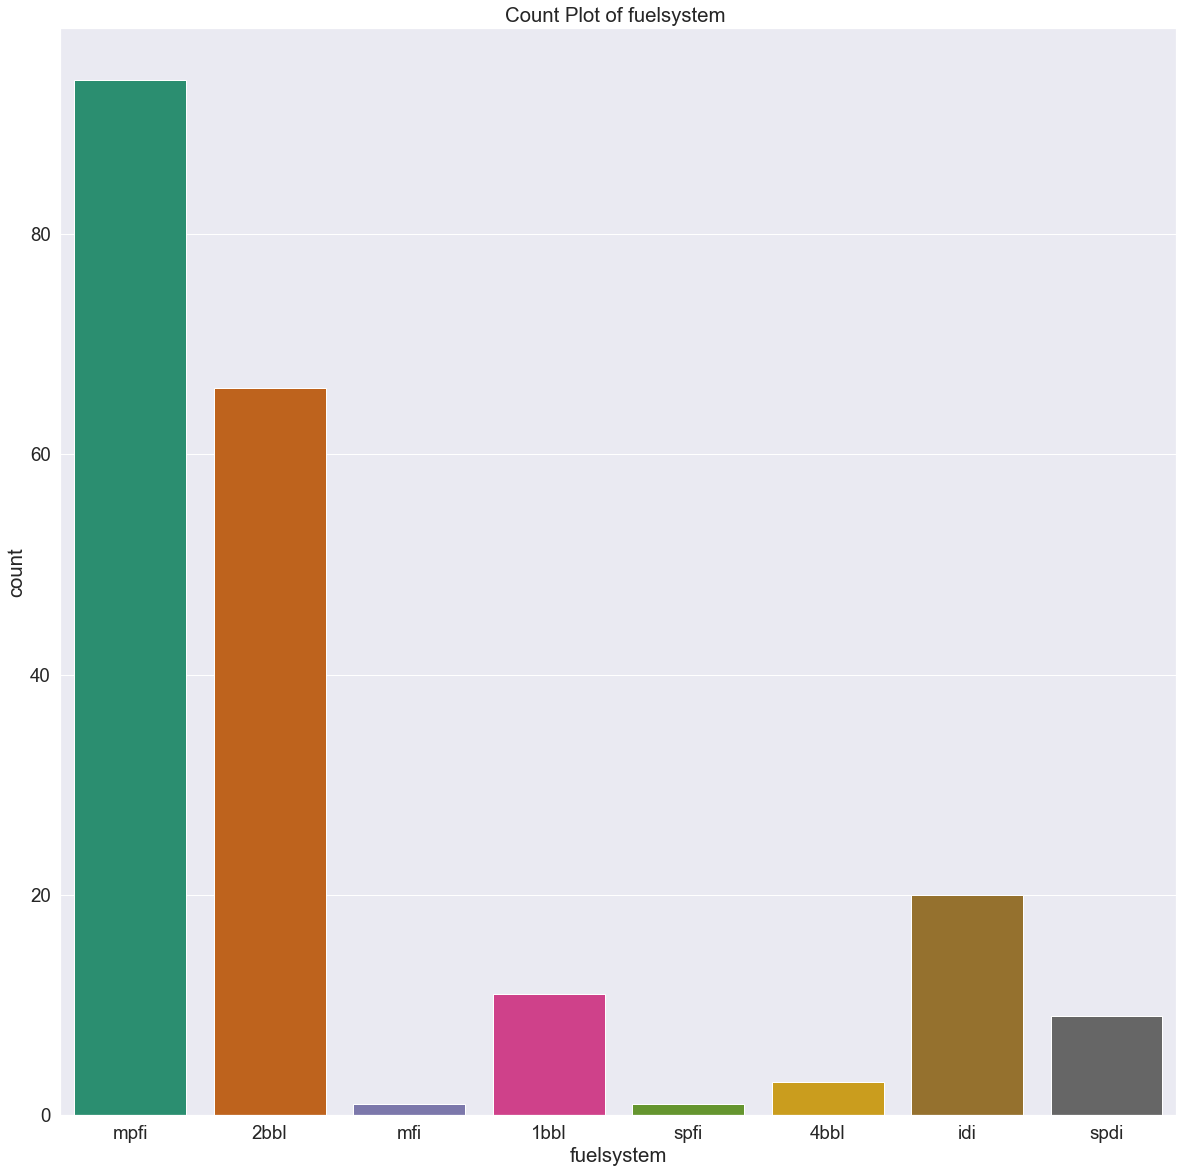

In [131]:
sns.countplot( x = "fuelsystem"  , data = df , palette="Dark2")
plt.title("Count Plot of fuelsystem ")


In [132]:
# get describtion file of data ::

profile = pp.ProfileReport(df , title = "Car_Price_Report" , explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [133]:
# To save report as html file
profile.to_file("Car_Price_Data_Report.html")


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<p id = "ETl">ETL-Process</p>

# 1 - Feature_Engineering Technice ::
*********************************************************************
* Its one of the most important phase in data scientist life cycle which use to generate new usefull features from the old  features which not enough for train model.

In [134]:
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

# 2 - Transform_data ::
*************************************************
* 2 :: *Cleancing data* ::
     * Data in the real state dont comes cleaned is come dirty may include ::
         * non_logic_data_values.
         * Noisy and Errors.
         * Duplicaties data.
         * Missing_data_Values.

# non_logic_Values ::
***********************************
* Its one of the common issuse which consider us on data which data may include errors , noisy data such as :
    * Negaive values and that not logic.
    * Fraction Values and that not logic also.

In [135]:
# Check data include Non_logic data_Values ::

for col in df.columns :
    print(f"The Col ({col})\n")
    print(f"The Unique Values of ({col}) :: {df[col].unique()}\n\n")
    print(f"The Value_Counts of ({col}) :: \n{df[col].value_counts()}")
    print("-" * 80)

The Col (car_ID)

The Unique Values of (car_ID) :: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


The Value_Counts of (car_ID) :: 
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1


* From The result above we can see that data not include non-logic-data-values.

# Dublicates data ::
***************************
* Its also one of the most common issue which may found reapat or redendant data that generate from :
    * Miss understanding from data entry person.
    * There are two cols have diff names but present the same entity.

In [136]:
# detect duplicated data ::

df.duplicated().sum()

0

In [137]:
# To confirm that ::
df.drop_duplicates(inplace=True)

# Missing Dtat Values ::
**********************************
* Its The Most common issue which consider us on data that generate from ::
    * Miss understanding from data entry person.
    * Falier the impute system.
* We must identify that missing data and impute it, we will solve that issue by ::
    * Fill Missing values use :
        * Mean value if data not include outliers.
        * Median value if data include outliers.
        * Mode value if that categorical data.
    * Or Impute data use :;
        * Simpleimputer ML Technice.
        * KNN ML Model.

In [138]:
# detect missing data values ::

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [139]:
Num_Missing     = df.isnull().sum().sort_values(ascending = False)
Precent_Missing = ( df.isnull().sum() / df.isnull().count() ).sort_values(ascending = False)
Missing_Data    = pd.concat( [ Num_Missing , Precent_Missing ] ,axis=1 , keys = ["Num_Missing" , "Prec_Missing"])
Missing_Data

Num_Missing  Prec_Missing
car_ID                      0           0.0
symboling                   0           0.0
highwaympg                  0           0.0
citympg                     0           0.0
peakrpm                     0           0.0
horsepower                  0           0.0
compressionratio            0           0.0
stroke                      0           0.0
boreratio                   0           0.0
fuelsystem                  0           0.0
enginesize                  0           0.0
cylindernumber              0           0.0
enginetype                  0           0.0
curbweight                  0           0.0
carheight                   0           0.0
carwidth                    0           0.0
carlength                   0           0.0
wheelbase                   0           0.0
enginelocation              0           0.0
drivewheel                  0           0.0
carbody                     0           0.0
doornumber                  0           0.0
aspiration                  0           0.0
fueltype                    0           0.0
CarName                     0           0.0
price                       0           0.0

* From The result above we can see that data not include Missing-data-values.

* 3 :: *Data_Preprocessing* ::
    * Data may include ::
        * Outliers values.
        * Impalanced classes.
        * Text data.

# Outliers Values ::
**********************************
* Its one of the most common issuse which conseder us on data But we must investigate that value already outliers or anominal data values Based on ::
    * Understanding the domain of the Business well.
    * If num of ouliers values few that mean may that values outlier.
    * If num of outliers values hue that mean may that values not outliers.
* If that data outlier we will replace it by mean value or drop it.


In [140]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<AxesSubplot:ylabel='symboling'>

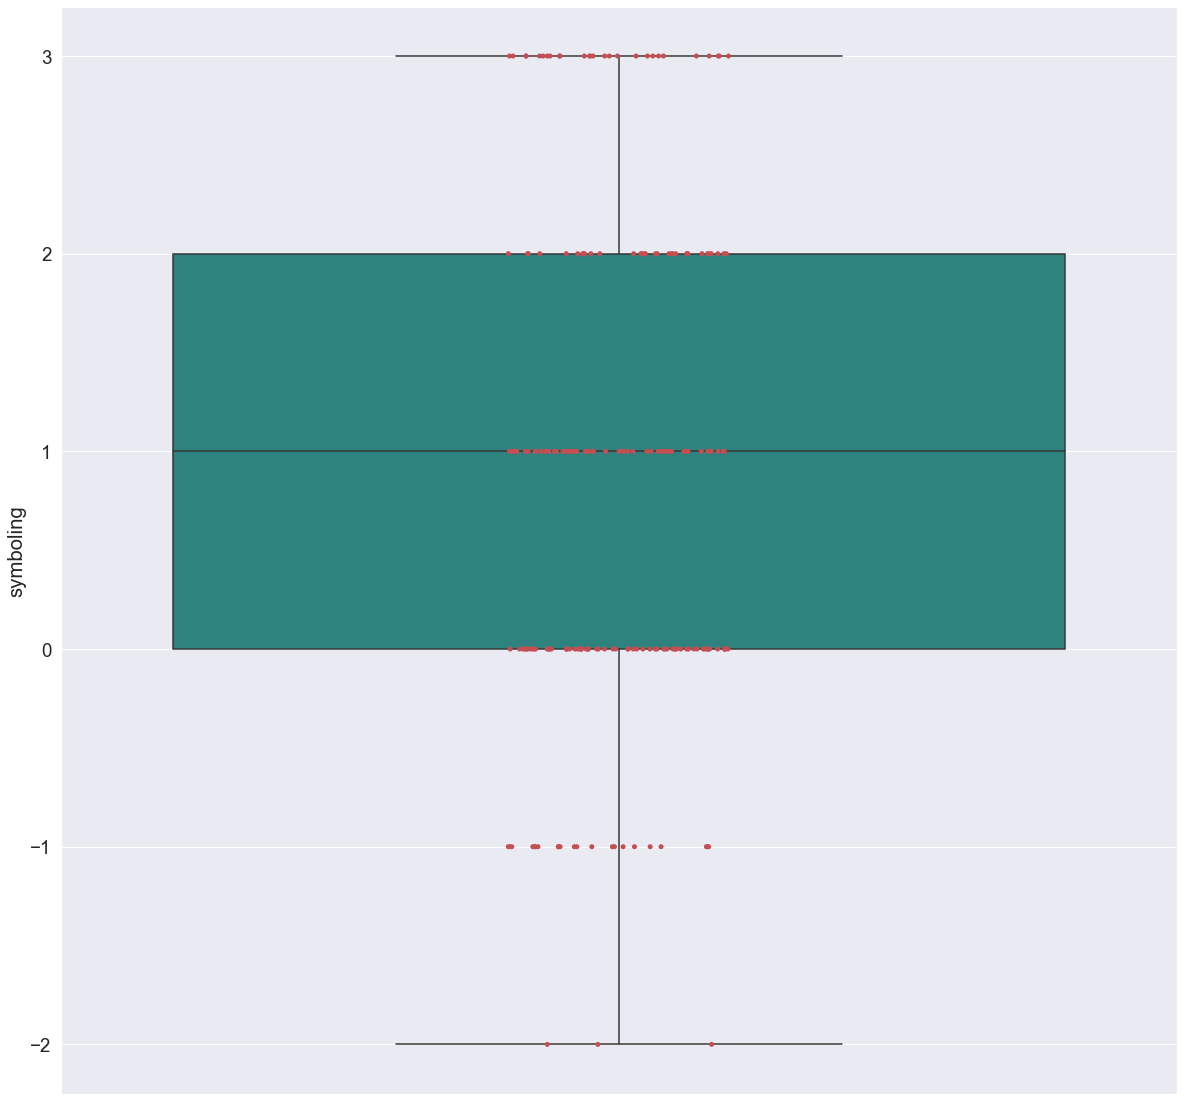

In [141]:
# detect outliers values in symboling feature ::

sns.boxplot  (y = "symboling" , data = df , palette="viridis")
sns.stripplot(y = "symboling" , data = df , color = "r")

<AxesSubplot:ylabel='horsepower'>

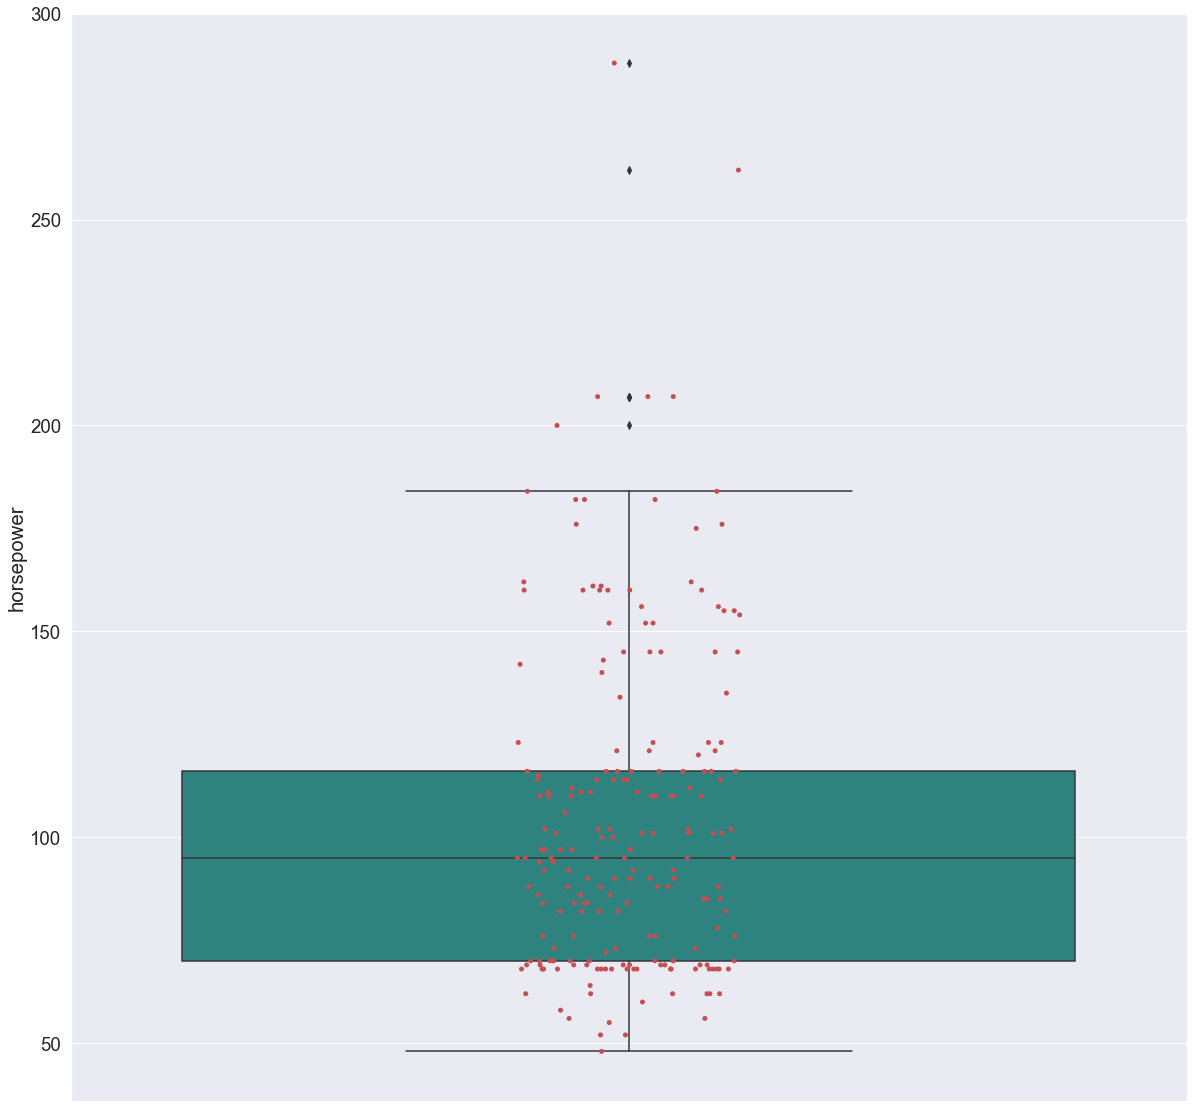

In [142]:
# detect outliers values in horsepower feature ::

sns.boxplot  (y = "horsepower" , data = df , palette="viridis")
sns.stripplot(y = "horsepower" , data = df , color = "r")

<AxesSubplot:ylabel='price'>

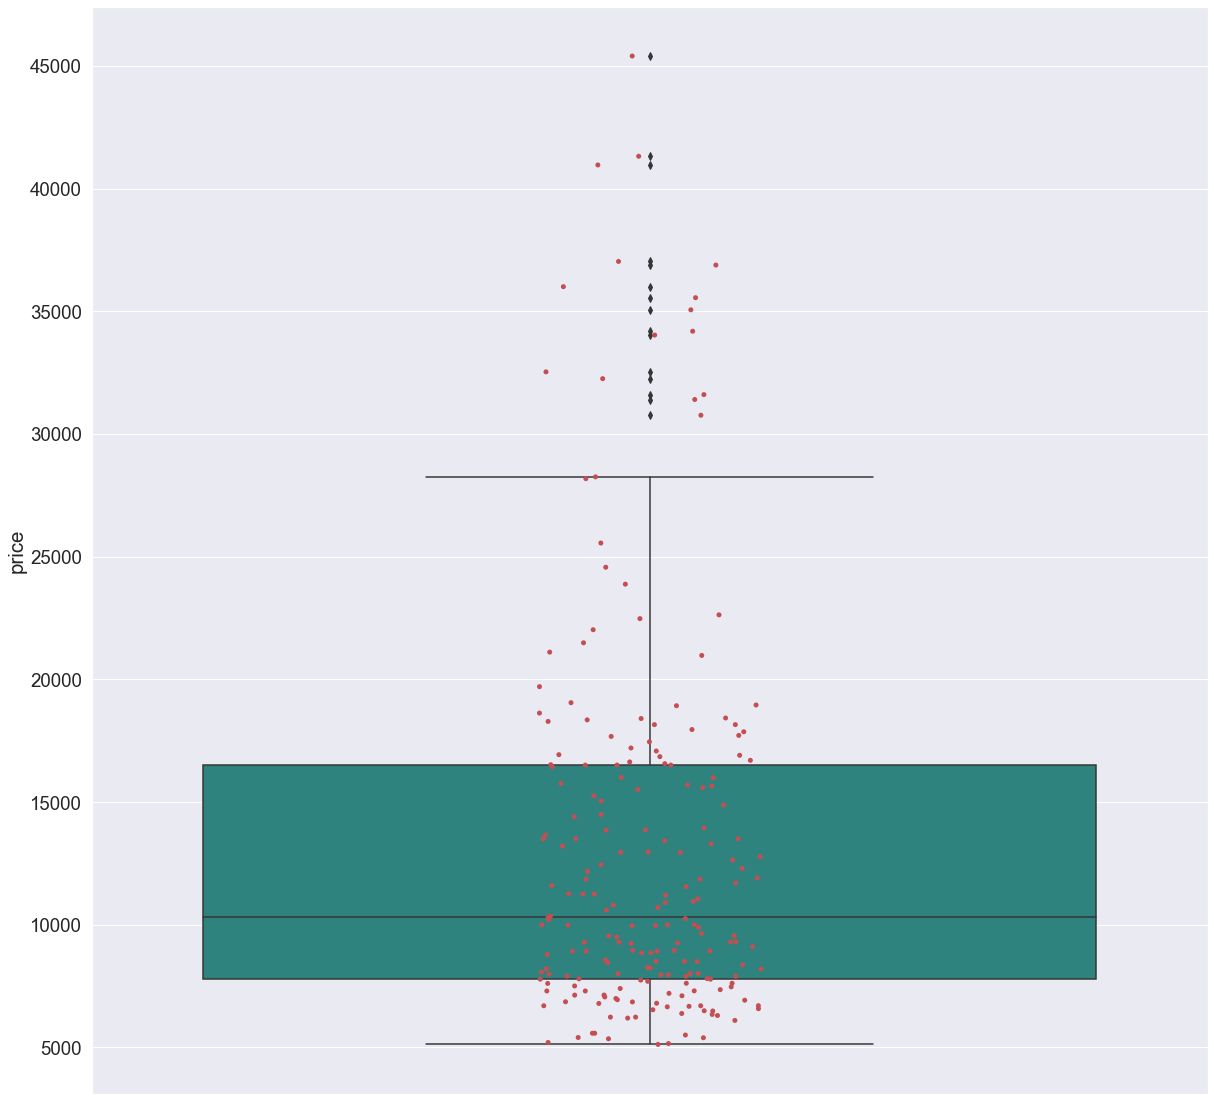

In [143]:
# detect outliers values in price feature ::

sns.boxplot  (y = "price" , data = df , palette="viridis")
sns.stripplot(y = "price" , data = df , color = "r")

* From the result above we can see outliers in Charges Feature So that on that case we will replace that outlier values..

# 3 :: Feture selection ::
***************************************************
* There are multi technices to get the most Correlation Columns with our target.

In [144]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'alfa-romero'),
  Text(1, 0, 'audi'),
  Text(2, 0, 'bmw'),
  Text(3, 0, 'chevrolet'),
  Text(4, 0, 'dodge'),
  Text(5, 0, 'honda'),
  Text(6, 0, 'isuzu'),
  Text(7, 0, 'jaguar'),
  Text(8, 0, 'maxda'),
  Text(9, 0, 'mazda'),
  Text(10, 0, 'buick'),
  Text(11, 0, 'mercury'),
  Text(12, 0, 'mitsubishi'),
  Text(13, 0, 'Nissan'),
  Text(14, 0, 'nissan'),
  Text(15, 0, 'peugeot'),
  Text(16, 0, 'plymouth'),
  Text(17, 0, 'porsche'),
  Text(18, 0, 'porcshce'),
  Text(19, 0, 'renault'),
  Text(20, 0, 'saab'),
  Text(21, 0, 'subaru'),
  Text(22, 0, 'toyota'),
  Text(23, 0, 'toyouta'),
  Text(24, 0, 'vokswagen'),
  Text(25, 0, 'volkswagen'),
  Text(26, 0, 'vw'),
  Text(27, 0, 'volvo')])

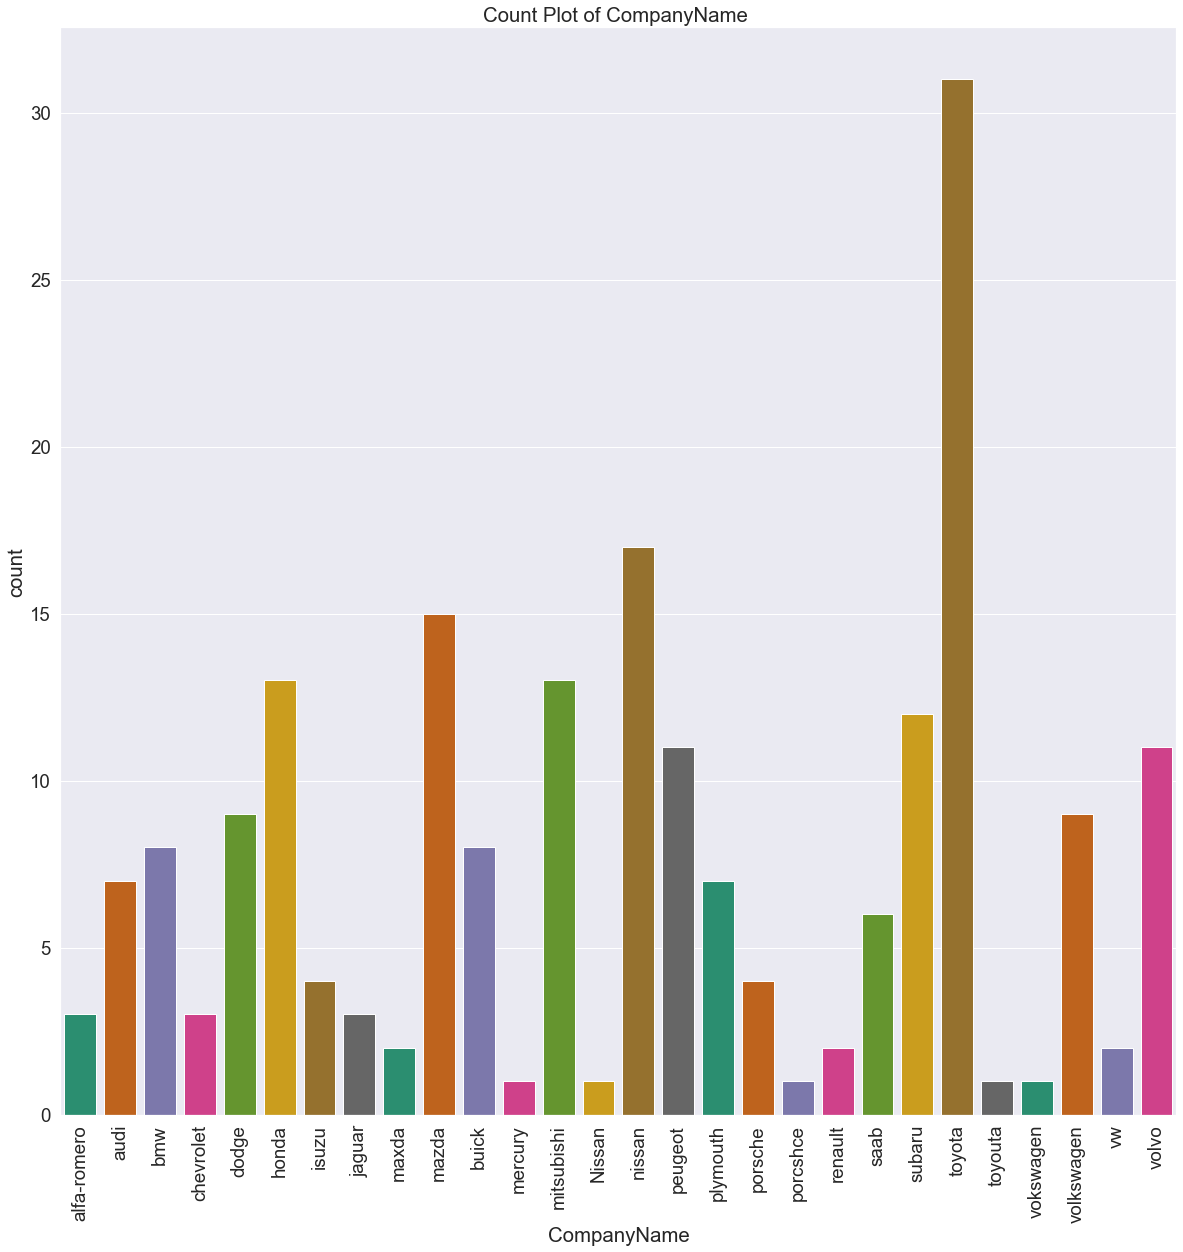

In [145]:
#Splitting company name from CarName column
df["CompanyName"] = df['CarName'].apply(lambda x : x.split(' ')[0])
# visualize Car_companys data
sns.countplot( x = "CompanyName"  , data = df , palette="Dark2")
plt.title("Count Plot of CompanyName ")
plt.xticks(rotation = 90)


In [146]:
#Fuel economy
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])
df.drop(["citympg" , "highwaympg"] , axis= 1 , inplace=True)

In [147]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'CompanyName',
       'fueleconomy'],
      dtype='object')

In [148]:
#Binning the Car Companies based on avg prices of each Company.
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  price  CompanyName  \
0       3.47    2.68               9.0        111    5000  13495  alfa-romero   
1       3.47    2.68               9.0        111    5000  16500  alfa-romero   
2       2.68    3.47               9.0        154    5000  16500  alfa-romero   
3       3.19    3.40              10.0        102    5500  13950         audi   
4       3.19    3.40               8.0        115    5500  17450         audi   

   fueleconomy  carsrange  
0        23.70     Medium  
1        23.70     Medium  
2        22.15     Medium  
3        26.70     Medium  
4        19.80     Medium  

[5 rows x 27 columns]

# Processing Text data ::
**********************************************
* We must handling test data into numerical numbers becouse ML Models not understanding that text data so that we use one_hot_encoding or one_variable_encoding technices.


In [149]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'price', 'CompanyName',
       'fueleconomy', 'carsrange'],
      dtype='object')

In [150]:
# Drop useless features which not correlated with our target
df.drop(["car_ID" , "CarName"] , axis=1 , inplace = True)

In [151]:
df = pd.get_dummies(df , drop_first=True)


In [152]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'fueleconomy', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_alfa-romero',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_hon

In [153]:
df.head(2)

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   

   enginesize  boreratio  stroke  compressionratio  ...  CompanyName_saab  \
0         130       3.47    2.68               9.0  ...                 0   
1         130       3.47    2.68               9.0  ...                 0   

   CompanyName_subaru  CompanyName_toyota  CompanyName_toyouta  \
0                   0                   0                    0   
1                   0                   0                    0   

   CompanyName_vokswagen  CompanyName_volkswagen  CompanyName_volvo  \
0                      0                       0                  0   
1                      0                       0                  0   

   CompanyName_vw  carsrange_Medium  carsrange_Highend  
0               0                 1                  0  
1               0                 1                  0  

[2 rows x 72 columns]

In [154]:
# get correlation between al


<AxesSubplot:>

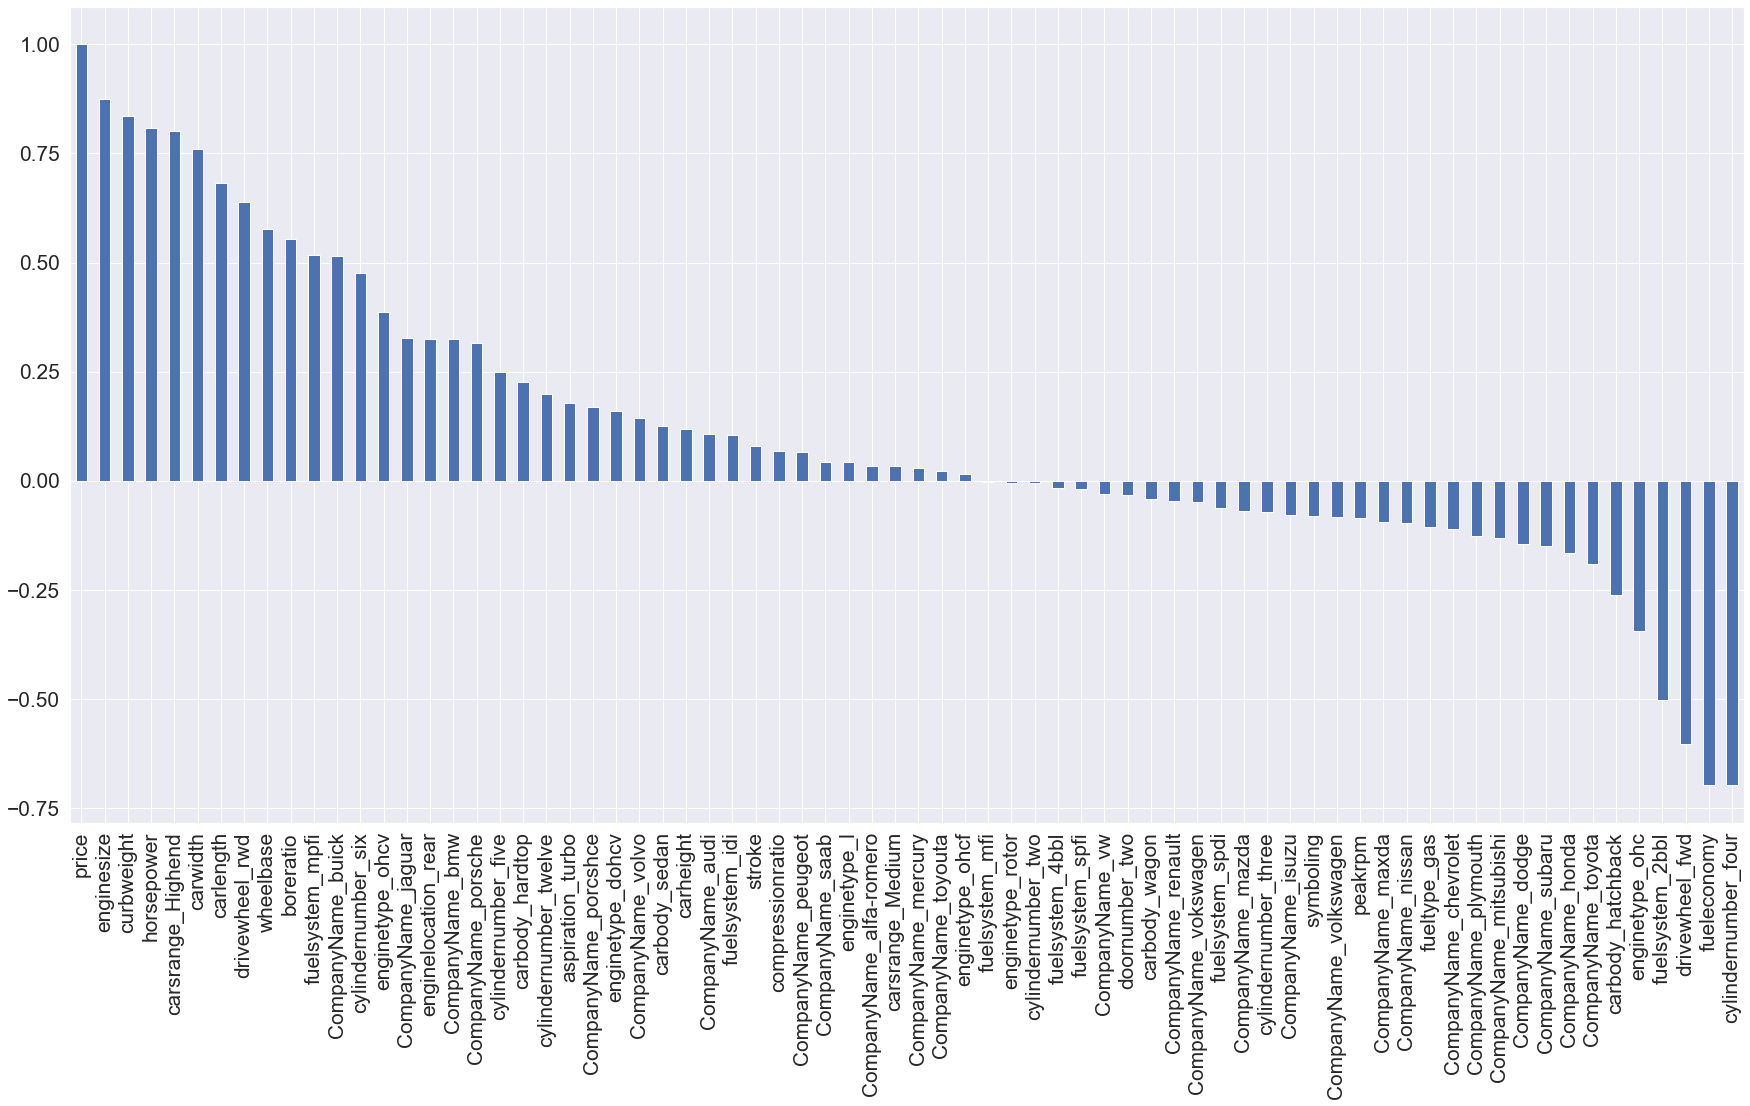

In [155]:
# Get Correlation of "Churn" with other features ::
sns.set( rc = {"figure.figsize" : [30 , 15]} , font_scale=1.9)


df.corr()['price'].sort_values(ascending = False).plot(kind='bar'  )

<p id = "Prepration">Data-Prepration</p>

In [156]:
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'fueleconomy', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_alfa-romero',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_hon

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [157]:
# Split data into input and output data
x = df.drop("price", axis=1 )
y = df["price"]

In [158]:
x

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  ...  CompanyName_saab  \
0           130       3.47    2.68               9.0  ...                 0   
1           130       3.47    2.68               9.0  ...                 0   
2           152       2.68    3.47               9.0  ...                 0   
3           109       3.19    3.40              10.0  ...                 0   
4           136       3.19    3.40               8.0  ...                 0   
..          ...        ...     ...               ...  ...               ...   
200         141       3.78    3.15               9.5  ...                 0   
201         141       3.78    3.15               8.7  ...                 0   
202         173       3.58    2.87               8.8  ...                 0   
203         145       3.01    3.40              23.0  ...                 0   
204         141       3.78    3.15               9.5  ...                 0   

     CompanyName_subaru  CompanyName_toyota  CompanyName_toyouta  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   
3                     0                   0                    0   
4                     0                   0                    0   
..                  ...                 ...                  ...   
200                   0                   0                    0   
201                   0                   0                    0   
202                   0                   0                    0   
203                   0                   0                    0   
204                   0                   0                    0   

     CompanyName_vokswagen  CompanyName_volkswagen  CompanyName_volvo  \
0                        0                       0                  0   
1                        0                       0                  0   
2                        0                       0                  0   
3                        0                       0                  0   
4                        0                       0                  0   
..                     ...                     ...                ...   
200                      0                       0                  1   
201                      0                       0                  1   
202                      0                       0                  1   
203                      0                       0                  1   
204                      0                       0                  1   

     CompanyName_vw  carsrange_Medium  carsrange_Highend  
0                 0                 1                  0  
1                 0                 1                  0  
2                 0                 1                  0  
3                 0                 1                  0  
4                 0                 1                  0  
..              ...               ...                ...  
200               0                 1                  0  
201          

In [159]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int32

In [160]:
# Spliting data into Training and Testing data ::
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x , y , random_state = 20 , test_size=0.2)

In [161]:
#Scalling data ::
from sklearn.preprocessing import StandardScaler
scaller = StandardScaler()
x_train = scaller.fit_transform(x_train)
x_test  = scaller.transform(x_test)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   symboling                205 non-null    int64  
 1   wheelbase                205 non-null    float64
 2   carlength                205 non-null    float64
 3   carwidth                 205 non-null    float64
 4   carheight                205 non-null    float64
 5   curbweight               205 non-null    int64  
 6   enginesize               205 non-null    int64  
 7   boreratio                205 non-null    float64
 8   stroke                   205 non-null    float64
 9   compressionratio         205 non-null    float64
 10  horsepower               205 non-null    int64  
 11  peakrpm                  205 non-null    int64  
 12  price                    205 non-null    int32  
 13  fueleconomy              205 non-null    float64
 14  fueltype_gas             2

<p id = "Model">Bulid_ML_Model</p>

# Build Models ::
*************************************
* On that Process we will ::
    * Bulid multi models fror classification problem.
    * Evaluate all models.
    * Select the most efficient model for churn problem.

In [163]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm          import SVR
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
from sklearn.neighbors    import KNeighborsRegressor
from xgboost              import XGBRegressor
from sklearn.metrics      import  mean_absolute_error , mean_squared_error , r2_score 


In [164]:
Models = { "Linear_Regressor" : LinearRegression(),
           "Ridge_Regressor"  : Ridge(),
           "Lasso_Regressor"  : Lasso(),
           "SVRegressor"      : SVR(),
           "DTRegressor"      : DecisionTreeRegressor(),
           "RFRegressor"      : RandomForestRegressor(),
           "KNNRegressor"     : KNeighborsRegressor(),
           "XGBRegressor"     : XGBRegressor()
         }

In [165]:
for name , model in Models.items() :
    print(f"The Model :: {name}")
    model.fit(x_train , y_train)
    Train_Score = model.score(x_train , y_train)
    Test_Score  = model.score(x_test , y_test)
    print(f"The Training_Score :: {Train_Score}\nThe Test_Score :: {Test_Score}")
    print("*" *80)

The Model :: Linear_Regressor
The Training_Score :: 0.9682521844261925
The Test_Score :: -4.8514700496103184e+23
********************************************************************************
The Model :: Ridge_Regressor
The Training_Score :: 0.9683345483311079
The Test_Score :: 0.8827822968512515
********************************************************************************
The Model :: Lasso_Regressor
The Training_Score :: 0.9697349756089116
The Test_Score :: 0.8888071197150524
********************************************************************************
The Model :: SVRegressor
The Training_Score :: -0.11112742259936303
The Test_Score :: -0.005455490593487156
********************************************************************************
The Model :: DTRegressor
The Training_Score :: 0.9994116202668238
The Test_Score :: 0.6779501285176956
********************************************************************************
The Model :: RFRegressor
The Training_Score :: 0.99057571

* Select the Most Efficient Model which have high Performance and Accuracy

SyntaxError: invalid syntax (<ipython-input-166-99913bee571f>, line 1)

In [168]:
XGB_Model = XGBRegressor()
XGB_Model.fit(x_train , y_train)
print(XGB_Model.score(x_train , y_train))
print(XGB_Model.score(x_test , y_test))
print("-" * 80)

0.9994102149168307
0.8769693387100009
--------------------------------------------------------------------------------


<p id = "Evaluation">Evaluate_Model</p>

# Evaluate Model ::
*********************************
* Its one off the most important phase in data scientist life cycle which estimate the performance and accuracy of the model in that problem.

In [169]:
XGB_Model.score(x_train , y_train)

0.9994102149168307

In [170]:
XGB_Model.score(x_test , y_test)

0.8769693387100009

In [171]:
y_pred = XGB_Model.predict(x_test)

In [172]:
MAE = mean_absolute_error(y_test , y_pred  , multioutput="uniform_average")
MSE = mean_squared_error(y_test , y_pred , multioutput="uniform_average")
r2_square = r2_score(y_test , y_pred , multioutput="uniform_average")
print(f"The MAE :: {MAE}\n*************\nThe MSE :: {MSE}\n************\nThe r2_Score :: {r2_square}")

The MAE :: 1329.3569693216464
*************
The MSE :: 3742256.6874294514
************
The r2_Score :: 0.8769693387100009


<p id = "Save">Save_Model</p>

In [174]:
import joblib

In [175]:
scaler = joblib.dump(scaller , "scaler.h5")

In [176]:
Model = joblib.dump(XGB_Model , "Model.h5")

<p id = "conclusions">conclusions</p>

# Conclusion ::
*****************************
* On that Step We will ::
  * Input data features.
  * Scaling input data.
  * Mobile Price .

In [177]:
df.head(2)

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3       88.6      168.8      64.1       48.8        2548   
1          3       88.6      168.8      64.1       48.8        2548   

   enginesize  boreratio  stroke  compressionratio  ...  CompanyName_saab  \
0         130       3.47    2.68               9.0  ...                 0   
1         130       3.47    2.68               9.0  ...                 0   

   CompanyName_subaru  CompanyName_toyota  CompanyName_toyouta  \
0                   0                   0                    0   
1                   0                   0                    0   

   CompanyName_vokswagen  CompanyName_volkswagen  CompanyName_volvo  \
0                      0                       0                  0   
1                      0                       0                  0   

   CompanyName_vw  carsrange_Medium  carsrange_Highend  
0               0                 1                  0  
1               0                 1                  0  

[2 rows x 72 columns]

In [178]:
x.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'fueleconomy', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'CompanyName_alfa-romero',
       'CompanyName_audi', 'CompanyName_bmw', 'CompanyName_buick',
       'CompanyName_chevrolet', 'CompanyName_dodge', 'CompanyName_honda',
    

In [179]:
len(x.columns)

71

In [181]:
custom_data = np.array([3 , 88.6 , 168.8 , 64.1 , 48.2 , 2548 ,130 , 3.47 ,2.68 , 9.0 , 82 , 5500 ,23.0,
                        1 , 1 , 1 , 0 , 1 , 0 , 0 , 1 , 0 , 1 , 0,0,0,0,0,1, 1 ,0,0,0,0,0 ,
                       0,0,1,0,0,0,0 , 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 , 0,1])

In [182]:
custom_data.shape

(71,)

In [183]:
len(custom_data)

71

In [184]:
custom_data = scaller.transform([custom_data])
custom_data

array([[ 1.659049  , -1.66766409, -0.45188805, -0.88305429, -2.25464658,
        -0.04897934,  0.02077081,  0.47801779, -1.90356787, -0.26927123,
        -0.62191216,  0.76855776, -0.64556608,  0.31728716,  2.07130939,
         1.07605517, -0.22645541,  1.33403936, -0.88465174, -0.372678  ,
         0.86294893, -0.81028739,  7.32575366,  0.        , -0.2548236 ,
        -1.62617479, -0.26813322, -0.26813322,  6.32455532,  4.14996653,
        -1.79028719, -0.372678  , -0.07832604, -0.07832604, -0.15811388,
        -0.65275337, -0.13650473,  3.15171911, -0.07832604, -0.95235327,
        -0.22645541,  0.        , -0.11111111, -0.19487094, -0.21115394,
        -0.21115394, -0.11111111, -0.22645541, -0.28097574, -0.11111111,
        -0.13650473, -0.11111111, -0.28097574, -0.07832604, -0.26813322,
        -0.30550505, -0.2409658 , -0.15811388, -0.07832604, -0.13650473,
        -0.11111111, -0.17733173, -0.22645541, -0.41403934, -0.07832604,
         0.        , -0.19487094, -0.2548236 , -0.1

In [185]:
prediction = XGB_Model.predict(custom_data)
prediction

array([16381.661], dtype=float32)